In [25]:
import numpy as np
import scipy as sci
from scipy.fftpack import fft
from matplotlib.axis import Axis
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
import sys
np.set_printoptions(threshold=sys.maxsize) #Shows all values in array.
import operator
from operator import add
import functools
import math

DataSet_1_FULL_RIDGE_ZX = [] #Lists for Z-data (X-axis)
DataSet_1_ATM_RIDGE_ZX = []
DataSet_1_H2_RIDGE_ZX = []
DataSet_1_FULL_MID_ZX = []
DataSet_1_ATM_MID_ZX = []
DataSet_1_H2_MID_ZX = []
DataSet_1_FULL_RIDGE_ZY = [] #Lists for Z-data (Y-axis)
DataSet_1_ATM_RIDGE_ZY = []
DataSet_1_H2_RIDGE_ZY = []
DataSet_1_FULL_MID_ZY = []
DataSet_1_ATM_MID_ZY = []
DataSet_1_H2_MID_ZY = []
DataSet_1_FULL_BASE = [] #Lists for Base Area (X*Y)
DataSet_1_ATM_BASE = [] 
DataSet_1_H2_BASE = [] 
DataSet_1_FULL_VOL_RIDGE_X = [] #Lists for Volume using X-axis Ridge
DataSet_1_ATM_VOL_RIDGE_X = []
DataSet_1_H2_VOL_RIDGE_X = []
DataSet_1_FULL_VOL_RIDGE_Y = [] #Lists for Volume using Y-axis Ridge
DataSet_1_ATM_VOL_RIDGE_Y = []
DataSet_1_H2_VOL_RIDGE_Y = []
DataSet_1_FULL_VOL_MID_X = [] #Lists for Volume using X-axis Mid
DataSet_1_ATM_VOL_MID_X = []
DataSet_1_H2_VOL_MID_X = []
DataSet_1_FULL_VOL_MID_Y = [] #Lists for Volume using Y-axis Mid
DataSet_1_ATM_VOL_MID_Y = []
DataSet_1_H2_VOL_MID_Y = []


#Copy file directory into pandas reader to remote access. ALSO replace "\" with "/". KEEP ENCODING.

def DataSet_1():
#====================================================DATA IMPORT====================================================
    Data_1P_1 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_5MIN.csv",encoding = 'ISO-8859-1') #FULL growth
    Data_1P_2 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_10MIN.csv",encoding = 'ISO-8859-1')
    Data_1P_3 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_15MIN.csv",encoding = 'ISO-8859-1')
    Data_1P_4 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_20MIN.csv",encoding = 'ISO-8859-1')
    Data_1P_5 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_25MIN.csv",encoding = 'ISO-8859-1')
    Data_1P_6 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_30MIN.csv",encoding = 'ISO-8859-1')

    Data_5P_1 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_35MIN.csv",encoding = 'ISO-8859-1') #ATM growth
    Data_5P_2 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_40MIN.csv",encoding = 'ISO-8859-1')
    Data_5P_3 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_45MIN.csv",encoding = 'ISO-8859-1')
    Data_5P_4 = pd.read_csv("C:/Users/Harry/OneDrive/Documents/University of bristol/Final Sample AFM/Data/General Height/OA_3/OA_3_50MIN.csv",encoding = 'ISO-8859-1')
   
    Data_5P_5 = pd.read_csv("C:/Users/harry/OneDrive/Documents/University of bristol/AFM Images/Python - Micelle topography data/Growths/50minATM_5.csv",encoding = 'ISO-8859-1')
    Data_5P_6 = pd.read_csv("C:/Users/harry/OneDrive/Documents/University of bristol/AFM Images/Python - Micelle topography data/Growths/50minATM_6.csv",encoding = 'ISO-8859-1')

    Data_15P_1 = pd.read_csv("C:/Users/harry/OneDrive/Documents/University of bristol/AFM Images/Python - Micelle topography data/Growths/120minATM_1.csv",encoding = 'ISO-8859-1') #H2 growth
    Data_15P_2 = pd.read_csv("C:/Users/harry/OneDrive/Documents/University of bristol/AFM Images/Python - Micelle topography data/Growths/120minATM_2.csv",encoding = 'ISO-8859-1')
    Data_15P_3 = pd.read_csv("C:/Users/harry/OneDrive/Documents/University of bristol/AFM Images/Python - Micelle topography data/Growths/120minATM_3.csv",encoding = 'ISO-8859-1')
    Data_15P_4 = pd.read_csv("C:/Users/harry/OneDrive/Documents/University of bristol/AFM Images/Python - Micelle topography data/Growths/120minATM_4.csv",encoding = 'ISO-8859-1')
    Data_15P_5 = pd.read_csv("C:/Users/harry/OneDrive/Documents/University of bristol/AFM Images/Python - Micelle topography data/Growths/120minATM_5.csv",encoding = 'ISO-8859-1')
    Data_15P_6 = pd.read_csv("C:/Users/harry/OneDrive/Documents/University of bristol/AFM Images/Python - Micelle topography data/Growths/120minATM_6.csv",encoding = 'ISO-8859-1')

#---------------------------------------------------X-Axis------------------------------------------------------
    Data_X1P_1 = (Data_1P_1['X-axis']*(10**3)) #FULL growth
    Data_X1P_2 = (Data_1P_2['X-axis']*(10**3))
    Data_X1P_3 = (Data_1P_3['X-axis']*(10**3))
    Data_X1P_4 = (Data_1P_4['X-axis']*(10**3))
    Data_X1P_5 = (Data_1P_5['X-axis']*(10**3))
    Data_X1P_6 = (Data_1P_6['X-axis']*(10**3))

    Data_X5P_1 = (Data_5P_1['X-axis']*(10**3)) #ATM growth
    Data_X5P_2 = (Data_5P_2['X-axis']*(10**3))
    Data_X5P_3 = (Data_5P_3['X-axis']*(10**3))
    Data_X5P_4 = (Data_5P_4['X-axis']*(10**3))
    Data_X5P_5 = (Data_5P_5['X-axis']*(10**3))
    Data_X5P_6 = (Data_5P_6['X-axis']*(10**3))

    Data_X15P_1 = (Data_15P_1['X-axis']*(10**3)) #H2 growth
    Data_X15P_2 = (Data_15P_2['X-axis']*(10**3))
    Data_X15P_3 = (Data_15P_3['X-axis']*(10**3))
    Data_X15P_4 = (Data_15P_4['X-axis']*(10**3))
    Data_X15P_5 = (Data_15P_5['X-axis']*(10**3))
    Data_X15P_6 = (Data_15P_6['X-axis']*(10**3))

#---------------------------------------------------Y-Axis------------------------------------------------------
    Data_Y1P_1 = (Data_1P_1['Y-axis']*(10**3)) #FULL growth
    Data_Y1P_2 = (Data_1P_2['Y-axis']*(10**3))
    Data_Y1P_3 = (Data_1P_3['Y-axis']*(10**3))
    Data_Y1P_4 = (Data_1P_4['Y-axis']*(10**3))
    Data_Y1P_5 = (Data_1P_5['Y-axis']*(10**3))
    Data_Y1P_6 = (Data_1P_6['Y-axis']*(10**3))

    Data_Y5P_1 = (Data_5P_1['Y-axis']*(10**3)) #ATM growth
    Data_Y5P_2 = (Data_5P_2['Y-axis']*(10**3))
    Data_Y5P_3 = (Data_5P_3['Y-axis']*(10**3))
    Data_Y5P_4 = (Data_5P_4['Y-axis']*(10**3))
    Data_Y5P_5 = (Data_5P_5['Y-axis']*(10**3))
    Data_Y5P_6 = (Data_5P_6['Y-axis']*(10**3))

    Data_Y15P_1 = (Data_15P_1['Y-axis']*(10**3)) #H2 growth
    Data_Y15P_2 = (Data_15P_2['Y-axis']*(10**3))
    Data_Y15P_3 = (Data_15P_3['Y-axis']*(10**3))
    Data_Y15P_4 = (Data_15P_4['Y-axis']*(10**3))
    Data_Y15P_5 = (Data_15P_5['Y-axis']*(10**3))
    Data_Y15P_6 = (Data_15P_6['Y-axis']*(10**3))

#---------------------------------------------------Ridge X------------------------------------------------------
    Data_L_RidgeX1P_1 = list(map (add,Data_1P_1['L-Ridge1'], Data_1P_1['L-Ridge2'] )) #Averaging Ridges' across individual micelles
    Data_L_RidgeX1P_2 = list(map (add,Data_1P_2['L-Ridge1'], Data_1P_2['L-Ridge2'] )) #FULL growth
    Data_L_RidgeX1P_3 = list(map (add,Data_1P_3['L-Ridge1'], Data_1P_3['L-Ridge2'] ))
    Data_L_RidgeX1P_4 = list(map (add,Data_1P_4['L-Ridge1'], Data_1P_4['L-Ridge2'] ))
    Data_L_RidgeX1P_5 = list(map (add,Data_1P_5['L-Ridge1'], Data_1P_5['L-Ridge2'] ))
    Data_L_RidgeX1P_6 = list(map (add,Data_1P_6['L-Ridge1'], Data_1P_6['L-Ridge2'] ))

    Data_L_RidgeX5P_1 = list(map (add,Data_5P_1['L-Ridge1'], Data_5P_1['L-Ridge2'] )) #ATM growth
    Data_L_RidgeX5P_2 = list(map (add,Data_5P_2['L-Ridge1'], Data_5P_2['L-Ridge2'] )) 
    Data_L_RidgeX5P_3 = list(map (add,Data_5P_3['L-Ridge1'], Data_5P_3['L-Ridge2'] ))
    Data_L_RidgeX5P_4 = list(map (add,Data_5P_4['L-Ridge1'], Data_5P_4['L-Ridge2'] ))
    Data_L_RidgeX5P_5 = list(map (add,Data_5P_5['L-Ridge1'], Data_5P_5['L-Ridge2'] ))
    Data_L_RidgeX5P_6 = list(map (add,Data_5P_6['L-Ridge1'], Data_5P_6['L-Ridge2'] ))

    Data_L_RidgeX15P_1 = list(map (add,Data_15P_1['L-Ridge1'], Data_15P_1['L-Ridge2'] )) #H2 growth
    Data_L_RidgeX15P_2 = list(map (add,Data_15P_2['L-Ridge1'], Data_15P_2['L-Ridge2'] )) 
    Data_L_RidgeX15P_3 = list(map (add,Data_15P_3['L-Ridge1'], Data_15P_3['L-Ridge2'] ))
    Data_L_RidgeX15P_4 = list(map (add,Data_15P_4['L-Ridge1'], Data_15P_4['L-Ridge2'] ))
    Data_L_RidgeX15P_5 = list(map (add,Data_15P_5['L-Ridge1'], Data_15P_5['L-Ridge2'] ))
    Data_L_RidgeX15P_6 = list(map (add,Data_15P_6['L-Ridge1'], Data_15P_6['L-Ridge2'] ))


#---------------------------------------------------Ridge Y------------------------------------------------------
    Data_L_RidgeY1P_1 = list(map (add,Data_1P_1['W-Ridge1'], Data_1P_1['W-Ridge2'] )) #Averaging Ridges' across individual micelles
    Data_L_RidgeY1P_2 = list(map (add,Data_1P_2['W-Ridge1'], Data_1P_2['W-Ridge2'] )) #FULL growth
    Data_L_RidgeY1P_3 = list(map (add,Data_1P_3['W-Ridge1'], Data_1P_3['W-Ridge2'] ))
    Data_L_RidgeY1P_4 = list(map (add,Data_1P_4['W-Ridge1'], Data_1P_4['W-Ridge2'] ))
    Data_L_RidgeY1P_5 = list(map (add,Data_1P_5['W-Ridge1'], Data_1P_5['W-Ridge2'] ))
    Data_L_RidgeY1P_6 = list(map (add,Data_1P_6['W-Ridge1'], Data_1P_6['W-Ridge2'] ))

    Data_L_RidgeY5P_1 = list(map (add,Data_5P_1['W-Ridge1'], Data_5P_1['W-Ridge2'] )) #ATM growth
    Data_L_RidgeY5P_2 = list(map (add,Data_5P_2['W-Ridge1'], Data_5P_2['W-Ridge2'] )) 
    Data_L_RidgeY5P_3 = list(map (add,Data_5P_3['W-Ridge1'], Data_5P_3['W-Ridge2'] ))
    Data_L_RidgeY5P_4 = list(map (add,Data_5P_4['W-Ridge1'], Data_5P_4['W-Ridge2'] ))
    Data_L_RidgeY5P_5 = list(map (add,Data_5P_5['W-Ridge1'], Data_5P_5['W-Ridge2'] ))
    Data_L_RidgeY5P_6 = list(map (add,Data_5P_6['W-Ridge1'], Data_5P_6['W-Ridge2'] ))

    Data_L_RidgeY15P_1 = list(map (add,Data_15P_1['W-Ridge1'], Data_15P_1['W-Ridge2'] )) #H2 growth
    Data_L_RidgeY15P_2 = list(map (add,Data_15P_2['W-Ridge1'], Data_15P_2['W-Ridge2'] )) 
    Data_L_RidgeY15P_3 = list(map (add,Data_15P_3['W-Ridge1'], Data_15P_3['W-Ridge2'] ))
    Data_L_RidgeY15P_4 = list(map (add,Data_15P_4['W-Ridge1'], Data_15P_4['W-Ridge2'] ))
    Data_L_RidgeY15P_5 = list(map (add,Data_15P_5['W-Ridge1'], Data_15P_5['W-Ridge2'] ))
    Data_L_RidgeY15P_6 = list(map (add,Data_15P_6['W-Ridge1'], Data_15P_6['W-Ridge2'] ))

#---------------------------------------------------MIDDLE X------------------------------------------------------

    Data_L_MidX1P_1 = Data_1P_1['L-Middle'] #FULL growth
    Data_L_MidX1P_2 = Data_1P_2['L-Middle']
    Data_L_MidX1P_3 = Data_1P_3['L-Middle']
    Data_L_MidX1P_4 = Data_1P_4['L-Middle']
    Data_L_MidX1P_5 = Data_1P_5['L-Middle']
    Data_L_MidX1P_6 = Data_1P_6['L-Middle']

    Data_L_MidX5P_1 = Data_5P_1['L-Middle'] #ATM growth
    Data_L_MidX5P_2 = Data_5P_2['L-Middle']
    Data_L_MidX5P_3 = Data_5P_3['L-Middle']
    Data_L_MidX5P_4 = Data_5P_4['L-Middle']
    Data_L_MidX5P_5 = Data_5P_5['L-Middle']
    Data_L_MidX5P_6 = Data_5P_6['L-Middle']

    Data_L_MidX15P_1 = Data_15P_1['L-Middle'] #H2 growth
    Data_L_MidX15P_2 = Data_15P_2['L-Middle']
    Data_L_MidX15P_3 = Data_15P_3['L-Middle']
    Data_L_MidX15P_4 = Data_15P_4['L-Middle']
    Data_L_MidX15P_5 = Data_15P_5['L-Middle']
    Data_L_MidX15P_6 = Data_15P_6['L-Middle']

#---------------------------------------------------MIDDLE Y------------------------------------------------------
    Data_L_MidY1P_1 = Data_1P_1['W-Middle'] #FULL growth
    Data_L_MidY1P_2 = Data_1P_2['W-Middle']
    Data_L_MidY1P_3 = Data_1P_3['W-Middle']
    Data_L_MidY1P_4 = Data_1P_4['W-Middle']
    Data_L_MidY1P_5 = Data_1P_5['W-Middle']
    Data_L_MidY1P_6 = Data_1P_6['W-Middle']

    Data_L_MidY5P_1 = Data_5P_1['W-Middle'] #ATM growth
    Data_L_MidY5P_2 = Data_5P_2['W-Middle']
    Data_L_MidY5P_3 = Data_5P_3['W-Middle']
    Data_L_MidY5P_4 = Data_5P_4['W-Middle']
    Data_L_MidY5P_5 = Data_5P_5['W-Middle']
    Data_L_MidY5P_6 = Data_5P_6['W-Middle']

    Data_L_MidY15P_1 = Data_15P_1['W-Middle'] #H2 growth
    Data_L_MidY15P_2 = Data_15P_2['W-Middle']
    Data_L_MidY15P_3 = Data_15P_3['W-Middle']
    Data_L_MidY15P_4 = Data_15P_4['W-Middle']
    Data_L_MidY15P_5 = Data_15P_5['W-Middle']
    Data_L_MidY15P_6 = Data_15P_6['W-Middle']

#------------------------------------------------------ZERO DATA X------------------------------------------------------
#------------------------------------------------------Full Growth------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeX1P_1 = [] 
    Zero_Data_L_RidgeX1P_1 = [] 
    Av_Data_L_RidgeX1P_2 = []
    Zero_Data_L_RidgeX1P_2 = []
    Av_Data_L_RidgeX1P_3 = []
    Zero_Data_L_RidgeX1P_3 = []
    Av_Data_L_RidgeX1P_4 = []
    Zero_Data_L_RidgeX1P_4 = []
    Av_Data_L_RidgeX1P_5 = []
    Zero_Data_L_RidgeX1P_5 = []
    Av_Data_L_RidgeX1P_6 = []
    Zero_Data_L_RidgeX1P_6 = []

    for x in Data_L_RidgeX1P_1: #~
        a = x/2
        Av_Data_L_RidgeX1P_1.append(float(a))
    for x in Av_Data_L_RidgeX1P_1:
        a = x - ((abs(Av_Data_L_RidgeX1P_1[-1])-abs(Av_Data_L_RidgeX1P_1[0]))/2)
        Zero_Data_L_RidgeX1P_1.append(float(a))
    for x in Data_L_RidgeX1P_2: #~
        a = x/2
        Av_Data_L_RidgeX1P_2.append(float(a))
    for x in Av_Data_L_RidgeX1P_2:
        a = x - ((abs(Av_Data_L_RidgeX1P_2[-1])-abs(Av_Data_L_RidgeX1P_2[0]))/2)
        Zero_Data_L_RidgeX1P_2.append(float(a))
    for x in Data_L_RidgeX1P_3: #~
        a = x/2
        Av_Data_L_RidgeX1P_3.append(float(a))
    for x in Av_Data_L_RidgeX1P_3:
        a = x - ((abs(Av_Data_L_RidgeX1P_3[-1])-abs(Av_Data_L_RidgeX1P_3[0]))/2)
        Zero_Data_L_RidgeX1P_3.append(float(a))
    for x in Data_L_RidgeX1P_4: #~
        a = x/2
        Av_Data_L_RidgeX1P_4.append(float(a))
    for x in Av_Data_L_RidgeX1P_4:
        a = x - ((abs(Av_Data_L_RidgeX1P_4[-1])-abs(Av_Data_L_RidgeX1P_4[0]))/2)
        Zero_Data_L_RidgeX1P_4.append(float(a))
    for x in Data_L_RidgeX1P_5: #~
        a = x/2
        Av_Data_L_RidgeX1P_5.append(float(a))
    for x in Av_Data_L_RidgeX1P_5:
        a = x - ((abs(Av_Data_L_RidgeX1P_5[-1])-abs(Av_Data_L_RidgeX1P_5[0]))/2)
        Zero_Data_L_RidgeX1P_5.append(float(a))
    for x in Data_L_RidgeX1P_6: #~
        a = x/2
        Av_Data_L_RidgeX1P_6.append(float(a))
    for x in Av_Data_L_RidgeX1P_6:
        a = x - ((abs(Av_Data_L_RidgeX1P_6[-1])-abs(Av_Data_L_RidgeX1P_6[0]))/2)
        Zero_Data_L_RidgeX1P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidX1P_1 = [] 
    Zero_Data_L_MidX1P_1 = [] 
    Av_Data_L_MidX1P_2 = []
    Zero_Data_L_MidX1P_2 = []
    Av_Data_L_MidX1P_3 = []
    Zero_Data_L_MidX1P_3 = []
    Av_Data_L_MidX1P_4 = []
    Zero_Data_L_MidX1P_4 = []
    Av_Data_L_MidX1P_5 = []
    Zero_Data_L_MidX1P_5 = []
    Av_Data_L_MidX1P_6 = []
    Zero_Data_L_MidX1P_6 = []

    for x in Data_L_MidX1P_1: #~
        a = x/2
        Av_Data_L_MidX1P_1.append(float(a))
    for x in Av_Data_L_MidX1P_1:
        a = x - ((abs(Av_Data_L_MidX1P_1[-1])-abs(Av_Data_L_MidX1P_1[0]))/2)
        Zero_Data_L_MidX1P_1.append(float(a))
    for x in Data_L_MidX1P_2: #~
        a = x/2
        Av_Data_L_MidX1P_2.append(float(a))
    for x in Av_Data_L_MidX1P_2:
        a = x - ((abs(Av_Data_L_MidX1P_2[-1])-abs(Av_Data_L_MidX1P_2[0]))/2)
        Zero_Data_L_MidX1P_2.append(float(a))
    for x in Data_L_MidX1P_3: #~
        a = x/2
        Av_Data_L_MidX1P_3.append(float(a))
    for x in Av_Data_L_MidX1P_3:
        a = x - ((abs(Av_Data_L_MidX1P_3[-1])-abs(Av_Data_L_MidX1P_3[0]))/2)
        Zero_Data_L_MidX1P_3.append(float(a))
    for x in Data_L_MidX1P_4: #~
        a = x/2
        Av_Data_L_MidX1P_4.append(float(a))
    for x in Av_Data_L_MidX1P_4:
        a = x - ((abs(Av_Data_L_MidX1P_4[-1])-abs(Av_Data_L_MidX1P_4[0]))/2)
        Zero_Data_L_MidX1P_4.append(float(a))
    for x in Data_L_MidX1P_5: #~
        a = x/2
        Av_Data_L_MidX1P_5.append(float(a))
    for x in Av_Data_L_MidX1P_5:
        a = x - ((abs(Av_Data_L_MidX1P_5[-1])-abs(Av_Data_L_MidX1P_5[0]))/2)
        Zero_Data_L_MidX1P_5.append(float(a))
    for x in Data_L_MidX1P_6: #~
        a = x/2
        Av_Data_L_MidX1P_6.append(float(a))
    for x in Av_Data_L_MidX1P_6:
        a = x - ((abs(Av_Data_L_MidX1P_6[-1])-abs(Av_Data_L_MidX1P_6[0]))/2)
        Zero_Data_L_MidX1P_6.append(float(a)) 
#------------------------------------------------------ATM cooling------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeX5P_1 = [] 
    Zero_Data_L_RidgeX5P_1 = [] 
    Av_Data_L_RidgeX5P_2 = []
    Zero_Data_L_RidgeX5P_2 = []
    Av_Data_L_RidgeX5P_3 = []
    Zero_Data_L_RidgeX5P_3 = []
    Av_Data_L_RidgeX5P_4 = []
    Zero_Data_L_RidgeX5P_4 = []
    Av_Data_L_RidgeX5P_5 = []
    Zero_Data_L_RidgeX5P_5 = []
    Av_Data_L_RidgeX5P_6 = []
    Zero_Data_L_RidgeX5P_6 = []

    for x in Data_L_RidgeX5P_1: #~
        a = x/2
        Av_Data_L_RidgeX5P_1.append(float(a))
    for x in Av_Data_L_RidgeX5P_1:
        a = x - ((abs(Av_Data_L_RidgeX5P_1[-1])-abs(Av_Data_L_RidgeX5P_1[0]))/2)
        Zero_Data_L_RidgeX5P_1.append(float(a))
    for x in Data_L_RidgeX5P_2: #~
        a = x/2
        Av_Data_L_RidgeX5P_2.append(float(a))
    for x in Av_Data_L_RidgeX5P_2:
        a = x - ((abs(Av_Data_L_RidgeX5P_2[-1])-abs(Av_Data_L_RidgeX5P_2[0]))/2)
        Zero_Data_L_RidgeX5P_2.append(float(a))
    for x in Data_L_RidgeX5P_3: #~
        a = x/2
        Av_Data_L_RidgeX5P_3.append(float(a))
    for x in Av_Data_L_RidgeX5P_3:
        a = x - ((abs(Av_Data_L_RidgeX5P_3[-1])-abs(Av_Data_L_RidgeX5P_3[0]))/2)
        Zero_Data_L_RidgeX5P_3.append(float(a))
    for x in Data_L_RidgeX5P_4: #~
        a = x/2
        Av_Data_L_RidgeX5P_4.append(float(a))
    for x in Av_Data_L_RidgeX5P_4:
        a = x - ((abs(Av_Data_L_RidgeX5P_4[-1])-abs(Av_Data_L_RidgeX5P_4[0]))/2)
        Zero_Data_L_RidgeX5P_4.append(float(a))
    for x in Data_L_RidgeX5P_5: #~
        a = x/2
        Av_Data_L_RidgeX5P_5.append(float(a))
    for x in Av_Data_L_RidgeX5P_5:
        a = x - ((abs(Av_Data_L_RidgeX5P_5[-1])-abs(Av_Data_L_RidgeX5P_5[0]))/2)
        Zero_Data_L_RidgeX5P_5.append(float(a))
    for x in Data_L_RidgeX5P_6: #~
        a = x/2
        Av_Data_L_RidgeX5P_6.append(float(a))
    for x in Av_Data_L_RidgeX5P_6:
        a = x - ((abs(Av_Data_L_RidgeX5P_6[-1])-abs(Av_Data_L_RidgeX5P_6[0]))/2)
        Zero_Data_L_RidgeX5P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidX5P_1 = [] 
    Zero_Data_L_MidX5P_1 = [] 
    Av_Data_L_MidX5P_2 = []
    Zero_Data_L_MidX5P_2 = []
    Av_Data_L_MidX5P_3 = []
    Zero_Data_L_MidX5P_3 = []
    Av_Data_L_MidX5P_4 = []
    Zero_Data_L_MidX5P_4 = []
    Av_Data_L_MidX5P_5 = []
    Zero_Data_L_MidX5P_5 = []
    Av_Data_L_MidX5P_6 = []
    Zero_Data_L_MidX5P_6 = []

    for x in Data_L_MidX5P_1: #~
        a = x/2
        Av_Data_L_MidX5P_1.append(float(a))
    for x in Av_Data_L_MidX5P_1:
        a = x - ((abs(Av_Data_L_MidX5P_1[-1])-abs(Av_Data_L_MidX5P_1[0]))/2)
        Zero_Data_L_MidX5P_1.append(float(a))
    for x in Data_L_MidX5P_2: #~
        a = x/2
        Av_Data_L_MidX5P_2.append(float(a))
    for x in Av_Data_L_MidX5P_2:
        a = x - ((abs(Av_Data_L_MidX5P_2[-1])-abs(Av_Data_L_MidX5P_2[0]))/2)
        Zero_Data_L_MidX5P_2.append(float(a))
    for x in Data_L_MidX5P_3: #~
        a = x/2
        Av_Data_L_MidX5P_3.append(float(a))
    for x in Av_Data_L_MidX5P_3:
        a = x - ((abs(Av_Data_L_MidX5P_3[-1])-abs(Av_Data_L_MidX5P_3[0]))/2)
        Zero_Data_L_MidX5P_3.append(float(a))
    for x in Data_L_MidX5P_4: #~
        a = x/2
        Av_Data_L_MidX5P_4.append(float(a))
    for x in Av_Data_L_MidX5P_4:
        a = x - ((abs(Av_Data_L_MidX5P_4[-1])-abs(Av_Data_L_MidX5P_4[0]))/2)
        Zero_Data_L_MidX5P_4.append(float(a))
    for x in Data_L_MidX5P_5: #~
        a = x/2
        Av_Data_L_MidX5P_5.append(float(a))
    for x in Av_Data_L_MidX5P_5:
        a = x - ((abs(Av_Data_L_MidX5P_5[-1])-abs(Av_Data_L_MidX5P_5[0]))/2)
        Zero_Data_L_MidX5P_5.append(float(a))
    for x in Data_L_MidX5P_6: #~
        a = x/2
        Av_Data_L_MidX5P_6.append(float(a))
    for x in Av_Data_L_MidX5P_6:
        a = x - ((abs(Av_Data_L_MidX5P_6[-1])-abs(Av_Data_L_MidX5P_6[0]))/2)
        Zero_Data_L_MidX5P_6.append(float(a)) 

#-----------------------------------------------------H2 cooling------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeX15P_1 = [] 
    Zero_Data_L_RidgeX15P_1 = [] 
    Av_Data_L_RidgeX15P_2 = []
    Zero_Data_L_RidgeX15P_2 = []
    Av_Data_L_RidgeX15P_3 = []
    Zero_Data_L_RidgeX15P_3 = []
    Av_Data_L_RidgeX15P_4 = []
    Zero_Data_L_RidgeX15P_4 = []
    Av_Data_L_RidgeX15P_5 = []
    Zero_Data_L_RidgeX15P_5 = []
    Av_Data_L_RidgeX15P_6 = []
    Zero_Data_L_RidgeX15P_6 = []

    for x in Data_L_RidgeX15P_1: #~
        a = x/2
        Av_Data_L_RidgeX15P_1.append(float(a))
    for x in Av_Data_L_RidgeX15P_1:
        a = x - ((abs(Av_Data_L_RidgeX15P_1[-1])-abs(Av_Data_L_RidgeX15P_1[0]))/2)
        Zero_Data_L_RidgeX15P_1.append(float(a))
    for x in Data_L_RidgeX15P_2: #~
        a = x/2
        Av_Data_L_RidgeX15P_2.append(float(a))
    for x in Av_Data_L_RidgeX15P_2:
        a = x - ((abs(Av_Data_L_RidgeX15P_2[-1])-abs(Av_Data_L_RidgeX15P_2[0]))/2)
        Zero_Data_L_RidgeX15P_2.append(float(a))
    for x in Data_L_RidgeX15P_3: #~
        a = x/2
        Av_Data_L_RidgeX15P_3.append(float(a))
    for x in Av_Data_L_RidgeX15P_3:
        a = x - ((abs(Av_Data_L_RidgeX15P_3[-1])-abs(Av_Data_L_RidgeX15P_3[0]))/2)
        Zero_Data_L_RidgeX15P_3.append(float(a))
    for x in Data_L_RidgeX15P_4: #~
        a = x/2
        Av_Data_L_RidgeX15P_4.append(float(a))
    for x in Av_Data_L_RidgeX15P_4:
        a = x - ((abs(Av_Data_L_RidgeX15P_4[-1])-abs(Av_Data_L_RidgeX15P_4[0]))/2)
        Zero_Data_L_RidgeX15P_4.append(float(a))
    for x in Data_L_RidgeX15P_5: #~
        a = x/2
        Av_Data_L_RidgeX15P_5.append(float(a))
    for x in Av_Data_L_RidgeX15P_5:
        a = x - ((abs(Av_Data_L_RidgeX15P_5[-1])-abs(Av_Data_L_RidgeX15P_5[0]))/2)
        Zero_Data_L_RidgeX15P_5.append(float(a))
    for x in Data_L_RidgeX15P_6: #~
        a = x/2
        Av_Data_L_RidgeX15P_6.append(float(a))
    for x in Av_Data_L_RidgeX15P_6:
        a = x - ((abs(Av_Data_L_RidgeX15P_6[-1])-abs(Av_Data_L_RidgeX15P_6[0]))/2)
        Zero_Data_L_RidgeX15P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidX15P_1 = [] 
    Zero_Data_L_MidX15P_1 = [] 
    Av_Data_L_MidX15P_2 = []
    Zero_Data_L_MidX15P_2 = []
    Av_Data_L_MidX15P_3 = []
    Zero_Data_L_MidX15P_3 = []
    Av_Data_L_MidX15P_4 = []
    Zero_Data_L_MidX15P_4 = []
    Av_Data_L_MidX15P_5 = []
    Zero_Data_L_MidX15P_5 = []
    Av_Data_L_MidX15P_6 = []
    Zero_Data_L_MidX15P_6 = []

    for x in Data_L_MidX15P_1: #~
        a = x/2
        Av_Data_L_MidX15P_1.append(float(a))
    for x in Av_Data_L_MidX15P_1:
        a = x - ((abs(Av_Data_L_MidX15P_1[-1])-abs(Av_Data_L_MidX15P_1[0]))/2)
        Zero_Data_L_MidX15P_1.append(float(a))
    for x in Data_L_MidX15P_2: #~
        a = x/2
        Av_Data_L_MidX15P_2.append(float(a))
    for x in Av_Data_L_MidX15P_2:
        a = x - ((abs(Av_Data_L_MidX15P_2[-1])-abs(Av_Data_L_MidX15P_2[0]))/2)
        Zero_Data_L_MidX15P_2.append(float(a))
    for x in Data_L_MidX15P_3: #~
        a = x/2
        Av_Data_L_MidX15P_3.append(float(a))
    for x in Av_Data_L_MidX15P_3:
        a = x - ((abs(Av_Data_L_MidX15P_3[-1])-abs(Av_Data_L_MidX15P_3[0]))/2)
        Zero_Data_L_MidX15P_3.append(float(a))
    for x in Data_L_MidX15P_4: #~
        a = x/2
        Av_Data_L_MidX15P_4.append(float(a))
    for x in Av_Data_L_MidX15P_4:
        a = x - ((abs(Av_Data_L_MidX15P_4[-1])-abs(Av_Data_L_MidX15P_4[0]))/2)
        Zero_Data_L_MidX15P_4.append(float(a))
    for x in Data_L_MidX15P_5: #~
        a = x/2
        Av_Data_L_MidX15P_5.append(float(a))
    for x in Av_Data_L_MidX15P_5:
        a = x - ((abs(Av_Data_L_MidX15P_5[-1])-abs(Av_Data_L_MidX15P_5[0]))/2)
        Zero_Data_L_MidX15P_5.append(float(a))
    for x in Data_L_MidX15P_6: #~
        a = x/2
        Av_Data_L_MidX15P_6.append(float(a))
    for x in Av_Data_L_MidX15P_6:
        a = x - ((abs(Av_Data_L_MidX15P_6[-1])-abs(Av_Data_L_MidX15P_6[0]))/2)
        Zero_Data_L_MidX15P_6.append(float(a)) 

#------------------------------------------------------ZERO DATA Y------------------------------------------------------
#------------------------------------------------------Full Growth------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeY1P_1 = [] 
    Zero_Data_L_RidgeY1P_1 = [] 
    Av_Data_L_RidgeY1P_2 = []
    Zero_Data_L_RidgeY1P_2 = []
    Av_Data_L_RidgeY1P_3 = []
    Zero_Data_L_RidgeY1P_3 = []
    Av_Data_L_RidgeY1P_4 = []
    Zero_Data_L_RidgeY1P_4 = []
    Av_Data_L_RidgeY1P_5 = []
    Zero_Data_L_RidgeY1P_5 = []
    Av_Data_L_RidgeY1P_6 = []
    Zero_Data_L_RidgeY1P_6 = []

    
    for x in Data_L_RidgeY1P_1: #~
        a = x/2
        Av_Data_L_RidgeY1P_1.append(float(a))
    Av_W_Ridge1P_1_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_1 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_1_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_1_NOT_NAN[-1])-abs(Av_W_Ridge1P_1_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_1.append(float(a))
    
    for x in Data_L_RidgeY1P_2: #~
        a = x/2
        Av_Data_L_RidgeY1P_2.append(float(a))
    Av_W_Ridge1P_2_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_2 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_2_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_2_NOT_NAN[-1])-abs(Av_W_Ridge1P_2_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_2.append(float(a))

    
    for x in Data_L_RidgeY1P_3: #~
        a = x/2
        Av_Data_L_RidgeY1P_3.append(float(a))
    Av_W_Ridge1P_3_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_3 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_3_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_3_NOT_NAN[-1])-abs(Av_W_Ridge1P_3_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_3.append(float(a))

    
    for x in Data_L_RidgeY1P_4: #~
        a = x/2
        Av_Data_L_RidgeY1P_4.append(float(a))
    Av_W_Ridge1P_4_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_4 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_4_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_4_NOT_NAN[-1])-abs(Av_W_Ridge1P_4_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_4.append(float(a))

    
    for x in Data_L_RidgeY1P_5: #~
        a = x/2
        Av_Data_L_RidgeY1P_5.append(float(a))
    Av_W_Ridge1P_5_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_5 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_5_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_5_NOT_NAN[-1])-abs(Av_W_Ridge1P_5_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_5.append(float(a))
    
    
    for x in Data_L_RidgeY1P_6: #~
        a = x/2
        Av_Data_L_RidgeY1P_6.append(float(a))
    Av_W_Ridge1P_6_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_6 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_6_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_6_NOT_NAN[-1])-abs(Av_W_Ridge1P_6_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_6.append(float(a)) 

#W_Ridge1P_1_NOT_NAN = [item for item in Zero_Data_L_RidgeY1P_1 if not(math.isnan(item)) == True] #Removing "nan" from W data.
#--------------------------------- MID ---------------------------------
    Av_Data_L_MidY1P_1 = [] 
    Zero_Data_L_MidY1P_1 = [] 
    Av_Data_L_MidY1P_2 = []
    Zero_Data_L_MidY1P_2 = []
    Av_Data_L_MidY1P_3 = []
    Zero_Data_L_MidY1P_3 = []
    Av_Data_L_MidY1P_4 = []
    Zero_Data_L_MidY1P_4 = []
    Av_Data_L_MidY1P_5 = []
    Zero_Data_L_MidY1P_5 = []
    Av_Data_L_MidY1P_6 = []
    Zero_Data_L_MidY1P_6 = []

    for x in Data_L_MidY1P_1: #~
        a = x/2
        Av_Data_L_MidY1P_1.append(float(a))
    Av_W_Mid1P_1_NOT_NAN = [item for item in Av_Data_L_MidY1P_1 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_1_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_1_NOT_NAN[-1])-abs(Av_W_Mid1P_1_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_1.append(float(a))
        
    for x in Data_L_MidY1P_2: #~
        a = x/2
        Av_Data_L_MidY1P_2.append(float(a))
    Av_W_Mid1P_2_NOT_NAN = [item for item in Av_Data_L_MidY1P_2 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_2_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_2_NOT_NAN[-1])-abs(Av_W_Mid1P_2_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_2.append(float(a))
        
    for x in Data_L_MidY1P_3: #~
        a = x/2
        Av_Data_L_MidY1P_3.append(float(a))
    Av_W_Mid1P_3_NOT_NAN = [item for item in Av_Data_L_MidY1P_3 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_3_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_3_NOT_NAN[-1])-abs(Av_W_Mid1P_3_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_3.append(float(a))
    
    for x in Data_L_MidY1P_4: #~
        a = x/2
        Av_Data_L_MidY1P_4.append(float(a))
    Av_W_Mid1P_4_NOT_NAN = [item for item in Av_Data_L_MidY1P_4 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_4_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_4_NOT_NAN[-1])-abs(Av_W_Mid1P_4_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_4.append(float(a))
        
    for x in Data_L_MidY1P_5: #~
        a = x/2
        Av_Data_L_MidY1P_5.append(float(a))
    Av_W_Mid1P_5_NOT_NAN = [item for item in Av_Data_L_MidY1P_5 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_5_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_5_NOT_NAN[-1])-abs(Av_W_Mid1P_5_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_5.append(float(a))
    
    for x in Data_L_MidY1P_6: #~
        a = x/2
        Av_Data_L_MidY1P_6.append(float(a))
    Av_W_Mid1P_6_NOT_NAN = [item for item in Av_Data_L_MidY1P_6 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_6_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_6_NOT_NAN[-1])-abs(Av_W_Mid1P_6_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_6.append(float(a)) 
    
#------------------------------------------------------ATM cooling------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeY5P_1 = [] 
    Zero_Data_L_RidgeY5P_1 = [] 
    Av_Data_L_RidgeY5P_2 = []
    Zero_Data_L_RidgeY5P_2 = []
    Av_Data_L_RidgeY5P_3 = []
    Zero_Data_L_RidgeY5P_3 = []
    Av_Data_L_RidgeY5P_4 = []
    Zero_Data_L_RidgeY5P_4 = []
    Av_Data_L_RidgeY5P_5 = []
    Zero_Data_L_RidgeY5P_5 = []
    Av_Data_L_RidgeY5P_6 = []
    Zero_Data_L_RidgeY5P_6 = []

    for x in Data_L_RidgeY5P_1: #~
        a = x/2
        Av_Data_L_RidgeY5P_1.append(float(a))
    Av_W_Ridge5P_1_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_1 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_1_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_1_NOT_NAN[-1])-abs(Av_W_Ridge5P_1_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_1.append(float(a))

    for x in Data_L_RidgeY5P_2: #~
        a = x/2
        Av_Data_L_RidgeY5P_2.append(float(a))
    Av_W_Ridge5P_2_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_2 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_2_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_2_NOT_NAN[-1])-abs(Av_W_Ridge5P_2_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_2.append(float(a))

    for x in Data_L_RidgeY5P_3: #~
        a = x/2
        Av_Data_L_RidgeY5P_3.append(float(a))
    Av_W_Ridge5P_3_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_3 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_3_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_3_NOT_NAN[-1])-abs(Av_W_Ridge5P_3_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_3.append(float(a))

    for x in Data_L_RidgeY5P_4: #~
        a = x/2
        Av_Data_L_RidgeY5P_4.append(float(a))
    Av_W_Ridge5P_4_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_4 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_4_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_4_NOT_NAN[-1])-abs(Av_W_Ridge5P_4_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_4.append(float(a))

    for x in Data_L_RidgeY5P_5: #~
        a = x/2
        Av_Data_L_RidgeY5P_5.append(float(a))
    Av_W_Ridge5P_5_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_5 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_5_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_5_NOT_NAN[-1])-abs(Av_W_Ridge5P_5_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_5.append(float(a))

    for x in Data_L_RidgeY5P_6: #~
        a = x/2
        Av_Data_L_RidgeY5P_6.append(float(a))
    Av_W_Ridge5P_6_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_6 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_6_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_6_NOT_NAN[-1])-abs(Av_W_Ridge5P_6_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidY5P_1 = [] 
    Zero_Data_L_MidY5P_1 = [] 
    Av_Data_L_MidY5P_2 = []
    Zero_Data_L_MidY5P_2 = []
    Av_Data_L_MidY5P_3 = []
    Zero_Data_L_MidY5P_3 = []
    Av_Data_L_MidY5P_4 = []
    Zero_Data_L_MidY5P_4 = []
    Av_Data_L_MidY5P_5 = []
    Zero_Data_L_MidY5P_5 = []
    Av_Data_L_MidY5P_6 = []
    Zero_Data_L_MidY5P_6 = []

    for x in Data_L_MidY5P_1: #~
        a = x/2
        Av_Data_L_MidY5P_1.append(float(a))
    Av_W_Mid5P_1_NOT_NAN = [item for item in Av_Data_L_MidY5P_1 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_1_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_1_NOT_NAN[-1])-abs(Av_W_Mid5P_1_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_1.append(float(a))

    for x in Data_L_MidY5P_2: #~
        a = x/2
        Av_Data_L_MidY5P_2.append(float(a))
    Av_W_Mid5P_2_NOT_NAN = [item for item in Av_Data_L_MidY5P_2 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_2_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_2_NOT_NAN[-1])-abs(Av_W_Mid5P_2_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_2.append(float(a))

    for x in Data_L_MidY5P_3: #~
        a = x/2
        Av_Data_L_MidY5P_3.append(float(a))
    Av_W_Mid5P_3_NOT_NAN = [item for item in Av_Data_L_MidY5P_3 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_3_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_3_NOT_NAN[-1])-abs(Av_W_Mid5P_3_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_3.append(float(a))

    for x in Data_L_MidY5P_4: #~
        a = x/2
        Av_Data_L_MidY5P_4.append(float(a))
    Av_W_Mid5P_4_NOT_NAN = [item for item in Av_Data_L_MidY5P_4 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_4_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_4_NOT_NAN[-1])-abs(Av_W_Mid5P_4_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_4.append(float(a))

    for x in Data_L_MidY5P_5: #~
        a = x/2
        Av_Data_L_MidY5P_5.append(float(a))
    Av_W_Mid5P_5_NOT_NAN = [item for item in Av_Data_L_MidY5P_5 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_5_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_5_NOT_NAN[-1])-abs(Av_W_Mid5P_5_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_5.append(float(a))

    for x in Data_L_MidY5P_6: #~
        a = x/2
        Av_Data_L_MidY5P_6.append(float(a))
    Av_W_Mid5P_6_NOT_NAN = [item for item in Av_Data_L_MidY5P_6 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_6_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_6_NOT_NAN[-1])-abs(Av_W_Mid5P_6_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_6.append(float(a)) 

#-----------------------------------------------------H2 cooling------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeY15P_1 = [] 
    Zero_Data_L_RidgeY15P_1 = [] 
    Av_Data_L_RidgeY15P_2 = []
    Zero_Data_L_RidgeY15P_2 = []
    Av_Data_L_RidgeY15P_3 = []
    Zero_Data_L_RidgeY15P_3 = []
    Av_Data_L_RidgeY15P_4 = []
    Zero_Data_L_RidgeY15P_4 = []
    Av_Data_L_RidgeY15P_5 = []
    Zero_Data_L_RidgeY15P_5 = []
    Av_Data_L_RidgeY15P_6 = []
    Zero_Data_L_RidgeY15P_6 = []

    for x in Data_L_RidgeY15P_1: #~
        a = x/2
        Av_Data_L_RidgeY15P_1.append(float(a))
    Av_W_Ridge15P_1_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_1 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_1_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_1_NOT_NAN[-1])-abs(Av_W_Ridge15P_1_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_1.append(float(a))

    for x in Data_L_RidgeY15P_2: #~
        a = x/2
        Av_Data_L_RidgeY15P_2.append(float(a))
    Av_W_Ridge15P_2_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_2 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_2_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_2_NOT_NAN[-1])-abs(Av_W_Ridge15P_2_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_2.append(float(a))

    for x in Data_L_RidgeY15P_3: #~
        a = x/2
        Av_Data_L_RidgeY15P_3.append(float(a))
    Av_W_Ridge15P_3_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_3 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_3_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_3_NOT_NAN[-1])-abs(Av_W_Ridge15P_3_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_3.append(float(a))

    for x in Data_L_RidgeY15P_4: #~
        a = x/2
        Av_Data_L_RidgeY15P_4.append(float(a))
    Av_W_Ridge15P_4_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_4 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_4_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_4_NOT_NAN[-1])-abs(Av_W_Ridge15P_4_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_4.append(float(a))

    for x in Data_L_RidgeY15P_5: #~
        a = x/2
        Av_Data_L_RidgeY15P_5.append(float(a))
    Av_W_Ridge15P_5_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_5 if not(math.isnan(item)) == True]
    
    for x in Av_W_Ridge15P_5_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_5_NOT_NAN[-1])-abs(Av_W_Ridge15P_5_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_5.append(float(a))

    for x in Data_L_RidgeY15P_6: #~
        a = x/2
        Av_Data_L_RidgeY15P_6.append(float(a))
    Av_W_Ridge15P_6_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_6 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_6_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_6_NOT_NAN[-1])-abs(Av_W_Ridge15P_6_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidY15P_1 = [] 
    Zero_Data_L_MidY15P_1 = [] 
    Av_Data_L_MidY15P_2 = []
    Zero_Data_L_MidY15P_2 = []
    Av_Data_L_MidY15P_3 = []
    Zero_Data_L_MidY15P_3 = []
    Av_Data_L_MidY15P_4 = []
    Zero_Data_L_MidY15P_4 = []
    Av_Data_L_MidY15P_5 = []
    Zero_Data_L_MidY15P_5 = []
    Av_Data_L_MidY15P_6 = []
    Zero_Data_L_MidY15P_6 = []

    for x in Data_L_MidY15P_1: #~
        a = x/2
        Av_Data_L_MidY15P_1.append(float(a))
    Av_W_Mid15P_1_NOT_NAN = [item for item in Av_Data_L_MidY15P_1 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_1_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_1_NOT_NAN[-1])-abs(Av_W_Mid15P_1_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_1.append(float(a))

    for x in Data_L_MidY15P_2: #~
        a = x/2
        Av_Data_L_MidY15P_2.append(float(a))
    Av_W_Mid15P_2_NOT_NAN = [item for item in Av_Data_L_MidY15P_2 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_2_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_2_NOT_NAN[-1])-abs(Av_W_Mid15P_2_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_2.append(float(a))
    
    for x in Data_L_MidY15P_3: #~
        a = x/2
        Av_Data_L_MidY15P_3.append(float(a))
    Av_W_Mid15P_3_NOT_NAN = [item for item in Av_Data_L_MidY15P_3 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_3_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_3_NOT_NAN[-1])-abs(Av_W_Mid15P_3_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_3.append(float(a))
    
    for x in Data_L_MidY15P_4: #~
        a = x/2
        Av_Data_L_MidY15P_4.append(float(a))
    Av_W_Mid15P_4_NOT_NAN = [item for item in Av_Data_L_MidY15P_4 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_4_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_4_NOT_NAN[-1])-abs(Av_W_Mid15P_4_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_4.append(float(a))
    
    for x in Data_L_MidY15P_5: #~
        a = x/2
        Av_Data_L_MidY15P_5.append(float(a))
    Av_W_Mid15P_5_NOT_NAN = [item for item in Av_Data_L_MidY15P_5 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_5_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_5_NOT_NAN[-1])-abs(Av_W_Mid15P_5_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_5.append(float(a))

    for x in Data_L_MidY15P_6: #~
        a = x/2
        Av_Data_L_MidY15P_6.append(float(a))
    Av_W_Mid15P_6_NOT_NAN = [item for item in Av_Data_L_MidY15P_6 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_6_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_6_NOT_NAN[-1])-abs(Av_W_Mid15P_6_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_6.append(float(a)) 

#------------------------------------------------------Cleaning X------------------------------------------------------
#Removing "noise" data (copy of X and Y to saturate length requirements)
#--------------------------------- Full Growth ---------------------------------
    X1P_1 = []                                       #Micelle 1
    Data_X_list1 = Data_X1P_1.values.tolist()
    def X1P_1_value(Data_X_list1):
        for i in (range(len(Data_X_list1)-1)):
            if Data_X_list1[i] != Data_X_list1[i+1]:
                X1P_1.append(Data_X_list1[i])
            if Data_X_list1[i] == Data_X_list1[i+1]:
                pass
    X1P_1_value(Data_X_list1)

    X1P_2 = []                                       #Micelle 2
    Data_X_list6 = Data_X1P_2.values.tolist()
    def X1P_2_value(Data_X_list6):
        for i in (range(len(Data_X_list6)-1)):
            if Data_X_list6[i] != Data_X_list6[i+1]:
                X1P_2.append(Data_X_list6[i])
            if Data_X_list6[i] == Data_X_list6[i+1]:
                pass
    X1P_2_value(Data_X_list6)

    X1P_3 = []                                       #Micelle 3
    Data_X_list10 = Data_X1P_3.values.tolist()
    def X1P_3_value(Data_X_list10):
        for i in (range(len(Data_X_list10)-1)):
            if Data_X_list10[i] != Data_X_list10[i+1]:
                X1P_3.append(Data_X_list10[i])
            if Data_X_list10[i] == Data_X_list10[i+1]:
                pass
    X1P_3_value(Data_X_list10)

    X1P_4 = []                                       #Micelle 4
    Data_X_list11 = Data_X1P_4.values.tolist()
    def X1P_4_value(Data_X_list11):
        for i in (range(len(Data_X_list11)-1)):
            if Data_X_list11[i] != Data_X_list11[i+1]:
                X1P_4.append(Data_X_list11[i])
            if Data_X_list11[i] == Data_X_list11[i+1]:
                pass
    X1P_4_value(Data_X_list11)

    X1P_5 = []                                       #Micelle 5
    Data_X_list22 = Data_X1P_5.values.tolist()
    def X1P_5_value(Data_X_list22):
        for i in (range(len(Data_X_list22)-1)):
            if Data_X_list22[i] != Data_X_list22[i+1]:
                X1P_5.append(Data_X_list22[i])
            if Data_X_list22[i] == Data_X_list22[i+1]:
                pass
    X1P_5_value(Data_X_list22)

    X1P_6 = []                                       #Micelle 6
    Data_X_list33 = Data_X1P_6.values.tolist()
    def X1P_6_value(Data_X_list33):
        for i in (range(len(Data_X_list33)-1)):
            if Data_X_list33[i] != Data_X_list33[i+1]:
                X1P_6.append(Data_X_list33[i])
            if Data_X_list33[i] == Data_X_list33[i+1]:
                pass
    X1P_6_value(Data_X_list33)

#--------------------------------- ATM cooling ---------------------------------
    X5P_1 = []                                       #Micelle 1
    Data_X_list1 = Data_X5P_1.values.tolist()
    def X5P_1_value(Data_X_list1):
        for i in (range(len(Data_X_list1)-1)):
            if Data_X_list1[i] != Data_X_list1[i+1]:
                X5P_1.append(Data_X_list1[i])
            if Data_X_list1[i] == Data_X_list1[i+1]:
                pass
    X5P_1_value(Data_X_list1)

    X5P_2 = []                                       #Micelle 2
    Data_X_list6 = Data_X5P_2.values.tolist()
    def X5P_2_value(Data_X_list6):
        for i in (range(len(Data_X_list6)-1)):
            if Data_X_list6[i] != Data_X_list6[i+1]:
                X5P_2.append(Data_X_list6[i])
            if Data_X_list6[i] == Data_X_list6[i+1]:
                pass
    X5P_2_value(Data_X_list6)

    X5P_3 = []                                       #Micelle 3
    Data_X_list10 = Data_X5P_3.values.tolist()
    def X5P_3_value(Data_X_list10):
        for i in (range(len(Data_X_list10)-1)):
            if Data_X_list10[i] != Data_X_list10[i+1]:
                X5P_3.append(Data_X_list10[i])
            if Data_X_list10[i] == Data_X_list10[i+1]:
                pass
    X5P_3_value(Data_X_list10)

    X5P_4 = []                                       #Micelle 4
    Data_X_list11 = Data_X5P_4.values.tolist()
    def X5P_4_value(Data_X_list11):
        for i in (range(len(Data_X_list11)-1)):
            if Data_X_list11[i] != Data_X_list11[i+1]:
                X5P_4.append(Data_X_list11[i])
            if Data_X_list11[i] == Data_X_list11[i+1]:
                pass
    X5P_4_value(Data_X_list11)

    X5P_5 = []                                       #Micelle 5
    Data_X_list22 = Data_X5P_5.values.tolist()
    def X5P_5_value(Data_X_list22):
        for i in (range(len(Data_X_list22)-1)):
            if Data_X_list22[i] != Data_X_list22[i+1]:
                X5P_5.append(Data_X_list22[i])
            if Data_X_list22[i] == Data_X_list22[i+1]:
                pass
    X5P_5_value(Data_X_list22)

    X5P_6 = []                                       #Micelle 6
    Data_X_list33 = Data_X5P_6.values.tolist()
    def X5P_6_value(Data_X_list33):
        for i in (range(len(Data_X_list33)-1)):
            if Data_X_list33[i] != Data_X_list33[i+1]:
                X5P_6.append(Data_X_list33[i])
            if Data_X_list33[i] == Data_X_list33[i+1]:
                pass
    X5P_6_value(Data_X_list33)

#--------------------------------- H2 cooling ---------------------------------
    X15P_1 = []                                       #Micelle 1
    Data_X_list1 = Data_X15P_1.values.tolist()
    def X15P_1_value(Data_X_list1):
        for i in (range(len(Data_X_list1)-1)):
            if Data_X_list1[i] != Data_X_list1[i+1]:
                X15P_1.append(Data_X_list1[i])
            if Data_X_list1[i] == Data_X_list1[i+1]:
                pass
    X15P_1_value(Data_X_list1)

    X15P_2 = []                                       #Micelle 2
    Data_X_list6 = Data_X15P_2.values.tolist()
    def X15P_2_value(Data_X_list6):
        for i in (range(len(Data_X_list6)-1)):
            if Data_X_list6[i] != Data_X_list6[i+1]:
                X15P_2.append(Data_X_list6[i])
            if Data_X_list6[i] == Data_X_list6[i+1]:
                pass
    X15P_2_value(Data_X_list6)

    X15P_3 = []                                       #Micelle 3
    Data_X_list10 = Data_X15P_3.values.tolist()
    def X15P_3_value(Data_X_list10):
        for i in (range(len(Data_X_list10)-1)):
            if Data_X_list10[i] != Data_X_list10[i+1]:
                X15P_3.append(Data_X_list10[i])
            if Data_X_list10[i] == Data_X_list10[i+1]:
                pass
    X15P_3_value(Data_X_list10)

    X15P_4 = []                                       #Micelle 4
    Data_X_list11 = Data_X15P_4.values.tolist()
    def X15P_4_value(Data_X_list11):
        for i in (range(len(Data_X_list11)-1)):
            if Data_X_list11[i] != Data_X_list11[i+1]:
                X15P_4.append(Data_X_list11[i])
            if Data_X_list11[i] == Data_X_list11[i+1]:
                pass
    X15P_4_value(Data_X_list11)

    X15P_5 = []                                       #Micelle 5
    Data_X_list22 = Data_X15P_5.values.tolist()
    def X15P_5_value(Data_X_list22):
        for i in (range(len(Data_X_list22)-1)):
            if Data_X_list22[i] != Data_X_list22[i+1]:
                X15P_5.append(Data_X_list22[i])
            if Data_X_list22[i] == Data_X_list22[i+1]:
                pass
    X15P_5_value(Data_X_list22)

    X15P_6 = []                                       #Micelle 6
    Data_X_list33 = Data_X15P_6.values.tolist()
    def X15P_6_value(Data_X_list33):
        for i in (range(len(Data_X_list33)-1)):
            if Data_X_list33[i] != Data_X_list33[i+1]:
                X15P_6.append(Data_X_list33[i])
            if Data_X_list33[i] == Data_X_list33[i+1]:
                pass
    X15P_6_value(Data_X_list33)

#------------------------------------------------------Cleaning Y------------------------------------------------------
#Removing "noise" data (copy of X and Y to saturate length requirements)
#--------------------------------- Full Growth ---------------------------------
    Y1P_1 = []                                       #Micelle 1
    Data_Y_list1 = Data_Y1P_1.values.tolist()
    def Y1P_1_value(Data_Y_list1):
        for i in (range(len(Data_Y_list1)-1)):
            if Data_Y_list1[i] != Data_Y_list1[i+1]:
                Y1P_1.append(Data_Y_list1[i])
            if Data_Y_list1[i] == Data_Y_list1[i+1]:
                pass
    Y1P_1_value(Data_Y_list1)
    
    Y1P_2 = []                                       #Micelle 2
    Data_Y_list6 = Data_Y1P_2.values.tolist()
    def Y1P_2_value(Data_Y_list6):
        for i in (range(len(Data_Y_list6)-1)):
            if Data_Y_list6[i] != Data_Y_list6[i+1]:
                Y1P_2.append(Data_Y_list6[i])
            if Data_Y_list6[i] == Data_Y_list6[i+1]:
                pass
    Y1P_2_value(Data_Y_list6)
    
    Y1P_3 = []                                       #Micelle 3
    Data_Y_list10 = Data_Y1P_3.values.tolist()
    def Y1P_3_value(Data_Y_list10):
        for i in (range(len(Data_Y_list10)-1)):
            if Data_Y_list10[i] != Data_Y_list10[i+1]:
                Y1P_3.append(Data_Y_list10[i])
            if Data_Y_list10[i] == Data_Y_list10[i+1]:
                pass
    Y1P_3_value(Data_Y_list10)
    
    Y1P_4 = []                                       #Micelle 4
    Data_Y_list11 = Data_Y1P_4.values.tolist()
    def Y1P_4_value(Data_Y_list11):
        for i in (range(len(Data_Y_list11)-1)):
            if Data_Y_list11[i] != Data_Y_list11[i+1]:
                Y1P_4.append(Data_Y_list11[i])
            if Data_Y_list11[i] == Data_Y_list11[i+1]:
                pass
    Y1P_4_value(Data_Y_list11)
    
    Y1P_5 = []                                       #Micelle 5
    Data_Y_list22 = Data_Y1P_5.values.tolist()
    def Y1P_5_value(Data_Y_list22):
        for i in (range(len(Data_Y_list22)-1)):
            if Data_Y_list22[i] != Data_Y_list22[i+1]:
                Y1P_5.append(Data_Y_list22[i])
            if Data_Y_list22[i] == Data_Y_list22[i+1]:
                pass
    Y1P_5_value(Data_Y_list22)
    
    Y1P_6 = []                                       #Micelle 6
    Data_Y_list33 = Data_Y1P_6.values.tolist()
    def Y1P_6_value(Data_Y_list33):
        for i in (range(len(Data_Y_list33)-1)):
            if Data_Y_list33[i] != Data_Y_list33[i+1]:
                Y1P_6.append(Data_Y_list33[i])
            if Data_Y_list33[i] == Data_Y_list33[i+1]:
                pass
    Y1P_6_value(Data_Y_list33)

#--------------------------------- ATM cooling ---------------------------------
    Y5P_1 = []                                       #Micelle 1
    Data_Y_list1 = Data_Y5P_1.values.tolist()
    def Y5P_1_value(Data_Y_list1):
        for i in (range(len(Data_Y_list1)-1)):
            if Data_Y_list1[i] != Data_Y_list1[i+1]:
                Y5P_1.append(Data_Y_list1[i])
            if Data_Y_list1[i] == Data_Y_list1[i+1]:
                pass
    Y5P_1_value(Data_Y_list1)
    
    Y5P_2 = []                                       #Micelle 2
    Data_Y_list6 = Data_Y5P_2.values.tolist()
    def Y5P_2_value(Data_Y_list6):
        for i in (range(len(Data_Y_list6)-1)):
            if Data_Y_list6[i] != Data_Y_list6[i+1]:
                Y5P_2.append(Data_Y_list6[i])
            if Data_Y_list6[i] == Data_Y_list6[i+1]:
                pass
    Y5P_2_value(Data_Y_list6)
    
    Y5P_3 = []                                       #Micelle 3
    Data_Y_list10 = Data_Y5P_3.values.tolist()
    def Y5P_3_value(Data_Y_list10):
        for i in (range(len(Data_Y_list10)-1)):
            if Data_Y_list10[i] != Data_Y_list10[i+1]:
                Y5P_3.append(Data_Y_list10[i])
            if Data_Y_list10[i] == Data_Y_list10[i+1]:
                pass
    Y5P_3_value(Data_Y_list10)
    
    Y5P_4 = []                                       #Micelle 4
    Data_Y_list11 = Data_Y5P_4.values.tolist()
    def Y5P_4_value(Data_Y_list11):
        for i in (range(len(Data_Y_list11)-1)):
            if Data_Y_list11[i] != Data_Y_list11[i+1]:
                Y5P_4.append(Data_Y_list11[i])
            if Data_Y_list11[i] == Data_Y_list11[i+1]:
                pass
    Y5P_4_value(Data_Y_list11)
    
    Y5P_5 = []                                       #Micelle 5
    Data_Y_list22 = Data_Y5P_5.values.tolist()
    def Y5P_5_value(Data_Y_list22):
        for i in (range(len(Data_Y_list22)-1)):
            if Data_Y_list22[i] != Data_Y_list22[i+1]:
                Y5P_5.append(Data_Y_list22[i])
            if Data_Y_list22[i] == Data_Y_list22[i+1]:
                pass
    Y5P_5_value(Data_Y_list22)
    
    Y5P_6 = []                                       #Micelle 6
    Data_Y_list33 = Data_Y5P_6.values.tolist()
    def Y5P_6_value(Data_Y_list33):
        for i in (range(len(Data_Y_list33)-1)):
            if Data_Y_list33[i] != Data_Y_list33[i+1]:
                Y5P_6.append(Data_Y_list33[i])
            if Data_Y_list33[i] == Data_Y_list33[i+1]:
                pass
    Y5P_6_value(Data_Y_list33)
    
#--------------------------------- H2 cooling ---------------------------------
    Y15P_1 = []                                       #Micelle 1
    Data_Y_list1 = Data_Y15P_1.values.tolist()
    def Y15P_1_value(Data_Y_list1):
        for i in (range(len(Data_Y_list1)-1)):
            if Data_Y_list1[i] != Data_Y_list1[i+1]:
                Y15P_1.append(Data_Y_list1[i])
            if Data_Y_list1[i] == Data_Y_list1[i+1]:
                pass
    Y15P_1_value(Data_Y_list1)
    
    Y15P_2 = []                                       #Micelle 2
    Data_Y_list6 = Data_Y15P_2.values.tolist()
    def Y15P_2_value(Data_Y_list6):
        for i in (range(len(Data_Y_list6)-1)):
            if Data_Y_list6[i] != Data_Y_list6[i+1]:
                Y15P_2.append(Data_Y_list6[i])
            if Data_Y_list6[i] == Data_Y_list6[i+1]:
                pass
    Y15P_2_value(Data_Y_list6)
    
    Y15P_3 = []                                       #Micelle 3
    Data_Y_list10 = Data_Y15P_3.values.tolist()
    def Y15P_3_value(Data_Y_list10):
        for i in (range(len(Data_Y_list10)-1)):
            if Data_Y_list10[i] != Data_Y_list10[i+1]:
                Y15P_3.append(Data_Y_list10[i])
            if Data_Y_list10[i] == Data_Y_list10[i+1]:
                pass
    Y15P_3_value(Data_Y_list10)
    
    Y15P_4 = []                                       #Micelle 4
    Data_Y_list11 = Data_Y15P_4.values.tolist()
    def Y15P_4_value(Data_Y_list11):
        for i in (range(len(Data_Y_list11)-1)):
            if Data_Y_list11[i] != Data_Y_list11[i+1]:
                Y15P_4.append(Data_Y_list11[i])
            if Data_Y_list11[i] == Data_Y_list11[i+1]:
                pass
    Y15P_4_value(Data_Y_list11)

    Y15P_5 = []                                       #Micelle 5
    Data_Y_list22 = Data_Y15P_5.values.tolist()
    def Y15P_5_value(Data_Y_list22):
        for i in (range(len(Data_Y_list22)-1)):
            if Data_Y_list22[i] != Data_Y_list22[i+1]:
                Y15P_5.append(Data_Y_list22[i])
            if Data_Y_list22[i] == Data_Y_list22[i+1]:
                pass
    Y15P_5_value(Data_Y_list22)

    Y15P_6 = []                                       #Micelle 6
    Data_Y_list33 = Data_Y15P_6.values.tolist()
    def Y15P_6_value(Data_Y_list33):
        for i in (range(len(Data_Y_list33)-1)):
            if Data_Y_list33[i] != Data_Y_list33[i+1]:
                Y15P_6.append(Data_Y_list33[i])
            if Data_Y_list33[i] == Data_Y_list33[i+1]:
                pass
    Y15P_6_value(Data_Y_list33)
    
    def Area_Volume_XDATA():
#------------------------------------------------------Average Z (X-DATA)------------------------------------------------------
        print("====================================================")
        print("Average height of 10-minute using L-Data:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------
    
        sum_Data_L_Ridge1P1_2 = list(map (add,Zero_Data_L_RidgeX1P_1[5:60], Zero_Data_L_RidgeX1P_2[5:60])) 
        sum_Data_L_Ridge1P3_4 = list(map (add,Zero_Data_L_RidgeX1P_3[5:60], Zero_Data_L_RidgeX1P_4[5:60]))
        sum_Data_L_Ridge1P5_6 = list(map (add,Zero_Data_L_RidgeX1P_5[5:60], Zero_Data_L_RidgeX1P_6[5:60]))
        sum_Data_L_Ridge1P1_2_3_4 = list(map (add,sum_Data_L_Ridge1P1_2, sum_Data_L_Ridge1P3_4[5:75]))
        SUMTOT_Data_L_Ridge1P = sum(list(map (add,sum_Data_L_Ridge1P1_2_3_4, sum_Data_L_Ridge1P5_6)))
        AVERAGE_Zero_Data_L_Ridge_1P= SUMTOT_Data_L_Ridge1P/(len(sum_Data_L_Ridge1P1_2*6)) #Data range * inputs (6)
        print("Full growth Average Height (Ridge):","    ",AVERAGE_Zero_Data_L_Ridge_1P,"nm")
    
        sum_Data_L_Middle1P1_2 = list(map (add,Zero_Data_L_MidX1P_1[5:60], Zero_Data_L_MidX1P_2[5:60]))
        sum_Data_L_Middle1P3_4= list(map (add,Zero_Data_L_MidX1P_3[5:60], Zero_Data_L_MidX1P_4[5:60]))
        sum_Data_L_Middle1P5_6 = list(map (add,Zero_Data_L_MidX1P_5[5:60], Zero_Data_L_MidX1P_6[5:60]))
        sum_Data_L_Middle1P1_2_3_4 = list(map (add,sum_Data_L_Middle1P1_2, sum_Data_L_Middle1P3_4[5:60]))
        SUMTOT_Data_L_Middle1P = sum(list(map (add,sum_Data_L_Middle1P1_2_3_4, sum_Data_L_Middle1P5_6)))
        AVERAGE_Zero_Data_L_Middle_1P= SUMTOT_Data_L_Middle1P/(len(sum_Data_L_Middle1P1_2*6)) #Data range * inputs (6)
        print("Full growth Average Height (Mid):","      ",AVERAGE_Zero_Data_L_Middle_1P,"nm")    
    
#--------------------------------- ATM cooling ---------------------------------

        sum_Data_L_Ridge5P1_2 = list(map (add,Zero_Data_L_RidgeX5P_1[5:60], Zero_Data_L_RidgeX5P_2[5:60])) 
        sum_Data_L_Ridge5P3_4 = list(map (add,Zero_Data_L_RidgeX5P_3[5:60], Zero_Data_L_RidgeX5P_4[5:60]))
        #sum_Data_L_Ridge5P5_6 = list(map (add,Zero_Data_L_RidgeX5P_5[5:60], Zero_Data_L_RidgeX5P_6[5:60]))
        #sum_Data_L_Ridge5P1_2_3_4 = list(map (add,sum_Data_L_Ridge5P1_2, sum_Data_L_Ridge5P3_4[5:60]))
        #SUMTOT_Data_L_Ridge5P = sum(list(map (add,sum_Data_L_Ridge5P1_2_3_4, sum_Data_L_Ridge5P5_6)))
        #AVERAGE_Zero_Data_L_Ridge_5P= SUMTOT_Data_L_Ridge5P/(len(sum_Data_L_Ridge5P1_2*6)) #Data range * inputs (6)
        
        SUMTOT_Data_L_Ridge5P = sum(list(map (add,sum_Data_L_Ridge5P1_2, sum_Data_L_Ridge5P3_4))) #* inputs (4)
        AVERAGE_Zero_Data_L_Ridge_5P= SUMTOT_Data_L_Ridge5P/(len(sum_Data_L_Ridge5P1_2*4))
        
        print("ATM growth Average Height (Ridge):","     ",AVERAGE_Zero_Data_L_Ridge_5P,"nm")
    
        sum_Data_L_Middle5P1_2 = list(map (add,Zero_Data_L_MidX5P_1[5:60], Zero_Data_L_MidX5P_2[5:60]))
        sum_Data_L_Middle5P3_4= list(map (add,Zero_Data_L_MidX5P_3[5:60], Zero_Data_L_MidX5P_4[5:60]))
        #sum_Data_L_Middle5P5_6 = list(map (add,Zero_Data_L_MidX5P_5[5:60], Zero_Data_L_MidX5P_6[5:60]))
        #sum_Data_L_Middle5P1_2_3_4 = list(map (add,sum_Data_L_Middle5P1_2, sum_Data_L_Middle5P3_4[5:60]))
        #SUMTOT_Data_L_Middle5P = sum(list(map (add,sum_Data_L_Middle5P1_2_3_4, sum_Data_L_Middle5P5_6)))
        #AVERAGE_Zero_Data_L_Middle_5P= SUMTOT_Data_L_Middle5P/(len(sum_Data_L_Middle5P1_2*6)) #Data range * inputs (6)
        
        SUMTOT_Data_L_Middle5P = sum(list(map (add,sum_Data_L_Middle5P1_2, sum_Data_L_Middle5P3_4))) #* inputs (4)
        AVERAGE_Zero_Data_L_Middle_5P= SUMTOT_Data_L_Middle5P/(len(sum_Data_L_Middle5P1_2*4))
        
        print("ATM growth Average Height (Mid):","       ",AVERAGE_Zero_Data_L_Middle_5P,"nm")
    
#--------------------------------- H2 Cooling ---------------------------------
    
        sum_Data_L_Ridge15P1_2 = list(map (add,Zero_Data_L_RidgeX15P_1[5:60], Zero_Data_L_RidgeX15P_2[5:60])) 
        sum_Data_L_Ridge15P3_4 = list(map (add,Zero_Data_L_RidgeX15P_3[5:60], Zero_Data_L_RidgeX15P_4[5:60]))
        sum_Data_L_Ridge15P5_6 = list(map (add,Zero_Data_L_RidgeX15P_5[5:75], Zero_Data_L_RidgeX15P_6[5:75])) #for 6 imputs
        sum_Data_L_Ridge15P1_2_3_4 = list(map (add,sum_Data_L_Ridge15P1_2, sum_Data_L_Ridge15P3_4))
        SUMTOT_Data_L_Ridge15P = sum(list(map (add,sum_Data_L_Ridge15P1_2_3_4, sum_Data_L_Ridge15P5_6)))
        #SUMTOT_Data_L_Ridge15P = sum(list(map (add,sum_Data_L_Ridge15P1_2, sum_Data_L_Ridge15P3_4)))
        AVERAGE_Zero_Data_L_Ridge_15P= SUMTOT_Data_L_Ridge15P/(len(sum_Data_L_Ridge15P1_2*6)) #Data range * inputs (6)
        print("H2 growth Average Height (Ridge):","      ",AVERAGE_Zero_Data_L_Ridge_15P,"nm")

        sum_Data_L_Middle15P1_2 = list(map (add,Zero_Data_L_MidX15P_1[5:60], Zero_Data_L_MidX15P_2[5:60]))
        sum_Data_L_Middle15P3_4= list(map (add,Zero_Data_L_MidX15P_3[5:60], Zero_Data_L_MidX15P_4[5:60]))
        sum_Data_L_Middle15P5_6 = list(map (add,Zero_Data_L_MidX15P_5[5:75], Zero_Data_L_MidX15P_6[5:75])) #for 6 imputs
        sum_Data_L_Middle15P1_2_3_4 = list(map (add,sum_Data_L_Middle15P1_2, sum_Data_L_Middle15P3_4[5:75]))
        SUMTOT_Data_L_Middle15P = sum(list(map (add,sum_Data_L_Middle15P1_2_3_4, sum_Data_L_Middle15P5_6)))
        #SUMTOT_Data_L_Middle15P = sum(list(map (add,sum_Data_L_Middle15P1_2, sum_Data_L_Middle15P3_4)))
        AVERAGE_Zero_Data_L_Middle_15P= SUMTOT_Data_L_Middle15P/(len(sum_Data_L_Middle15P1_2*6)) #Data range * inputs (6)
        print("H2 growth Average Height (Mid):","        ",AVERAGE_Zero_Data_L_Middle_15P,"nm")
    
#------------------------------------------------------Average Z (Y-DATA)------------------------------------------------------
        print("====================================================")
        print("Average height of 10-minute using W-Data:")
        print("====================================================")
#--------------------------------- Full Growth  ---------------------------------
    
        sum_Data_W_Ridge1P1_2 = list(map (add,Zero_Data_L_RidgeY1P_1[5:40], Zero_Data_L_RidgeY1P_2[5:40])) 
        sum_Data_W_Ridge1P3_4 = list(map (add,Zero_Data_L_RidgeY1P_3[5:40], Zero_Data_L_RidgeY1P_4[5:40]))
        sum_Data_W_Ridge1P5_6 = list(map (add,Zero_Data_L_RidgeY1P_5[5:40], Zero_Data_L_RidgeY1P_6[5:40]))
        sum_Data_W_Ridge1P1_2_3_4 = list(map (add,sum_Data_W_Ridge1P1_2, sum_Data_W_Ridge1P3_4))
        SUMTOT_Data_W_Ridge1P = sum(list(map (add,sum_Data_W_Ridge1P1_2_3_4, sum_Data_W_Ridge1P5_6)))
        AVERAGE_Zero_Data_W_Ridge_1P= SUMTOT_Data_W_Ridge1P/(len(sum_Data_W_Ridge1P1_2*6)) #Data range * inputs (6)
        print("Full growth Average Height (Ridge):","    ",AVERAGE_Zero_Data_W_Ridge_1P,"nm")
    
        sum_Data_W_Middle1P1_2 = list(map (add,Zero_Data_L_MidY1P_1[5:40], Zero_Data_L_MidY1P_2[5:40]))
        sum_Data_W_Middle1P3_4= list(map (add,Zero_Data_L_MidY1P_3[5:40], Zero_Data_L_MidY1P_4[5:40]))
        sum_Data_W_Middle1P5_6 = list(map (add,Zero_Data_L_MidY1P_5[5:40], Zero_Data_L_MidY1P_6[5:40]))
        sum_Data_W_Middle1P1_2_3_4 = list(map (add,sum_Data_W_Middle1P1_2, sum_Data_W_Middle1P3_4))
        SUMTOT_Data_W_Middle1P = sum(list(map (add,sum_Data_W_Middle1P1_2_3_4, sum_Data_W_Middle1P5_6)))
        AVERAGE_Zero_Data_W_Middle_1P= SUMTOT_Data_W_Middle1P/(len(sum_Data_W_Middle1P1_2*6)) #Data range * inputs (6)
        print("Full growth Average Height (Mid):","      ",AVERAGE_Zero_Data_W_Middle_1P,"nm")    
    
#--------------------------------- ATM cooling ---------------------------------

        sum_Data_W_Ridge5P1_2 = list(map (add,Zero_Data_L_RidgeY5P_1[5:40], Zero_Data_L_RidgeY5P_2[5:40])) 
        sum_Data_W_Ridge5P3_4 = list(map (add,Zero_Data_L_RidgeY5P_3[5:40], Zero_Data_L_RidgeY5P_4[5:40]))
        #sum_Data_W_Ridge5P5_6 = list(map (add,Zero_Data_L_RidgeY5P_5[5:40], Zero_Data_L_RidgeY5P_6[5:40]))
        #sum_Data_W_Ridge5P1_2_3_4 = list(map (add,sum_Data_W_Ridge5P1_2, sum_Data_W_Ridge5P3_4))
        #SUMTOT_Data_W_Ridge5P = sum(list(map (add,sum_Data_W_Ridge5P1_2_3_4, sum_Data_W_Ridge5P5_6)))
        #AVERAGE_Zero_Data_W_Ridge_5P= SUMTOT_Data_W_Ridge5P/(len(sum_Data_W_Ridge5P1_2*6)) #Data range * inputs (6)
        
        SUMTOT_Data_W_Ridge5P = sum(list(map (add,sum_Data_W_Ridge5P1_2, sum_Data_W_Ridge5P3_4)))
        AVERAGE_Zero_Data_W_Ridge_5P= SUMTOT_Data_W_Ridge5P/(len(sum_Data_W_Ridge5P1_2*4))
        
        print("ATM growth Average Height (Ridge):","     ",AVERAGE_Zero_Data_W_Ridge_5P,"nm")
    
        sum_Data_W_Middle5P1_2 = list(map (add,Zero_Data_L_MidY5P_1[5:40], Zero_Data_L_MidY5P_2[5:40]))
        sum_Data_W_Middle5P3_4= list(map (add,Zero_Data_L_MidY5P_3[5:40], Zero_Data_L_MidY5P_4[5:40]))
        #sum_Data_W_Middle5P5_6 = list(map (add,Zero_Data_L_MidY5P_5[5:40], Zero_Data_L_MidY5P_6[5:40]))
        #sum_Data_W_Middle5P1_2_3_4 = list(map (add,sum_Data_W_Middle5P1_2, sum_Data_W_Middle5P3_4))
        #SUMTOT_Data_W_Middle5P = sum(list(map (add,sum_Data_W_Middle5P1_2_3_4, sum_Data_W_Middle5P5_6)))
        #AVERAGE_Zero_Data_W_Middle_5P= SUMTOT_Data_W_Middle5P/(len(sum_Data_W_Middle5P1_2*6)) #Data range * inputs (6)
        
        SUMTOT_Data_W_Middle5P = sum(list(map (add,sum_Data_W_Middle5P1_2, sum_Data_W_Middle5P3_4)))
        AVERAGE_Zero_Data_W_Middle_5P= SUMTOT_Data_W_Middle5P/(len(sum_Data_W_Middle5P1_2*4))
        
        print("ATM growth Average Height (Mid):","       ",AVERAGE_Zero_Data_W_Middle_5P,"nm")  
    
#--------------------------------- H2 cooling ---------------------------------
    
        sum_Data_W_Ridge15P1_2 = list(map (add,Zero_Data_L_RidgeY15P_1[5:40], Zero_Data_L_RidgeY15P_2[5:40])) 
        sum_Data_W_Ridge15P3_4 = list(map (add,Zero_Data_L_RidgeY15P_3[5:40], Zero_Data_L_RidgeY15P_4[5:40]))
        sum_Data_W_Ridge15P5_6 = list(map (add,Zero_Data_L_RidgeY15P_5[5:40], Zero_Data_L_RidgeY15P_6[5:40]))
        sum_Data_W_Ridge15P1_2_3_4 = list(map (add,sum_Data_W_Ridge15P1_2, sum_Data_W_Ridge15P3_4))
        SUMTOT_Data_W_Ridge15P = sum(list(map (add,sum_Data_W_Ridge15P1_2_3_4, sum_Data_W_Ridge15P5_6)))
        #SUMTOT_Data_W_Ridge15P = sum(list(map (add,sum_Data_W_Ridge15P1_2, sum_Data_W_Ridge15P3_4)))
        AVERAGE_Zero_Data_W_Ridge_15P= SUMTOT_Data_W_Ridge15P/(len(sum_Data_W_Ridge15P1_2*6)) #Data range * inputs (6)
        print("H2 growth Average Height (Ridge):","      ",AVERAGE_Zero_Data_W_Ridge_15P,"nm")
    
        sum_Data_W_Middle15P1_2 = list(map (add,Zero_Data_L_MidY15P_1[5:40], Zero_Data_L_MidY15P_2[5:40]))
        sum_Data_W_Middle15P3_4= list(map (add,Zero_Data_L_MidY15P_3[5:40], Zero_Data_L_MidY15P_4[5:40]))
        sum_Data_W_Middle15P5_6 = list(map (add,Zero_Data_L_MidY15P_5[5:40], Zero_Data_L_MidY15P_6[5:40]))
        sum_Data_W_Middle15P1_2_3_4 = list(map (add,sum_Data_W_Middle15P1_2, sum_Data_W_Middle15P3_4))
        SUMTOT_Data_W_Middle15P = sum(list(map (add,sum_Data_W_Middle15P1_2_3_4, sum_Data_W_Middle15P5_6)))
        #SUMTOT_Data_W_Middle15P = sum(list(map (add,sum_Data_W_Middle15P1_2, sum_Data_W_Middle15P3_4)))
        AVERAGE_Zero_Data_W_Middle_15P= SUMTOT_Data_W_Middle15P/(len(sum_Data_W_Middle15P1_2*6)) #Data range * inputs (6)
        print("H2 growth Average Height (Mid):","        ",AVERAGE_Zero_Data_W_Middle_15P,"nm")  
    
#------------------------------------------------------Base Area (X*Y)------------------------------------------------------
        print("====================================================")
        print("Average base area of 10-minute growth:")
        print("====================================================")
#Removing "nan" from list and then minusing MAX X/Y from MIN X/Y from same list to give X and Y distance for each micelle.
#--------------------------------- Full Growth ---------------------------------

        Y1P_1_NOT_NAN = [item for item in Y1P_1 if not(math.isnan(item)) == True]
        BaseArea_XY_1P1 = X1P_1[-1]*Y1P_1_NOT_NAN[-1]
        #print(BaseArea_XY_1)
        Y1P_2_NOT_NAN = [item for item in Y1P_2 if not(math.isnan(item)) == True]
        BaseArea_XY_1P2 = X1P_2[-1]*Y1P_2_NOT_NAN[-1]
        Y1P_3_NOT_NAN = [item for item in Y1P_3 if not(math.isnan(item)) == True]
        BaseArea_XY_1P3 = X1P_3[-1]*Y1P_3_NOT_NAN[-1]
        Y1P_4_NOT_NAN = [item for item in Y1P_4 if not(math.isnan(item)) == True]
        BaseArea_XY_1P4 = X1P_4[-1]*Y1P_4_NOT_NAN[-1]
        Y1P_5_NOT_NAN = [item for item in Y1P_5 if not(math.isnan(item)) == True]
        BaseArea_XY_1P5 = X1P_5[-1]*Y1P_5_NOT_NAN[-1]
        Y1P_6_NOT_NAN = [item for item in Y1P_6 if not(math.isnan(item)) == True]
        BaseArea_XY_1P6 = X1P_6[-1]*Y1P_6_NOT_NAN[-1]
        AVERAGE_BaseArea_XY_1P = ((BaseArea_XY_1P1+BaseArea_XY_1P2+BaseArea_XY_1P3+BaseArea_XY_1P4+BaseArea_XY_1P5+BaseArea_XY_1P6)/6)*(10**-9)
        print("Full growth Average base area (XY):","    ",AVERAGE_BaseArea_XY_1P,"nm^2")
    
#--------------------------------- ATM cooling ---------------------------------

        Y5P_1_NOT_NAN = [item for item in Y5P_1 if not(math.isnan(item)) == True]
        BaseArea_XY_5P1 = X5P_1[-1]*Y5P_1_NOT_NAN[-1]
        #print(BaseArea_XY_1)
        Y5P_2_NOT_NAN = [item for item in Y5P_2 if not(math.isnan(item)) == True]
        BaseArea_XY_5P2 = X5P_2[-1]*Y5P_2_NOT_NAN[-1]
        Y5P_3_NOT_NAN = [item for item in Y5P_3 if not(math.isnan(item)) == True]
        BaseArea_XY_5P3 = X5P_3[-1]*Y5P_3_NOT_NAN[-1]
        Y5P_4_NOT_NAN = [item for item in Y5P_4 if not(math.isnan(item)) == True]
        BaseArea_XY_5P4 = X5P_4[-1]*Y5P_4_NOT_NAN[-1]
        #Y5P_5_NOT_NAN = [item for item in Y5P_5 if not(math.isnan(item)) == True]
        #BaseArea_XY_5P5 = X5P_5[-1]*Y5P_5_NOT_NAN[-1]
        #Y5P_6_NOT_NAN = [item for item in Y5P_6 if not(math.isnan(item)) == True]
        #BaseArea_XY_5P6 = X5P_6[-1]*Y5P_6_NOT_NAN[-1]
        AVERAGE_BaseArea_XY_5P = ((BaseArea_XY_5P1+BaseArea_XY_5P2+BaseArea_XY_5P3+BaseArea_XY_5P4)/4)*(10**-9)#+BaseArea_XY_5P5+BaseArea_XY_5P6)/6)*(10**-9)
        print("ATM growth Average base area (XY):","     ",AVERAGE_BaseArea_XY_5P,"nm^2")
        
#--------------------------------- H2 cooling ---------------------------------

        Y15P_1_NOT_NAN = [item for item in Y15P_1 if not(math.isnan(item)) == True]
        BaseArea_XY_15P1 = X15P_1[-1]*Y15P_1_NOT_NAN[-1]
        #print(BaseArea_XY_1)
        Y15P_2_NOT_NAN = [item for item in Y15P_2 if not(math.isnan(item)) == True]
        BaseArea_XY_15P2 = X15P_2[-1]*Y15P_2_NOT_NAN[-1]
        Y15P_3_NOT_NAN = [item for item in Y15P_3 if not(math.isnan(item)) == True]
        BaseArea_XY_15P3 = X15P_3[-1]*Y15P_3_NOT_NAN[-1]
        Y15P_4_NOT_NAN = [item for item in Y15P_4 if not(math.isnan(item)) == True]
        BaseArea_XY_15P4 = X15P_4[-1]*Y15P_4_NOT_NAN[-1]
        Y15P_5_NOT_NAN = [item for item in Y15P_5 if not(math.isnan(item)) == True]
        BaseArea_XY_15P5 = X15P_5[-1]*Y15P_5_NOT_NAN[-1]
        Y15P_6_NOT_NAN = [item for item in Y15P_6 if not(math.isnan(item)) == True]
        BaseArea_XY_15P6 = X15P_6[-1]*Y15P_6_NOT_NAN[-1]
        AVERAGE_BaseArea_XY_15P = ((BaseArea_XY_15P1+BaseArea_XY_15P2+BaseArea_XY_15P3+BaseArea_XY_15P4)/4)*(10**-9)#+BaseArea_XY_15P5+BaseArea_XY_15P6)/6)*(10**-9)
        print("H2 growth Average base area (XY):","      ",AVERAGE_BaseArea_XY_15P,"nm^2")
    
#------------------------------------------------------Volume (X*Y)*Z L-Ridge -------------------------------------------------
        print("====================================================")
        print("Average volume of 10-minute growth using L-Ridge:")
        print("====================================================")
#--------------------------------- Full growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        One_Pulse_Volume_LR = AVERAGE_BaseArea_XY_1P*AVERAGE_Zero_Data_L_Ridge_1P #"LR" = Length Ridge
        print("Full growth Average volume (Ridge):","    ",One_Pulse_Volume_LR,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Five_Pulse_Volume_LR= AVERAGE_BaseArea_XY_5P*AVERAGE_Zero_Data_L_Ridge_5P
        print("ATM growth Average volume (Ridge):","     ",Five_Pulse_Volume_LR,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Fifteen_Pulse_Volume_LR= AVERAGE_BaseArea_XY_15P*AVERAGE_Zero_Data_L_Ridge_15P
        print("H2 growth Average volume (Ridge):","      ",Fifteen_Pulse_Volume_LR,"nm^3")
    
    
#------------------------------------------------------Volume (X*Y)*Z W-Ridge--------------------------------------------------
        print("====================================================")
        print("Average volume of 10-minute growth using W-Ridge:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        One_Pulse_Volume_WR = AVERAGE_BaseArea_XY_1P*AVERAGE_Zero_Data_W_Ridge_1P #"WR" - Width Ridge
        print("Full growth Average volume (Ridge):","    ",One_Pulse_Volume_WR,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Five_Pulse_Volume_WR= AVERAGE_BaseArea_XY_5P*AVERAGE_Zero_Data_W_Ridge_5P
        print("ATM growth Average volume (Ridge):","     ",Five_Pulse_Volume_WR,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Fifteen_Pulse_Volume_WR= AVERAGE_BaseArea_XY_15P*AVERAGE_Zero_Data_W_Ridge_15P
        print("H2 growth Average volume (Ridge):","      ",Fifteen_Pulse_Volume_WR,"nm^3")
    
#------------------------------------------------------Volume (X*Y)*Z L-Mid----------------------------------------------------
        print("====================================================")
        print("Average volume of 10-minute growth using L-Middle:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        One_Pulse_Volume_LM = AVERAGE_BaseArea_XY_1P*AVERAGE_Zero_Data_L_Middle_1P
        print("Full growth Average volume (Mid):","      ",One_Pulse_Volume_LM,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Five_Pulse_Volume_LM= AVERAGE_BaseArea_XY_5P*AVERAGE_Zero_Data_L_Middle_5P
        print("ATM growth Average volume (Mid):","       ",Five_Pulse_Volume_LM,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Fifteen_Pulse_Volume_LM= AVERAGE_BaseArea_XY_15P*AVERAGE_Zero_Data_L_Middle_15P
        print("H2 growth Average volume (Mid):","        ",Fifteen_Pulse_Volume_LM,"nm^3")
    
    
#------------------------------------------------------Volume (X*Y)*Z W-Mid----------------------------------------------------
        print("====================================================")
        print("Average volume of 10-minute growth using W-Middle:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        One_Pulse_Volume_WM = AVERAGE_BaseArea_XY_1P*AVERAGE_Zero_Data_W_Middle_1P
        print("Full growth Average volume (Mid):","      ",One_Pulse_Volume_WM,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Five_Pulse_Volume_WM= AVERAGE_BaseArea_XY_5P*AVERAGE_Zero_Data_W_Middle_5P
        print("ATM growth Average volume (Mid):","       ",Five_Pulse_Volume_WM,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Fifteen_Pulse_Volume_WM= AVERAGE_BaseArea_XY_15P*AVERAGE_Zero_Data_W_Middle_15P
        print("H2 growth Average volume (Mid):","        ",Fifteen_Pulse_Volume_WM,"nm^3")
        
#------------------------------------------------------Micelle Length X----------------------------------------------------
        print("====================================================")
        print("Average micelle length X:")
        print("====================================================")
#--------------------------------- Base ---------------------------------  
        print("Average Full micelle length:",((X1P_1[-1]+X1P_2[-1]+X1P_3[-1]+X1P_4[-1]+X1P_5[-1]+X1P_6[-1])/6))
        print("Average ATM micelle length:",((X5P_1[-1]+X5P_2[-1]+X5P_3[-1]+X5P_4[-1])/3))#+X5P_5[-1]+X5P_6[-1])/6))
        print("Average H2 micelle length:",((X15P_1[-1]+X15P_2[-1]+X15P_3[-1]+X15P_4[-1]+X15P_5[-1]+X15P_6[-1])/6))
#------------------------------------------------------Micelle Length Y----------------------------------------------------
        print("====================================================")
        print("Average micelle length Y:")
        print("====================================================")
#--------------------------------- Base ---------------------------------  
        print("Average Full micelle length:",((Y1P_1_NOT_NAN[-1]+Y1P_2_NOT_NAN[-1]+Y1P_3_NOT_NAN[-1]+Y1P_4_NOT_NAN[-1]+Y1P_5_NOT_NAN[-1]+Y1P_6_NOT_NAN[-1])/6))
        print("Average ATM micelle length:",((Y5P_1_NOT_NAN[-1]+Y5P_2_NOT_NAN[-1]+Y5P_3_NOT_NAN[-1]+Y5P_4_NOT_NAN[-1])/4))#+Y5P_5_NOT_NAN[-1]+Y5P_6_NOT_NAN[-1])/6))
        print("Average H2 micelle length:",((Y15P_1_NOT_NAN[-1]+Y15P_2_NOT_NAN[-1]+Y15P_3_NOT_NAN[-1]+Y15P_4_NOT_NAN[-1]+Y15P_5_NOT_NAN[-1]+Y15P_6_NOT_NAN[-1])/6))
#=================================================FOR LOOPING DATA FOR EXPORT================================================= 
    
        
        DataSet_1_FULL_RIDGE_ZX.append(AVERAGE_Zero_Data_L_Ridge_1P) #Lists for Z-data (X-axis)
        DataSet_1_ATM_RIDGE_ZX.append(AVERAGE_Zero_Data_L_Ridge_5P)
        DataSet_1_H2_RIDGE_ZX.append(AVERAGE_Zero_Data_L_Ridge_15P)
        DataSet_1_FULL_MID_ZX.append(AVERAGE_Zero_Data_L_Middle_1P)
        DataSet_1_ATM_MID_ZX.append(AVERAGE_Zero_Data_L_Middle_5P)
        DataSet_1_H2_MID_ZX.append(AVERAGE_Zero_Data_L_Middle_15P) 
        DataSet_1_FULL_RIDGE_ZY.append(AVERAGE_Zero_Data_W_Ridge_1P) #For loops for Z-Height using Y-axis
        DataSet_1_ATM_RIDGE_ZY.append(AVERAGE_Zero_Data_W_Ridge_5P)
        DataSet_1_H2_RIDGE_ZY.append(AVERAGE_Zero_Data_W_Ridge_15P)
        DataSet_1_FULL_MID_ZY.append(AVERAGE_Zero_Data_W_Middle_1P)
        DataSet_1_ATM_MID_ZY.append(AVERAGE_Zero_Data_W_Middle_5P)
        DataSet_1_H2_MID_ZY.append(AVERAGE_Zero_Data_W_Middle_15P)
        DataSet_1_FULL_BASE.append(AVERAGE_BaseArea_XY_1P)#For loops for Base Area (X*Y)
        DataSet_1_ATM_BASE.append(AVERAGE_BaseArea_XY_5P)
        DataSet_1_H2_BASE.append(AVERAGE_BaseArea_XY_15P)
        DataSet_1_FULL_VOL_RIDGE_X.append(One_Pulse_Volume_LR)#Lists for Volume using X-axis Ridge
        DataSet_1_ATM_VOL_RIDGE_X.append(Five_Pulse_Volume_LR)
        DataSet_1_H2_VOL_RIDGE_X.append(Fifteen_Pulse_Volume_LR)
        DataSet_1_FULL_VOL_RIDGE_Y.append(One_Pulse_Volume_WR)#Lists for Volume using Y-axis Ridge
        DataSet_1_ATM_VOL_RIDGE_Y.append(Five_Pulse_Volume_WR)
        DataSet_1_H2_VOL_RIDGE_Y.append(Fifteen_Pulse_Volume_WR)
        DataSet_1_FULL_VOL_MID_X.append(One_Pulse_Volume_LM)#Lists for Volume using X-axis Mid
        DataSet_1_ATM_VOL_MID_X.append(Five_Pulse_Volume_LM)
        DataSet_1_H2_VOL_MID_X.append(Fifteen_Pulse_Volume_LM) 
        DataSet_1_FULL_VOL_MID_Y.append(One_Pulse_Volume_WM)#Lists for Volume using Y-axis Mid
        DataSet_1_ATM_VOL_MID_Y.append(Five_Pulse_Volume_WM)
        DataSet_1_H2_VOL_MID_Y.append(Fifteen_Pulse_Volume_WM)
    
    
    print(np.average(Zero_Data_L_RidgeX5P_4[5:400]))
    print(np.average(Zero_Data_L_MidX5P_4[5:400]))
    
    
    
    
    Area_Volume_XDATA()



DataSet_1()


188.08021139354426
108.3947508164557
Average height of 10-minute using L-Data:
Full growth Average Height (Ridge):      91.33289605757575 nm
Full growth Average Height (Mid):        52.7301912594697 nm
ATM growth Average Height (Ridge):       77.46587878318182 nm
ATM growth Average Height (Mid):         33.853090903977275 nm
H2 growth Average Height (Ridge):        106.40694206931818 nm
H2 growth Average Height (Mid):          52.003635271969685 nm
Average height of 10-minute using W-Data:
Full growth Average Height (Ridge):      167.53948849654762 nm
Full growth Average Height (Mid):        73.58625854166664 nm
ATM growth Average Height (Ridge):       154.61451287053578 nm
ATM growth Average Height (Mid):         62.3993375 nm
H2 growth Average Height (Ridge):        61.13844678715278 nm
H2 growth Average Height (Mid):          39.81161850722222 nm
Average base area of 10-minute growth:
Full growth Average base area (XY):      0.0038909855973140524 nm^2
ATM growth Average base area (X

In [5]:
DataSet_2_FULL_RIDGE_ZX = [] #Lists for Z-data (X-axis)
DataSet_2_ATM_RIDGE_ZX = []
DataSet_2_H2_RIDGE_ZX = []
DataSet_2_FULL_MID_ZX = []
DataSet_2_ATM_MID_ZX = []
DataSet_2_H2_MID_ZX = []
DataSet_2_FULL_RIDGE_ZY = [] #Lists for Z-data (Y-axis)
DataSet_2_ATM_RIDGE_ZY = []
DataSet_2_H2_RIDGE_ZY = []
DataSet_2_FULL_MID_ZY = []
DataSet_2_ATM_MID_ZY = []
DataSet_2_H2_MID_ZY = []
DataSet_2_FULL_BASE = [] #Lists for Base Area (X*Y)
DataSet_2_ATM_BASE = [] 
DataSet_2_H2_BASE = [] 
DataSet_2_FULL_VOL_RIDGE_X = [] #Lists for Volume using X-axis Ridge
DataSet_2_ATM_VOL_RIDGE_X = []
DataSet_2_H2_VOL_RIDGE_X = []
DataSet_2_FULL_VOL_RIDGE_Y = [] #Lists for Volume using Y-axis Ridge
DataSet_2_ATM_VOL_RIDGE_Y = []
DataSet_2_H2_VOL_RIDGE_Y = []
DataSet_2_FULL_VOL_MID_X = [] #Lists for Volume using X-axis Mid
DataSet_2_ATM_VOL_MID_X = []
DataSet_2_H2_VOL_MID_X = []
DataSet_2_FULL_VOL_MID_Y = [] #Lists for Volume using Y-axis Mid
DataSet_2_ATM_VOL_MID_Y = []
DataSet_2_H2_VOL_MID_Y = []




def DataSet_2():
#====================================================DATA IMPORT====================================================
    Data_1P_1 = pd.read_csv("30minFull_ATM1.csv",encoding = 'ISO-8859-1') #FULL growth
    Data_1P_2 = pd.read_csv("30minFull_ATM2.csv",encoding = 'ISO-8859-1')
    Data_1P_3 = pd.read_csv("30minFull_ATM3.csv",encoding = 'ISO-8859-1')
    Data_1P_4 = pd.read_csv("30minFull_ATM4.csv",encoding = 'ISO-8859-1')
    Data_1P_5 = pd.read_csv("30minFull_ATM5.csv",encoding = 'ISO-8859-1')
    Data_1P_6 = pd.read_csv("30minFull_ATM6.csv",encoding = 'ISO-8859-1')

    Data_5P_1 = pd.read_csv("30minATM_1.csv",encoding = 'ISO-8859-1') #ATM growth
    Data_5P_2 = pd.read_csv("30minATM_2.csv",encoding = 'ISO-8859-1')
    Data_5P_3 = pd.read_csv("30minATM_3.csv",encoding = 'ISO-8859-1')
    Data_5P_4 = pd.read_csv("30minATM_4.csv",encoding = 'ISO-8859-1')
    Data_5P_5 = pd.read_csv("30minATM_5.csv",encoding = 'ISO-8859-1')
    Data_5P_6 = pd.read_csv("30minATM_6.csv",encoding = 'ISO-8859-1')

    Data_15P_1 = pd.read_csv("30minH2_1.csv",encoding = 'ISO-8859-1') #H2 growth
    Data_15P_2 = pd.read_csv("30minH2_2.csv",encoding = 'ISO-8859-1')
    Data_15P_3 = pd.read_csv("30minH2_3.csv",encoding = 'ISO-8859-1')
    Data_15P_4 = pd.read_csv("30minH2_4.csv",encoding = 'ISO-8859-1')
    Data_15P_5 = pd.read_csv("30minH2_5.csv",encoding = 'ISO-8859-1') #There are only 4 micelles for h2 growth.
    Data_15P_6 = pd.read_csv("30minH2_6.csv",encoding = 'ISO-8859-1')

#---------------------------------------------------X-Axis------------------------------------------------------
    Data_X1P_1 = (Data_1P_1['X-axis']*(10**3)) #FULL growth
    Data_X1P_2 = (Data_1P_2['X-axis']*(10**3))
    Data_X1P_3 = (Data_1P_3['X-axis']*(10**3))
    Data_X1P_4 = (Data_1P_4['X-axis']*(10**3))
    Data_X1P_5 = (Data_1P_5['X-axis']*(10**3))
    Data_X1P_6 = (Data_1P_6['X-axis']*(10**3))

    Data_X5P_1 = (Data_5P_1['X-axis']*(10**3)) #ATM growth
    Data_X5P_2 = (Data_5P_2['X-axis']*(10**3))
    Data_X5P_3 = (Data_5P_3['X-axis']*(10**3))
    Data_X5P_4 = (Data_5P_4['X-axis']*(10**3))
    Data_X5P_5 = (Data_5P_5['X-axis']*(10**3))
    Data_X5P_6 = (Data_5P_6['X-axis']*(10**3))

    Data_X15P_1 = (Data_15P_1['X-axis']*(10**3)) #H2 growth
    Data_X15P_2 = (Data_15P_2['X-axis']*(10**3))
    Data_X15P_3 = (Data_15P_3['X-axis']*(10**3))
    Data_X15P_4 = (Data_15P_4['X-axis']*(10**3))
    Data_X15P_5 = (Data_15P_5['X-axis']*(10**3))
    Data_X15P_6 = (Data_15P_6['X-axis']*(10**3))

#---------------------------------------------------Y-Axis------------------------------------------------------
    Data_Y1P_1 = (Data_1P_1['Y-axis']*(10**3)) #FULL growth
    Data_Y1P_2 = (Data_1P_2['Y-axis']*(10**3))
    Data_Y1P_3 = (Data_1P_3['Y-axis']*(10**3))
    Data_Y1P_4 = (Data_1P_4['Y-axis']*(10**3))
    Data_Y1P_5 = (Data_1P_5['Y-axis']*(10**3))
    Data_Y1P_6 = (Data_1P_6['Y-axis']*(10**3))

    Data_Y5P_1 = (Data_5P_1['Y-axis']*(10**3)) #ATM growth
    Data_Y5P_2 = (Data_5P_2['Y-axis']*(10**3))
    Data_Y5P_3 = (Data_5P_3['Y-axis']*(10**3))
    Data_Y5P_4 = (Data_5P_4['Y-axis']*(10**3))
    Data_Y5P_5 = (Data_5P_5['Y-axis']*(10**3))
    Data_Y5P_6 = (Data_5P_6['Y-axis']*(10**3))

    Data_Y15P_1 = (Data_15P_1['Y-axis']*(10**3)) #H2 growth
    Data_Y15P_2 = (Data_15P_2['Y-axis']*(10**3))
    Data_Y15P_3 = (Data_15P_3['Y-axis']*(10**3))
    Data_Y15P_4 = (Data_15P_4['Y-axis']*(10**3))
    Data_Y15P_5 = (Data_15P_5['Y-axis']*(10**3))
    Data_Y15P_6 = (Data_15P_6['Y-axis']*(10**3))

#---------------------------------------------------Ridge X------------------------------------------------------
    Data_L_RidgeX1P_1 = list(map (add,Data_1P_1['L-Ridge1'], Data_1P_1['L-Ridge2'] )) #Averaging Ridges' across individual micelles
    Data_L_RidgeX1P_2 = list(map (add,Data_1P_2['L-Ridge1'], Data_1P_2['L-Ridge2'] )) #FULL growth
    Data_L_RidgeX1P_3 = list(map (add,Data_1P_3['L-Ridge1'], Data_1P_3['L-Ridge2'] ))
    Data_L_RidgeX1P_4 = list(map (add,Data_1P_4['L-Ridge1'], Data_1P_4['L-Ridge2'] ))
    Data_L_RidgeX1P_5 = list(map (add,Data_1P_5['L-Ridge1'], Data_1P_5['L-Ridge2'] ))
    Data_L_RidgeX1P_6 = list(map (add,Data_1P_6['L-Ridge1'], Data_1P_6['L-Ridge2'] ))

    Data_L_RidgeX5P_1 = list(map (add,Data_5P_1['L-Ridge1'], Data_5P_1['L-Ridge2'] )) #ATM growth
    Data_L_RidgeX5P_2 = list(map (add,Data_5P_2['L-Ridge1'], Data_5P_2['L-Ridge2'] )) 
    Data_L_RidgeX5P_3 = list(map (add,Data_5P_3['L-Ridge1'], Data_5P_3['L-Ridge2'] ))
    Data_L_RidgeX5P_4 = list(map (add,Data_5P_4['L-Ridge1'], Data_5P_4['L-Ridge2'] ))
    Data_L_RidgeX5P_5 = list(map (add,Data_5P_5['L-Ridge1'], Data_5P_5['L-Ridge2'] ))
    Data_L_RidgeX5P_6 = list(map (add,Data_5P_6['L-Ridge1'], Data_5P_6['L-Ridge2'] ))

    Data_L_RidgeX15P_1 = list(map (add,Data_15P_1['L-Ridge1'], Data_15P_1['L-Ridge2'] )) #H2 growth
    Data_L_RidgeX15P_2 = list(map (add,Data_15P_2['L-Ridge1'], Data_15P_2['L-Ridge2'] )) 
    Data_L_RidgeX15P_3 = list(map (add,Data_15P_3['L-Ridge1'], Data_15P_3['L-Ridge2'] ))
    Data_L_RidgeX15P_4 = list(map (add,Data_15P_4['L-Ridge1'], Data_15P_4['L-Ridge2'] ))
    Data_L_RidgeX15P_5 = list(map (add,Data_15P_5['L-Ridge1'], Data_15P_5['L-Ridge2'] ))
    Data_L_RidgeX15P_6 = list(map (add,Data_15P_6['L-Ridge1'], Data_15P_6['L-Ridge2'] ))


#---------------------------------------------------Ridge Y------------------------------------------------------
    Data_L_RidgeY1P_1 = list(map (add,Data_1P_1['W-Ridge1'], Data_1P_1['W-Ridge2'] )) #Averaging Ridges' across individual micelles
    Data_L_RidgeY1P_2 = list(map (add,Data_1P_2['W-Ridge1'], Data_1P_2['W-Ridge2'] )) #FULL growth
    Data_L_RidgeY1P_3 = list(map (add,Data_1P_3['W-Ridge1'], Data_1P_3['W-Ridge2'] ))
    Data_L_RidgeY1P_4 = list(map (add,Data_1P_4['W-Ridge1'], Data_1P_4['W-Ridge2'] ))
    Data_L_RidgeY1P_5 = list(map (add,Data_1P_5['W-Ridge1'], Data_1P_5['W-Ridge2'] ))
    Data_L_RidgeY1P_6 = list(map (add,Data_1P_6['W-Ridge1'], Data_1P_6['W-Ridge2'] ))

    Data_L_RidgeY5P_1 = list(map (add,Data_5P_1['W-Ridge1'], Data_5P_1['W-Ridge2'] )) #ATM growth
    Data_L_RidgeY5P_2 = list(map (add,Data_5P_2['W-Ridge1'], Data_5P_2['W-Ridge2'] )) 
    Data_L_RidgeY5P_3 = list(map (add,Data_5P_3['W-Ridge1'], Data_5P_3['W-Ridge2'] ))
    Data_L_RidgeY5P_4 = list(map (add,Data_5P_4['W-Ridge1'], Data_5P_4['W-Ridge2'] ))
    Data_L_RidgeY5P_5 = list(map (add,Data_5P_5['W-Ridge1'], Data_5P_5['W-Ridge2'] ))
    Data_L_RidgeY5P_6 = list(map (add,Data_5P_6['W-Ridge1'], Data_5P_6['W-Ridge2'] ))

    Data_L_RidgeY15P_1 = list(map (add,Data_15P_1['W-Ridge1'], Data_15P_1['W-Ridge2'] )) #H2 growth
    Data_L_RidgeY15P_2 = list(map (add,Data_15P_2['W-Ridge1'], Data_15P_2['W-Ridge2'] )) 
    Data_L_RidgeY15P_3 = list(map (add,Data_15P_3['W-Ridge1'], Data_15P_3['W-Ridge2'] ))
    Data_L_RidgeY15P_4 = list(map (add,Data_15P_4['W-Ridge1'], Data_15P_4['W-Ridge2'] ))
    Data_L_RidgeY15P_5 = list(map (add,Data_15P_5['W-Ridge1'], Data_15P_5['W-Ridge2'] ))
    Data_L_RidgeY15P_6 = list(map (add,Data_15P_6['W-Ridge1'], Data_15P_6['W-Ridge2'] ))

#---------------------------------------------------MIDDLE X------------------------------------------------------
    Data_L_MidX1P_1 = Data_1P_1['L-Middle'] #FULL growth
    Data_L_MidX1P_2 = Data_1P_2['L-Middle']
    Data_L_MidX1P_3 = Data_1P_3['L-Middle']
    Data_L_MidX1P_4 = Data_1P_4['L-Middle']
    Data_L_MidX1P_5 = Data_1P_5['L-Middle']
    Data_L_MidX1P_6 = Data_1P_6['L-Middle']

    Data_L_MidX5P_1 = Data_5P_1['L-Middle'] #ATM growth
    Data_L_MidX5P_2 = Data_5P_2['L-Middle']
    Data_L_MidX5P_3 = Data_5P_3['L-Middle']
    Data_L_MidX5P_4 = Data_5P_4['L-Middle']
    Data_L_MidX5P_5 = Data_5P_5['L-Middle']
    Data_L_MidX5P_6 = Data_5P_6['L-Middle']

    Data_L_MidX15P_1 = Data_15P_1['L-Middle'] #H2 growth
    Data_L_MidX15P_2 = Data_15P_2['L-Middle']
    Data_L_MidX15P_3 = Data_15P_3['L-Middle']
    Data_L_MidX15P_4 = Data_15P_4['L-Middle']
    Data_L_MidX15P_5 = Data_15P_5['L-Middle']
    Data_L_MidX15P_6 = Data_15P_6['L-Middle']

#---------------------------------------------------MIDDLE Y------------------------------------------------------
    Data_L_MidY1P_1 = Data_1P_1['W-Middle'] #FULL growth
    Data_L_MidY1P_2 = Data_1P_2['W-Middle']
    Data_L_MidY1P_3 = Data_1P_3['W-Middle']
    Data_L_MidY1P_4 = Data_1P_4['W-Middle']
    Data_L_MidY1P_5 = Data_1P_5['W-Middle']
    Data_L_MidY1P_6 = Data_1P_6['W-Middle']

    Data_L_MidY5P_1 = Data_5P_1['W-Middle'] #ATM growth
    Data_L_MidY5P_2 = Data_5P_2['W-Middle']
    Data_L_MidY5P_3 = Data_5P_3['W-Middle']
    Data_L_MidY5P_4 = Data_5P_4['W-Middle']
    Data_L_MidY5P_5 = Data_5P_5['W-Middle']
    Data_L_MidY5P_6 = Data_5P_6['W-Middle']

    Data_L_MidY15P_1 = Data_15P_1['W-Middle'] #H2 growth
    Data_L_MidY15P_2 = Data_15P_2['W-Middle']
    Data_L_MidY15P_3 = Data_15P_3['W-Middle']
    Data_L_MidY15P_4 = Data_15P_4['W-Middle']
    Data_L_MidY15P_5 = Data_15P_5['W-Middle']
    Data_L_MidY15P_6 = Data_15P_6['W-Middle']

#------------------------------------------------------ZERO DATA X------------------------------------------------------
#------------------------------------------------------Full Growth------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeX1P_1 = [] 
    Zero_Data_L_RidgeX1P_1 = [] 
    Av_Data_L_RidgeX1P_2 = []
    Zero_Data_L_RidgeX1P_2 = []
    Av_Data_L_RidgeX1P_3 = []
    Zero_Data_L_RidgeX1P_3 = []
    Av_Data_L_RidgeX1P_4 = []
    Zero_Data_L_RidgeX1P_4 = []
    Av_Data_L_RidgeX1P_5 = []
    Zero_Data_L_RidgeX1P_5 = []
    Av_Data_L_RidgeX1P_6 = []
    Zero_Data_L_RidgeX1P_6 = []

    for x in Data_L_RidgeX1P_1: #~
        a = x/2
        Av_Data_L_RidgeX1P_1.append(float(a))
    for x in Av_Data_L_RidgeX1P_1:
        a = x - ((abs(Av_Data_L_RidgeX1P_1[-1])-abs(Av_Data_L_RidgeX1P_1[0]))/2)
        Zero_Data_L_RidgeX1P_1.append(float(a))
    for x in Data_L_RidgeX1P_2: #~
        a = x/2
        Av_Data_L_RidgeX1P_2.append(float(a))
    for x in Av_Data_L_RidgeX1P_2:
        a = x - ((abs(Av_Data_L_RidgeX1P_2[-1])-abs(Av_Data_L_RidgeX1P_2[0]))/2)
        Zero_Data_L_RidgeX1P_2.append(float(a))
    for x in Data_L_RidgeX1P_3: #~
        a = x/2
        Av_Data_L_RidgeX1P_3.append(float(a))
    for x in Av_Data_L_RidgeX1P_3:
        a = x - ((abs(Av_Data_L_RidgeX1P_3[-1])-abs(Av_Data_L_RidgeX1P_3[0]))/2)
        Zero_Data_L_RidgeX1P_3.append(float(a))
    for x in Data_L_RidgeX1P_4: #~
        a = x/2
        Av_Data_L_RidgeX1P_4.append(float(a))
    for x in Av_Data_L_RidgeX1P_4:
        a = x - ((abs(Av_Data_L_RidgeX1P_4[-1])-abs(Av_Data_L_RidgeX1P_4[0]))/2)
        Zero_Data_L_RidgeX1P_4.append(float(a))
    for x in Data_L_RidgeX1P_5: #~
        a = x/2
        Av_Data_L_RidgeX1P_5.append(float(a))
    for x in Av_Data_L_RidgeX1P_5:
        a = x - ((abs(Av_Data_L_RidgeX1P_5[-1])-abs(Av_Data_L_RidgeX1P_5[0]))/2)
        Zero_Data_L_RidgeX1P_5.append(float(a))
    for x in Data_L_RidgeX1P_6: #~
        a = x/2
        Av_Data_L_RidgeX1P_6.append(float(a))
    for x in Av_Data_L_RidgeX1P_6:
        a = x - ((abs(Av_Data_L_RidgeX1P_6[-1])-abs(Av_Data_L_RidgeX1P_6[0]))/2)
        Zero_Data_L_RidgeX1P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidX1P_1 = [] 
    Zero_Data_L_MidX1P_1 = [] 
    Av_Data_L_MidX1P_2 = []
    Zero_Data_L_MidX1P_2 = []
    Av_Data_L_MidX1P_3 = []
    Zero_Data_L_MidX1P_3 = []
    Av_Data_L_MidX1P_4 = []
    Zero_Data_L_MidX1P_4 = []
    Av_Data_L_MidX1P_5 = []
    Zero_Data_L_MidX1P_5 = []
    Av_Data_L_MidX1P_6 = []
    Zero_Data_L_MidX1P_6 = []

    for x in Data_L_MidX1P_1: #~
        a = x/2
        Av_Data_L_MidX1P_1.append(float(a))
    for x in Av_Data_L_MidX1P_1:
        a = x - ((abs(Av_Data_L_MidX1P_1[-1])-abs(Av_Data_L_MidX1P_1[0]))/2)
        Zero_Data_L_MidX1P_1.append(float(a))
    for x in Data_L_MidX1P_2: #~
        a = x/2
        Av_Data_L_MidX1P_2.append(float(a))
    for x in Av_Data_L_MidX1P_2:
        a = x - ((abs(Av_Data_L_MidX1P_2[-1])-abs(Av_Data_L_MidX1P_2[0]))/2)
        Zero_Data_L_MidX1P_2.append(float(a))
    for x in Data_L_MidX1P_3: #~
        a = x/2
        Av_Data_L_MidX1P_3.append(float(a))
    for x in Av_Data_L_MidX1P_3:
        a = x - ((abs(Av_Data_L_MidX1P_3[-1])-abs(Av_Data_L_MidX1P_3[0]))/2)
        Zero_Data_L_MidX1P_3.append(float(a))
    for x in Data_L_MidX1P_4: #~
        a = x/2
        Av_Data_L_MidX1P_4.append(float(a))
    for x in Av_Data_L_MidX1P_4:
        a = x - ((abs(Av_Data_L_MidX1P_4[-1])-abs(Av_Data_L_MidX1P_4[0]))/2)
        Zero_Data_L_MidX1P_4.append(float(a))
    for x in Data_L_MidX1P_5: #~
        a = x/2
        Av_Data_L_MidX1P_5.append(float(a))
    for x in Av_Data_L_MidX1P_5:
        a = x - ((abs(Av_Data_L_MidX1P_5[-1])-abs(Av_Data_L_MidX1P_5[0]))/2)
        Zero_Data_L_MidX1P_5.append(float(a))
    for x in Data_L_MidX1P_6: #~
        a = x/2
        Av_Data_L_MidX1P_6.append(float(a))
    for x in Av_Data_L_MidX1P_6:
        a = x - ((abs(Av_Data_L_MidX1P_6[-1])-abs(Av_Data_L_MidX1P_6[0]))/2)
        Zero_Data_L_MidX1P_6.append(float(a)) 
#------------------------------------------------------ATM cooling------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeX5P_1 = [] 
    Zero_Data_L_RidgeX5P_1 = [] 
    Av_Data_L_RidgeX5P_2 = []
    Zero_Data_L_RidgeX5P_2 = []
    Av_Data_L_RidgeX5P_3 = []
    Zero_Data_L_RidgeX5P_3 = []
    Av_Data_L_RidgeX5P_4 = []
    Zero_Data_L_RidgeX5P_4 = []
    Av_Data_L_RidgeX5P_5 = []
    Zero_Data_L_RidgeX5P_5 = []
    Av_Data_L_RidgeX5P_6 = []
    Zero_Data_L_RidgeX5P_6 = []

    for x in Data_L_RidgeX5P_1: #~
        a = x/2
        Av_Data_L_RidgeX5P_1.append(float(a))
    for x in Av_Data_L_RidgeX5P_1:
        a = x - ((abs(Av_Data_L_RidgeX5P_1[-1])-abs(Av_Data_L_RidgeX5P_1[0]))/2)
        Zero_Data_L_RidgeX5P_1.append(float(a))
    for x in Data_L_RidgeX5P_2: #~
        a = x/2
        Av_Data_L_RidgeX5P_2.append(float(a))
    for x in Av_Data_L_RidgeX5P_2:
        a = x - ((abs(Av_Data_L_RidgeX5P_2[-1])-abs(Av_Data_L_RidgeX5P_2[0]))/2)
        Zero_Data_L_RidgeX5P_2.append(float(a))
    for x in Data_L_RidgeX5P_3: #~
        a = x/2
        Av_Data_L_RidgeX5P_3.append(float(a))
    for x in Av_Data_L_RidgeX5P_3:
        a = x - ((abs(Av_Data_L_RidgeX5P_3[-1])-abs(Av_Data_L_RidgeX5P_3[0]))/2)
        Zero_Data_L_RidgeX5P_3.append(float(a))
    for x in Data_L_RidgeX5P_4: #~
        a = x/2
        Av_Data_L_RidgeX5P_4.append(float(a))
    for x in Av_Data_L_RidgeX5P_4:
        a = x - ((abs(Av_Data_L_RidgeX5P_4[-1])-abs(Av_Data_L_RidgeX5P_4[0]))/2)
        Zero_Data_L_RidgeX5P_4.append(float(a))
    for x in Data_L_RidgeX5P_5: #~
        a = x/2
        Av_Data_L_RidgeX5P_5.append(float(a))
    for x in Av_Data_L_RidgeX5P_5:
        a = x - ((abs(Av_Data_L_RidgeX5P_5[-1])-abs(Av_Data_L_RidgeX5P_5[0]))/2)
        Zero_Data_L_RidgeX5P_5.append(float(a))
    for x in Data_L_RidgeX5P_6: #~
        a = x/2
        Av_Data_L_RidgeX5P_6.append(float(a))
    for x in Av_Data_L_RidgeX5P_6:
        a = x - ((abs(Av_Data_L_RidgeX5P_6[-1])-abs(Av_Data_L_RidgeX5P_6[0]))/2)
        Zero_Data_L_RidgeX5P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidX5P_1 = [] 
    Zero_Data_L_MidX5P_1 = [] 
    Av_Data_L_MidX5P_2 = []
    Zero_Data_L_MidX5P_2 = []
    Av_Data_L_MidX5P_3 = []
    Zero_Data_L_MidX5P_3 = []
    Av_Data_L_MidX5P_4 = []
    Zero_Data_L_MidX5P_4 = []
    Av_Data_L_MidX5P_5 = []
    Zero_Data_L_MidX5P_5 = []
    Av_Data_L_MidX5P_6 = []
    Zero_Data_L_MidX5P_6 = []

    for x in Data_L_MidX5P_1: #~
        a = x/2
        Av_Data_L_MidX5P_1.append(float(a))
    for x in Av_Data_L_MidX5P_1:
        a = x - ((abs(Av_Data_L_MidX5P_1[-1])-abs(Av_Data_L_MidX5P_1[0]))/2)
        Zero_Data_L_MidX5P_1.append(float(a))
    for x in Data_L_MidX5P_2: #~
        a = x/2
        Av_Data_L_MidX5P_2.append(float(a))
    for x in Av_Data_L_MidX5P_2:
        a = x - ((abs(Av_Data_L_MidX5P_2[-1])-abs(Av_Data_L_MidX5P_2[0]))/2)
        Zero_Data_L_MidX5P_2.append(float(a))
    for x in Data_L_MidX5P_3: #~
        a = x/2
        Av_Data_L_MidX5P_3.append(float(a))
    for x in Av_Data_L_MidX5P_3:
        a = x - ((abs(Av_Data_L_MidX5P_3[-1])-abs(Av_Data_L_MidX5P_3[0]))/2)
        Zero_Data_L_MidX5P_3.append(float(a))
    for x in Data_L_MidX5P_4: #~
        a = x/2
        Av_Data_L_MidX5P_4.append(float(a))
    for x in Av_Data_L_MidX5P_4:
        a = x - ((abs(Av_Data_L_MidX5P_4[-1])-abs(Av_Data_L_MidX5P_4[0]))/2)
        Zero_Data_L_MidX5P_4.append(float(a))
    for x in Data_L_MidX5P_5: #~
        a = x/2
        Av_Data_L_MidX5P_5.append(float(a))
    for x in Av_Data_L_MidX5P_5:
        a = x - ((abs(Av_Data_L_MidX5P_5[-1])-abs(Av_Data_L_MidX5P_5[0]))/2)
        Zero_Data_L_MidX5P_5.append(float(a))
    for x in Data_L_MidX5P_6: #~
        a = x/2
        Av_Data_L_MidX5P_6.append(float(a))
    for x in Av_Data_L_MidX5P_6:
        a = x - ((abs(Av_Data_L_MidX5P_6[-1])-abs(Av_Data_L_MidX5P_6[0]))/2)
        Zero_Data_L_MidX5P_6.append(float(a)) 

#-----------------------------------------------------H2 cooling------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeX15P_1 = [] 
    Zero_Data_L_RidgeX15P_1 = [] 
    Av_Data_L_RidgeX15P_2 = []
    Zero_Data_L_RidgeX15P_2 = []
    Av_Data_L_RidgeX15P_3 = []
    Zero_Data_L_RidgeX15P_3 = []
    Av_Data_L_RidgeX15P_4 = []
    Zero_Data_L_RidgeX15P_4 = []
    Av_Data_L_RidgeX15P_5 = []
    Zero_Data_L_RidgeX15P_5 = []
    Av_Data_L_RidgeX15P_6 = []
    Zero_Data_L_RidgeX15P_6 = []

    for x in Data_L_RidgeX15P_1: #~
        a = x/2
        Av_Data_L_RidgeX15P_1.append(float(a))
    for x in Av_Data_L_RidgeX15P_1:
        a = x - ((abs(Av_Data_L_RidgeX15P_1[-1])-abs(Av_Data_L_RidgeX15P_1[0]))/2)
        Zero_Data_L_RidgeX15P_1.append(float(a))
    for x in Data_L_RidgeX15P_2: #~
        a = x/2
        Av_Data_L_RidgeX15P_2.append(float(a))
    for x in Av_Data_L_RidgeX15P_2:
        a = x - ((abs(Av_Data_L_RidgeX15P_2[-1])-abs(Av_Data_L_RidgeX15P_2[0]))/2)
        Zero_Data_L_RidgeX15P_2.append(float(a))
    for x in Data_L_RidgeX15P_3: #~
        a = x/2
        Av_Data_L_RidgeX15P_3.append(float(a))
    for x in Av_Data_L_RidgeX15P_3:
        a = x - ((abs(Av_Data_L_RidgeX15P_3[-1])-abs(Av_Data_L_RidgeX15P_3[0]))/2)
        Zero_Data_L_RidgeX15P_3.append(float(a))
    for x in Data_L_RidgeX15P_4: #~
        a = x/2
        Av_Data_L_RidgeX15P_4.append(float(a))
    for x in Av_Data_L_RidgeX15P_4:
        a = x - ((abs(Av_Data_L_RidgeX15P_4[-1])-abs(Av_Data_L_RidgeX15P_4[0]))/2)
        Zero_Data_L_RidgeX15P_4.append(float(a))
    for x in Data_L_RidgeX15P_5: #~
        a = x/2
        Av_Data_L_RidgeX15P_5.append(float(a))
    for x in Av_Data_L_RidgeX15P_5:
        a = x - ((abs(Av_Data_L_RidgeX15P_5[-1])-abs(Av_Data_L_RidgeX15P_5[0]))/2)
        Zero_Data_L_RidgeX15P_5.append(float(a))
    for x in Data_L_RidgeX15P_6: #~
        a = x/2
        Av_Data_L_RidgeX15P_6.append(float(a))
    for x in Av_Data_L_RidgeX15P_6:
        a = x - ((abs(Av_Data_L_RidgeX15P_6[-1])-abs(Av_Data_L_RidgeX15P_6[0]))/2)
        Zero_Data_L_RidgeX15P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidX15P_1 = [] 
    Zero_Data_L_MidX15P_1 = [] 
    Av_Data_L_MidX15P_2 = []
    Zero_Data_L_MidX15P_2 = []
    Av_Data_L_MidX15P_3 = []
    Zero_Data_L_MidX15P_3 = []
    Av_Data_L_MidX15P_4 = []
    Zero_Data_L_MidX15P_4 = []
    Av_Data_L_MidX15P_5 = []
    Zero_Data_L_MidX15P_5 = []
    Av_Data_L_MidX15P_6 = []
    Zero_Data_L_MidX15P_6 = []

    for x in Data_L_MidX15P_1: #~
        a = x/2
        Av_Data_L_MidX15P_1.append(float(a))
    for x in Av_Data_L_MidX15P_1:
        a = x - ((abs(Av_Data_L_MidX15P_1[-1])-abs(Av_Data_L_MidX15P_1[0]))/2)
        Zero_Data_L_MidX15P_1.append(float(a))
    for x in Data_L_MidX15P_2: #~
        a = x/2
        Av_Data_L_MidX15P_2.append(float(a))
    for x in Av_Data_L_MidX15P_2:
        a = x - ((abs(Av_Data_L_MidX15P_2[-1])-abs(Av_Data_L_MidX15P_2[0]))/2)
        Zero_Data_L_MidX15P_2.append(float(a))
    for x in Data_L_MidX15P_3: #~
        a = x/2
        Av_Data_L_MidX15P_3.append(float(a))
    for x in Av_Data_L_MidX15P_3:
        a = x - ((abs(Av_Data_L_MidX15P_3[-1])-abs(Av_Data_L_MidX15P_3[0]))/2)
        Zero_Data_L_MidX15P_3.append(float(a))
    for x in Data_L_MidX15P_4: #~
        a = x/2
        Av_Data_L_MidX15P_4.append(float(a))
    for x in Av_Data_L_MidX15P_4:
        a = x - ((abs(Av_Data_L_MidX15P_4[-1])-abs(Av_Data_L_MidX15P_4[0]))/2)
        Zero_Data_L_MidX15P_4.append(float(a))
    for x in Data_L_MidX15P_5: #~
        a = x/2
        Av_Data_L_MidX15P_5.append(float(a))
    for x in Av_Data_L_MidX15P_5:
        a = x - ((abs(Av_Data_L_MidX15P_5[-1])-abs(Av_Data_L_MidX15P_5[0]))/2)
        Zero_Data_L_MidX15P_5.append(float(a))
    for x in Data_L_MidX15P_6: #~
        a = x/2
        Av_Data_L_MidX15P_6.append(float(a))
    for x in Av_Data_L_MidX15P_6:
        a = x - ((abs(Av_Data_L_MidX15P_6[-1])-abs(Av_Data_L_MidX15P_6[0]))/2)
        Zero_Data_L_MidX15P_6.append(float(a)) 

#------------------------------------------------------ZERO DATA Y------------------------------------------------------
#------------------------------------------------------Full Growth------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeY1P_1 = [] 
    Zero_Data_L_RidgeY1P_1 = [] 
    Av_Data_L_RidgeY1P_2 = []
    Zero_Data_L_RidgeY1P_2 = []
    Av_Data_L_RidgeY1P_3 = []
    Zero_Data_L_RidgeY1P_3 = []
    Av_Data_L_RidgeY1P_4 = []
    Zero_Data_L_RidgeY1P_4 = []
    Av_Data_L_RidgeY1P_5 = []
    Zero_Data_L_RidgeY1P_5 = []
    Av_Data_L_RidgeY1P_6 = []
    Zero_Data_L_RidgeY1P_6 = []

    
    for x in Data_L_RidgeY1P_1: #~
        a = x/2
        Av_Data_L_RidgeY1P_1.append(float(a))
    Av_W_Ridge1P_1_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_1 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_1_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_1_NOT_NAN[-1])-abs(Av_W_Ridge1P_1_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_1.append(float(a))
    
    for x in Data_L_RidgeY1P_2: #~
        a = x/2
        Av_Data_L_RidgeY1P_2.append(float(a))
    Av_W_Ridge1P_2_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_2 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_2_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_2_NOT_NAN[-1])-abs(Av_W_Ridge1P_2_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_2.append(float(a))

    
    for x in Data_L_RidgeY1P_3: #~
        a = x/2
        Av_Data_L_RidgeY1P_3.append(float(a))
    Av_W_Ridge1P_3_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_3 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_3_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_3_NOT_NAN[-1])-abs(Av_W_Ridge1P_3_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_3.append(float(a))

    
    for x in Data_L_RidgeY1P_4: #~
        a = x/2
        Av_Data_L_RidgeY1P_4.append(float(a))
    Av_W_Ridge1P_4_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_4 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_4_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_4_NOT_NAN[-1])-abs(Av_W_Ridge1P_4_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_4.append(float(a))

    
    for x in Data_L_RidgeY1P_5: #~
        a = x/2
        Av_Data_L_RidgeY1P_5.append(float(a))
    Av_W_Ridge1P_5_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_5 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_5_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_5_NOT_NAN[-1])-abs(Av_W_Ridge1P_5_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_5.append(float(a))
    
    
    for x in Data_L_RidgeY1P_6: #~
        a = x/2
        Av_Data_L_RidgeY1P_6.append(float(a))
    Av_W_Ridge1P_6_NOT_NAN = [item for item in Av_Data_L_RidgeY1P_6 if not(math.isnan(item)) == True]  
    for x in Av_W_Ridge1P_6_NOT_NAN:
        a = x - ((abs(Av_W_Ridge1P_6_NOT_NAN[-1])-abs(Av_W_Ridge1P_6_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY1P_6.append(float(a)) 

#W_Ridge1P_1_NOT_NAN = [item for item in Zero_Data_L_RidgeY1P_1 if not(math.isnan(item)) == True] #Removing "nan" from W data.
#--------------------------------- MID ---------------------------------
    Av_Data_L_MidY1P_1 = [] 
    Zero_Data_L_MidY1P_1 = [] 
    Av_Data_L_MidY1P_2 = []
    Zero_Data_L_MidY1P_2 = []
    Av_Data_L_MidY1P_3 = []
    Zero_Data_L_MidY1P_3 = []
    Av_Data_L_MidY1P_4 = []
    Zero_Data_L_MidY1P_4 = []
    Av_Data_L_MidY1P_5 = []
    Zero_Data_L_MidY1P_5 = []
    Av_Data_L_MidY1P_6 = []
    Zero_Data_L_MidY1P_6 = []

    for x in Data_L_MidY1P_1: #~
        a = x/2
        Av_Data_L_MidY1P_1.append(float(a))
    Av_W_Mid1P_1_NOT_NAN = [item for item in Av_Data_L_MidY1P_1 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_1_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_1_NOT_NAN[-1])-abs(Av_W_Mid1P_1_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_1.append(float(a))
        
    for x in Data_L_MidY1P_2: #~
        a = x/2
        Av_Data_L_MidY1P_2.append(float(a))
    Av_W_Mid1P_2_NOT_NAN = [item for item in Av_Data_L_MidY1P_2 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_2_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_2_NOT_NAN[-1])-abs(Av_W_Mid1P_2_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_2.append(float(a))
        
    for x in Data_L_MidY1P_3: #~
        a = x/2
        Av_Data_L_MidY1P_3.append(float(a))
    Av_W_Mid1P_3_NOT_NAN = [item for item in Av_Data_L_MidY1P_3 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_3_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_3_NOT_NAN[-1])-abs(Av_W_Mid1P_3_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_3.append(float(a))
    
    for x in Data_L_MidY1P_4: #~
        a = x/2
        Av_Data_L_MidY1P_4.append(float(a))
    Av_W_Mid1P_4_NOT_NAN = [item for item in Av_Data_L_MidY1P_4 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_4_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_4_NOT_NAN[-1])-abs(Av_W_Mid1P_4_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_4.append(float(a))
        
    for x in Data_L_MidY1P_5: #~
        a = x/2
        Av_Data_L_MidY1P_5.append(float(a))
    Av_W_Mid1P_5_NOT_NAN = [item for item in Av_Data_L_MidY1P_5 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_5_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_5_NOT_NAN[-1])-abs(Av_W_Mid1P_5_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_5.append(float(a))
    
    for x in Data_L_MidY1P_6: #~
        a = x/2
        Av_Data_L_MidY1P_6.append(float(a))
    Av_W_Mid1P_6_NOT_NAN = [item for item in Av_Data_L_MidY1P_6 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid1P_6_NOT_NAN:
        a = x - ((abs(Av_W_Mid1P_6_NOT_NAN[-1])-abs(Av_W_Mid1P_6_NOT_NAN[0]))/2)
        Zero_Data_L_MidY1P_6.append(float(a)) 
    
#------------------------------------------------------ATM cooling------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeY5P_1 = [] 
    Zero_Data_L_RidgeY5P_1 = [] 
    Av_Data_L_RidgeY5P_2 = []
    Zero_Data_L_RidgeY5P_2 = []
    Av_Data_L_RidgeY5P_3 = []
    Zero_Data_L_RidgeY5P_3 = []
    Av_Data_L_RidgeY5P_4 = []
    Zero_Data_L_RidgeY5P_4 = []
    Av_Data_L_RidgeY5P_5 = []
    Zero_Data_L_RidgeY5P_5 = []
    Av_Data_L_RidgeY5P_6 = []
    Zero_Data_L_RidgeY5P_6 = []

    for x in Data_L_RidgeY5P_1: #~
        a = x/2
        Av_Data_L_RidgeY5P_1.append(float(a))
    Av_W_Ridge5P_1_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_1 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_1_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_1_NOT_NAN[-1])-abs(Av_W_Ridge5P_1_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_1.append(float(a))

    for x in Data_L_RidgeY5P_2: #~
        a = x/2
        Av_Data_L_RidgeY5P_2.append(float(a))
    Av_W_Ridge5P_2_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_2 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_2_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_2_NOT_NAN[-1])-abs(Av_W_Ridge5P_2_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_2.append(float(a))

    for x in Data_L_RidgeY5P_3: #~
        a = x/2
        Av_Data_L_RidgeY5P_3.append(float(a))
    Av_W_Ridge5P_3_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_3 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_3_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_3_NOT_NAN[-1])-abs(Av_W_Ridge5P_3_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_3.append(float(a))

    for x in Data_L_RidgeY5P_4: #~
        a = x/2
        Av_Data_L_RidgeY5P_4.append(float(a))
    Av_W_Ridge5P_4_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_4 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_4_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_4_NOT_NAN[-1])-abs(Av_W_Ridge5P_4_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_4.append(float(a))

    for x in Data_L_RidgeY5P_5: #~
        a = x/2
        Av_Data_L_RidgeY5P_5.append(float(a))
    Av_W_Ridge5P_5_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_5 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_5_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_5_NOT_NAN[-1])-abs(Av_W_Ridge5P_5_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_5.append(float(a))

    for x in Data_L_RidgeY5P_6: #~
        a = x/2
        Av_Data_L_RidgeY5P_6.append(float(a))
    Av_W_Ridge5P_6_NOT_NAN = [item for item in Av_Data_L_RidgeY5P_6 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge5P_6_NOT_NAN:
        a = x - ((abs(Av_W_Ridge5P_6_NOT_NAN[-1])-abs(Av_W_Ridge5P_6_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY5P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidY5P_1 = [] 
    Zero_Data_L_MidY5P_1 = [] 
    Av_Data_L_MidY5P_2 = []
    Zero_Data_L_MidY5P_2 = []
    Av_Data_L_MidY5P_3 = []
    Zero_Data_L_MidY5P_3 = []
    Av_Data_L_MidY5P_4 = []
    Zero_Data_L_MidY5P_4 = []
    Av_Data_L_MidY5P_5 = []
    Zero_Data_L_MidY5P_5 = []
    Av_Data_L_MidY5P_6 = []
    Zero_Data_L_MidY5P_6 = []

    for x in Data_L_MidY5P_1: #~
        a = x/2
        Av_Data_L_MidY5P_1.append(float(a))
    Av_W_Mid5P_1_NOT_NAN = [item for item in Av_Data_L_MidY5P_1 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_1_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_1_NOT_NAN[-1])-abs(Av_W_Mid5P_1_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_1.append(float(a))

    for x in Data_L_MidY5P_2: #~
        a = x/2
        Av_Data_L_MidY5P_2.append(float(a))
    Av_W_Mid5P_2_NOT_NAN = [item for item in Av_Data_L_MidY5P_2 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_2_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_2_NOT_NAN[-1])-abs(Av_W_Mid5P_2_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_2.append(float(a))

    for x in Data_L_MidY5P_3: #~
        a = x/2
        Av_Data_L_MidY5P_3.append(float(a))
    Av_W_Mid5P_3_NOT_NAN = [item for item in Av_Data_L_MidY5P_3 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_3_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_3_NOT_NAN[-1])-abs(Av_W_Mid5P_3_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_3.append(float(a))

    for x in Data_L_MidY5P_4: #~
        a = x/2
        Av_Data_L_MidY5P_4.append(float(a))
    Av_W_Mid5P_4_NOT_NAN = [item for item in Av_Data_L_MidY5P_4 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_4_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_4_NOT_NAN[-1])-abs(Av_W_Mid5P_4_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_4.append(float(a))

    for x in Data_L_MidY5P_5: #~
        a = x/2
        Av_Data_L_MidY5P_5.append(float(a))
    Av_W_Mid5P_5_NOT_NAN = [item for item in Av_Data_L_MidY5P_5 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_5_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_5_NOT_NAN[-1])-abs(Av_W_Mid5P_5_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_5.append(float(a))

    for x in Data_L_MidY5P_6: #~
        a = x/2
        Av_Data_L_MidY5P_6.append(float(a))
    Av_W_Mid5P_6_NOT_NAN = [item for item in Av_Data_L_MidY5P_6 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid5P_6_NOT_NAN:
        a = x - ((abs(Av_W_Mid5P_6_NOT_NAN[-1])-abs(Av_W_Mid5P_6_NOT_NAN[0]))/2)
        Zero_Data_L_MidY5P_6.append(float(a)) 

#-----------------------------------------------------H2 cooling------------------------------------------------------
#--------------------------------- RIDGE ---------------------------------
    Av_Data_L_RidgeY15P_1 = [] 
    Zero_Data_L_RidgeY15P_1 = [] 
    Av_Data_L_RidgeY15P_2 = []
    Zero_Data_L_RidgeY15P_2 = []
    Av_Data_L_RidgeY15P_3 = []
    Zero_Data_L_RidgeY15P_3 = []
    Av_Data_L_RidgeY15P_4 = []
    Zero_Data_L_RidgeY15P_4 = []
    Av_Data_L_RidgeY15P_5 = []
    Zero_Data_L_RidgeY15P_5 = []
    Av_Data_L_RidgeY15P_6 = []
    Zero_Data_L_RidgeY15P_6 = []

    for x in Data_L_RidgeY15P_1: #~
        a = x/2
        Av_Data_L_RidgeY15P_1.append(float(a))
    Av_W_Ridge15P_1_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_1 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_1_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_1_NOT_NAN[-1])-abs(Av_W_Ridge15P_1_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_1.append(float(a))

    for x in Data_L_RidgeY15P_2: #~
        a = x/2
        Av_Data_L_RidgeY15P_2.append(float(a))
    Av_W_Ridge15P_2_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_2 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_2_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_2_NOT_NAN[-1])-abs(Av_W_Ridge15P_2_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_2.append(float(a))

    for x in Data_L_RidgeY15P_3: #~
        a = x/2
        Av_Data_L_RidgeY15P_3.append(float(a))
    Av_W_Ridge15P_3_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_3 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_3_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_3_NOT_NAN[-1])-abs(Av_W_Ridge15P_3_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_3.append(float(a))

    for x in Data_L_RidgeY15P_4: #~
        a = x/2
        Av_Data_L_RidgeY15P_4.append(float(a))
    Av_W_Ridge15P_4_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_4 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_4_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_4_NOT_NAN[-1])-abs(Av_W_Ridge15P_4_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_4.append(float(a))

    for x in Data_L_RidgeY15P_5: #~
        a = x/2
        Av_Data_L_RidgeY15P_5.append(float(a))
    Av_W_Ridge15P_5_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_5 if not(math.isnan(item)) == True]
    
    for x in Av_W_Ridge15P_5_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_5_NOT_NAN[-1])-abs(Av_W_Ridge15P_5_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_5.append(float(a))

    for x in Data_L_RidgeY15P_6: #~
        a = x/2
        Av_Data_L_RidgeY15P_6.append(float(a))
    Av_W_Ridge15P_6_NOT_NAN = [item for item in Av_Data_L_RidgeY15P_6 if not(math.isnan(item)) == True]
    for x in Av_W_Ridge15P_6_NOT_NAN:
        a = x - ((abs(Av_W_Ridge15P_6_NOT_NAN[-1])-abs(Av_W_Ridge15P_6_NOT_NAN[0]))/2)
        Zero_Data_L_RidgeY15P_6.append(float(a)) 

#--------------------------------- MID ---------------------------------
    Av_Data_L_MidY15P_1 = [] 
    Zero_Data_L_MidY15P_1 = [] 
    Av_Data_L_MidY15P_2 = []
    Zero_Data_L_MidY15P_2 = []
    Av_Data_L_MidY15P_3 = []
    Zero_Data_L_MidY15P_3 = []
    Av_Data_L_MidY15P_4 = []
    Zero_Data_L_MidY15P_4 = []
    Av_Data_L_MidY15P_5 = []
    Zero_Data_L_MidY15P_5 = []
    Av_Data_L_MidY15P_6 = []
    Zero_Data_L_MidY15P_6 = []

    for x in Data_L_MidY15P_1: #~
        a = x/2
        Av_Data_L_MidY15P_1.append(float(a))
    Av_W_Mid15P_1_NOT_NAN = [item for item in Av_Data_L_MidY15P_1 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_1_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_1_NOT_NAN[-1])-abs(Av_W_Mid15P_1_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_1.append(float(a))

    for x in Data_L_MidY15P_2: #~
        a = x/2
        Av_Data_L_MidY15P_2.append(float(a))
    Av_W_Mid15P_2_NOT_NAN = [item for item in Av_Data_L_MidY15P_2 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_2_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_2_NOT_NAN[-1])-abs(Av_W_Mid15P_2_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_2.append(float(a))
    
    for x in Data_L_MidY15P_3: #~
        a = x/2
        Av_Data_L_MidY15P_3.append(float(a))
    Av_W_Mid15P_3_NOT_NAN = [item for item in Av_Data_L_MidY15P_3 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_3_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_3_NOT_NAN[-1])-abs(Av_W_Mid15P_3_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_3.append(float(a))
    
    for x in Data_L_MidY15P_4: #~
        a = x/2
        Av_Data_L_MidY15P_4.append(float(a))
    Av_W_Mid15P_4_NOT_NAN = [item for item in Av_Data_L_MidY15P_4 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_4_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_4_NOT_NAN[-1])-abs(Av_W_Mid15P_4_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_4.append(float(a))
    
    for x in Data_L_MidY15P_5: #~
        a = x/2
        Av_Data_L_MidY15P_5.append(float(a))
    Av_W_Mid15P_5_NOT_NAN = [item for item in Av_Data_L_MidY15P_5 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_5_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_5_NOT_NAN[-1])-abs(Av_W_Mid15P_5_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_5.append(float(a))

    for x in Data_L_MidY15P_6: #~
        a = x/2
        Av_Data_L_MidY15P_6.append(float(a))
    Av_W_Mid15P_6_NOT_NAN = [item for item in Av_Data_L_MidY15P_6 if not(math.isnan(item)) == True]  
    for x in Av_W_Mid15P_6_NOT_NAN:
        a = x - ((abs(Av_W_Mid15P_6_NOT_NAN[-1])-abs(Av_W_Mid15P_6_NOT_NAN[0]))/2)
        Zero_Data_L_MidY15P_6.append(float(a)) 

#------------------------------------------------------Cleaning X------------------------------------------------------
#Removing "noise" data (copy of X and Y to saturate length requirements)
#--------------------------------- Full Growth ---------------------------------
    X1P_1 = []                                       #Micelle 1
    Data_X_list1 = Data_X1P_1.values.tolist()
    def X1P_1_value(Data_X_list1):
        for i in (range(len(Data_X_list1)-1)):
            if Data_X_list1[i] != Data_X_list1[i+1]:
                X1P_1.append(Data_X_list1[i])
            if Data_X_list1[i] == Data_X_list1[i+1]:
                pass
    X1P_1_value(Data_X_list1)

    X1P_2 = []                                       #Micelle 2
    Data_X_list6 = Data_X1P_2.values.tolist()
    def X1P_2_value(Data_X_list6):
        for i in (range(len(Data_X_list6)-1)):
            if Data_X_list6[i] != Data_X_list6[i+1]:
                X1P_2.append(Data_X_list6[i])
            if Data_X_list6[i] == Data_X_list6[i+1]:
                pass
    X1P_2_value(Data_X_list6)

    X1P_3 = []                                       #Micelle 3
    Data_X_list10 = Data_X1P_3.values.tolist()
    def X1P_3_value(Data_X_list10):
        for i in (range(len(Data_X_list10)-1)):
            if Data_X_list10[i] != Data_X_list10[i+1]:
                X1P_3.append(Data_X_list10[i])
            if Data_X_list10[i] == Data_X_list10[i+1]:
                pass
    X1P_3_value(Data_X_list10)

    X1P_4 = []                                       #Micelle 4
    Data_X_list11 = Data_X1P_4.values.tolist()
    def X1P_4_value(Data_X_list11):
        for i in (range(len(Data_X_list11)-1)):
            if Data_X_list11[i] != Data_X_list11[i+1]:
                X1P_4.append(Data_X_list11[i])
            if Data_X_list11[i] == Data_X_list11[i+1]:
                pass
    X1P_4_value(Data_X_list11)

    X1P_5 = []                                       #Micelle 5
    Data_X_list22 = Data_X1P_5.values.tolist()
    def X1P_5_value(Data_X_list22):
        for i in (range(len(Data_X_list22)-1)):
            if Data_X_list22[i] != Data_X_list22[i+1]:
                X1P_5.append(Data_X_list22[i])
            if Data_X_list22[i] == Data_X_list22[i+1]:
                pass
    X1P_5_value(Data_X_list22)

    X1P_6 = []                                       #Micelle 6
    Data_X_list33 = Data_X1P_6.values.tolist()
    def X1P_6_value(Data_X_list33):
        for i in (range(len(Data_X_list33)-1)):
            if Data_X_list33[i] != Data_X_list33[i+1]:
                X1P_6.append(Data_X_list33[i])
            if Data_X_list33[i] == Data_X_list33[i+1]:
                pass
    X1P_6_value(Data_X_list33)

#--------------------------------- ATM cooling ---------------------------------
    X5P_1 = []                                       #Micelle 1
    Data_X_list1 = Data_X5P_1.values.tolist()
    def X5P_1_value(Data_X_list1):
        for i in (range(len(Data_X_list1)-1)):
            if Data_X_list1[i] != Data_X_list1[i+1]:
                X5P_1.append(Data_X_list1[i])
            if Data_X_list1[i] == Data_X_list1[i+1]:
                pass
    X5P_1_value(Data_X_list1)

    X5P_2 = []                                       #Micelle 2
    Data_X_list6 = Data_X5P_2.values.tolist()
    def X5P_2_value(Data_X_list6):
        for i in (range(len(Data_X_list6)-1)):
            if Data_X_list6[i] != Data_X_list6[i+1]:
                X5P_2.append(Data_X_list6[i])
            if Data_X_list6[i] == Data_X_list6[i+1]:
                pass
    X5P_2_value(Data_X_list6)

    X5P_3 = []                                       #Micelle 3
    Data_X_list10 = Data_X5P_3.values.tolist()
    def X5P_3_value(Data_X_list10):
        for i in (range(len(Data_X_list10)-1)):
            if Data_X_list10[i] != Data_X_list10[i+1]:
                X5P_3.append(Data_X_list10[i])
            if Data_X_list10[i] == Data_X_list10[i+1]:
                pass
    X5P_3_value(Data_X_list10)

    X5P_4 = []                                       #Micelle 4
    Data_X_list11 = Data_X5P_4.values.tolist()
    def X5P_4_value(Data_X_list11):
        for i in (range(len(Data_X_list11)-1)):
            if Data_X_list11[i] != Data_X_list11[i+1]:
                X5P_4.append(Data_X_list11[i])
            if Data_X_list11[i] == Data_X_list11[i+1]:
                pass
    X5P_4_value(Data_X_list11)

    X5P_5 = []                                       #Micelle 5
    Data_X_list22 = Data_X5P_5.values.tolist()
    def X5P_5_value(Data_X_list22):
        for i in (range(len(Data_X_list22)-1)):
            if Data_X_list22[i] != Data_X_list22[i+1]:
                X5P_5.append(Data_X_list22[i])
            if Data_X_list22[i] == Data_X_list22[i+1]:
                pass
    X5P_5_value(Data_X_list22)

    X5P_6 = []                                       #Micelle 6
    Data_X_list33 = Data_X5P_6.values.tolist()
    def X5P_6_value(Data_X_list33):
        for i in (range(len(Data_X_list33)-1)):
            if Data_X_list33[i] != Data_X_list33[i+1]:
                X5P_6.append(Data_X_list33[i])
            if Data_X_list33[i] == Data_X_list33[i+1]:
                pass
    X5P_6_value(Data_X_list33)

#--------------------------------- H2 cooling ---------------------------------
    X15P_1 = []                                       #Micelle 1
    Data_X_list1 = Data_X15P_1.values.tolist()
    def X15P_1_value(Data_X_list1):
        for i in (range(len(Data_X_list1)-1)):
            if Data_X_list1[i] != Data_X_list1[i+1]:
                X15P_1.append(Data_X_list1[i])
            if Data_X_list1[i] == Data_X_list1[i+1]:
                pass
    X15P_1_value(Data_X_list1)

    X15P_2 = []                                       #Micelle 2
    Data_X_list6 = Data_X15P_2.values.tolist()
    def X15P_2_value(Data_X_list6):
        for i in (range(len(Data_X_list6)-1)):
            if Data_X_list6[i] != Data_X_list6[i+1]:
                X15P_2.append(Data_X_list6[i])
            if Data_X_list6[i] == Data_X_list6[i+1]:
                pass
    X15P_2_value(Data_X_list6)

    X15P_3 = []                                       #Micelle 3
    Data_X_list10 = Data_X15P_3.values.tolist()
    def X15P_3_value(Data_X_list10):
        for i in (range(len(Data_X_list10)-1)):
            if Data_X_list10[i] != Data_X_list10[i+1]:
                X15P_3.append(Data_X_list10[i])
            if Data_X_list10[i] == Data_X_list10[i+1]:
                pass
    X15P_3_value(Data_X_list10)

    X15P_4 = []                                       #Micelle 4
    Data_X_list11 = Data_X15P_4.values.tolist()
    def X15P_4_value(Data_X_list11):
        for i in (range(len(Data_X_list11)-1)):
            if Data_X_list11[i] != Data_X_list11[i+1]:
                X15P_4.append(Data_X_list11[i])
            if Data_X_list11[i] == Data_X_list11[i+1]:
                pass
    X15P_4_value(Data_X_list11)

    X15P_5 = []                                       #Micelle 5
    Data_X_list22 = Data_X15P_5.values.tolist()
    def X15P_5_value(Data_X_list22):
        for i in (range(len(Data_X_list22)-1)):
            if Data_X_list22[i] != Data_X_list22[i+1]:
                X15P_5.append(Data_X_list22[i])
            if Data_X_list22[i] == Data_X_list22[i+1]:
                pass
    X15P_5_value(Data_X_list22)

    X15P_6 = []                                       #Micelle 6
    Data_X_list33 = Data_X15P_6.values.tolist()
    def X15P_6_value(Data_X_list33):
        for i in (range(len(Data_X_list33)-1)):
            if Data_X_list33[i] != Data_X_list33[i+1]:
                X15P_6.append(Data_X_list33[i])
            if Data_X_list33[i] == Data_X_list33[i+1]:
                pass
    X15P_6_value(Data_X_list33)

#------------------------------------------------------Cleaning Y------------------------------------------------------
#Removing "noise" data (copy of X and Y to saturate length requirements)
#--------------------------------- Full Growth ---------------------------------
    Y1P_1 = []                                       #Micelle 1
    Data_Y_list1 = Data_Y1P_1.values.tolist()
    def Y1P_1_value(Data_Y_list1):
        for i in (range(len(Data_Y_list1)-1)):
            if Data_Y_list1[i] != Data_Y_list1[i+1]:
                Y1P_1.append(Data_Y_list1[i])
            if Data_Y_list1[i] == Data_Y_list1[i+1]:
                pass
    Y1P_1_value(Data_Y_list1)
    
    Y1P_2 = []                                       #Micelle 2
    Data_Y_list6 = Data_Y1P_2.values.tolist()
    def Y1P_2_value(Data_Y_list6):
        for i in (range(len(Data_Y_list6)-1)):
            if Data_Y_list6[i] != Data_Y_list6[i+1]:
                Y1P_2.append(Data_Y_list6[i])
            if Data_Y_list6[i] == Data_Y_list6[i+1]:
                pass
    Y1P_2_value(Data_Y_list6)
    
    Y1P_3 = []                                       #Micelle 3
    Data_Y_list10 = Data_Y1P_3.values.tolist()
    def Y1P_3_value(Data_Y_list10):
        for i in (range(len(Data_Y_list10)-1)):
            if Data_Y_list10[i] != Data_Y_list10[i+1]:
                Y1P_3.append(Data_Y_list10[i])
            if Data_Y_list10[i] == Data_Y_list10[i+1]:
                pass
    Y1P_3_value(Data_Y_list10)
    
    Y1P_4 = []                                       #Micelle 4
    Data_Y_list11 = Data_Y1P_4.values.tolist()
    def Y1P_4_value(Data_Y_list11):
        for i in (range(len(Data_Y_list11)-1)):
            if Data_Y_list11[i] != Data_Y_list11[i+1]:
                Y1P_4.append(Data_Y_list11[i])
            if Data_Y_list11[i] == Data_Y_list11[i+1]:
                pass
    Y1P_4_value(Data_Y_list11)
    
    Y1P_5 = []                                       #Micelle 5
    Data_Y_list22 = Data_Y1P_5.values.tolist()
    def Y1P_5_value(Data_Y_list22):
        for i in (range(len(Data_Y_list22)-1)):
            if Data_Y_list22[i] != Data_Y_list22[i+1]:
                Y1P_5.append(Data_Y_list22[i])
            if Data_Y_list22[i] == Data_Y_list22[i+1]:
                pass
    Y1P_5_value(Data_Y_list22)
    
    Y1P_6 = []                                       #Micelle 6
    Data_Y_list33 = Data_Y1P_6.values.tolist()
    def Y1P_6_value(Data_Y_list33):
        for i in (range(len(Data_Y_list33)-1)):
            if Data_Y_list33[i] != Data_Y_list33[i+1]:
                Y1P_6.append(Data_Y_list33[i])
            if Data_Y_list33[i] == Data_Y_list33[i+1]:
                pass
    Y1P_6_value(Data_Y_list33)

#--------------------------------- ATM cooling ---------------------------------
    Y5P_1 = []                                       #Micelle 1
    Data_Y_list1 = Data_Y5P_1.values.tolist()
    def Y5P_1_value(Data_Y_list1):
        for i in (range(len(Data_Y_list1)-1)):
            if Data_Y_list1[i] != Data_Y_list1[i+1]:
                Y5P_1.append(Data_Y_list1[i])
            if Data_Y_list1[i] == Data_Y_list1[i+1]:
                pass
    Y5P_1_value(Data_Y_list1)
    
    Y5P_2 = []                                       #Micelle 2
    Data_Y_list6 = Data_Y5P_2.values.tolist()
    def Y5P_2_value(Data_Y_list6):
        for i in (range(len(Data_Y_list6)-1)):
            if Data_Y_list6[i] != Data_Y_list6[i+1]:
                Y5P_2.append(Data_Y_list6[i])
            if Data_Y_list6[i] == Data_Y_list6[i+1]:
                pass
    Y5P_2_value(Data_Y_list6)
    
    Y5P_3 = []                                       #Micelle 3
    Data_Y_list10 = Data_Y5P_3.values.tolist()
    def Y5P_3_value(Data_Y_list10):
        for i in (range(len(Data_Y_list10)-1)):
            if Data_Y_list10[i] != Data_Y_list10[i+1]:
                Y5P_3.append(Data_Y_list10[i])
            if Data_Y_list10[i] == Data_Y_list10[i+1]:
                pass
    Y5P_3_value(Data_Y_list10)
    
    Y5P_4 = []                                       #Micelle 4
    Data_Y_list11 = Data_Y5P_4.values.tolist()
    def Y5P_4_value(Data_Y_list11):
        for i in (range(len(Data_Y_list11)-1)):
            if Data_Y_list11[i] != Data_Y_list11[i+1]:
                Y5P_4.append(Data_Y_list11[i])
            if Data_Y_list11[i] == Data_Y_list11[i+1]:
                pass
    Y5P_4_value(Data_Y_list11)
    
    Y5P_5 = []                                       #Micelle 5
    Data_Y_list22 = Data_Y5P_5.values.tolist()
    def Y5P_5_value(Data_Y_list22):
        for i in (range(len(Data_Y_list22)-1)):
            if Data_Y_list22[i] != Data_Y_list22[i+1]:
                Y5P_5.append(Data_Y_list22[i])
            if Data_Y_list22[i] == Data_Y_list22[i+1]:
                pass
    Y5P_5_value(Data_Y_list22)
    
    Y5P_6 = []                                       #Micelle 6
    Data_Y_list33 = Data_Y5P_6.values.tolist()
    def Y5P_6_value(Data_Y_list33):
        for i in (range(len(Data_Y_list33)-1)):
            if Data_Y_list33[i] != Data_Y_list33[i+1]:
                Y5P_6.append(Data_Y_list33[i])
            if Data_Y_list33[i] == Data_Y_list33[i+1]:
                pass
    Y5P_6_value(Data_Y_list33)
    
#--------------------------------- H2 cooling ---------------------------------
    Y15P_1 = []                                       #Micelle 1
    Data_Y_list1 = Data_Y15P_1.values.tolist()
    def Y15P_1_value(Data_Y_list1):
        for i in (range(len(Data_Y_list1)-1)):
            if Data_Y_list1[i] != Data_Y_list1[i+1]:
                Y15P_1.append(Data_Y_list1[i])
            if Data_Y_list1[i] == Data_Y_list1[i+1]:
                pass
    Y15P_1_value(Data_Y_list1)
    
    Y15P_2 = []                                       #Micelle 2
    Data_Y_list6 = Data_Y15P_2.values.tolist()
    def Y15P_2_value(Data_Y_list6):
        for i in (range(len(Data_Y_list6)-1)):
            if Data_Y_list6[i] != Data_Y_list6[i+1]:
                Y15P_2.append(Data_Y_list6[i])
            if Data_Y_list6[i] == Data_Y_list6[i+1]:
                pass
    Y15P_2_value(Data_Y_list6)
    
    Y15P_3 = []                                       #Micelle 3
    Data_Y_list10 = Data_Y15P_3.values.tolist()
    def Y15P_3_value(Data_Y_list10):
        for i in (range(len(Data_Y_list10)-1)):
            if Data_Y_list10[i] != Data_Y_list10[i+1]:
                Y15P_3.append(Data_Y_list10[i])
            if Data_Y_list10[i] == Data_Y_list10[i+1]:
                pass
    Y15P_3_value(Data_Y_list10)
    
    Y15P_4 = []                                       #Micelle 4
    Data_Y_list11 = Data_Y15P_4.values.tolist()
    def Y15P_4_value(Data_Y_list11):
        for i in (range(len(Data_Y_list11)-1)):
            if Data_Y_list11[i] != Data_Y_list11[i+1]:
                Y15P_4.append(Data_Y_list11[i])
            if Data_Y_list11[i] == Data_Y_list11[i+1]:
                pass
    Y15P_4_value(Data_Y_list11)

    Y15P_5 = []                                       #Micelle 5
    Data_Y_list22 = Data_Y15P_5.values.tolist()
    def Y15P_5_value(Data_Y_list22):
        for i in (range(len(Data_Y_list22)-1)):
            if Data_Y_list22[i] != Data_Y_list22[i+1]:
                Y15P_5.append(Data_Y_list22[i])
            if Data_Y_list22[i] == Data_Y_list22[i+1]:
                pass
    Y15P_5_value(Data_Y_list22)

    Y15P_6 = []                                       #Micelle 6
    Data_Y_list33 = Data_Y15P_6.values.tolist()
    def Y15P_6_value(Data_Y_list33):
        for i in (range(len(Data_Y_list33)-1)):
            if Data_Y_list33[i] != Data_Y_list33[i+1]:
                Y15P_6.append(Data_Y_list33[i])
            if Data_Y_list33[i] == Data_Y_list33[i+1]:
                pass
    Y15P_6_value(Data_Y_list33)
    
    def Area_Volume_XDATA():
#------------------------------------------------------Average Z (X-DATA)------------------------------------------------------
        print("====================================================")
        print("Average height of 30-minute using L-Data:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------
    
        sum_Data_L_Ridge1P1_2 = list(map (add,Zero_Data_L_RidgeX1P_1[5:60], Zero_Data_L_RidgeX1P_2[5:60])) 
        sum_Data_L_Ridge1P3_4 = list(map (add,Zero_Data_L_RidgeX1P_3[5:60], Zero_Data_L_RidgeX1P_4[5:60]))
        sum_Data_L_Ridge1P5_6 = list(map (add,Zero_Data_L_RidgeX1P_5[5:60], Zero_Data_L_RidgeX1P_6[5:60]))
        sum_Data_L_Ridge1P1_2_3_4 = list(map (add,sum_Data_L_Ridge1P1_2, sum_Data_L_Ridge1P3_4[5:75]))
        SUMTOT_Data_L_Ridge1P = sum(list(map (add,sum_Data_L_Ridge1P1_2_3_4, sum_Data_L_Ridge1P5_6)))
        AVERAGE_Zero_Data_L_Ridge_1P= SUMTOT_Data_L_Ridge1P/(len(sum_Data_L_Ridge1P1_2*6)) #Data range * inputs (6)
        print("Full growth Average Height (Ridge):","    ",AVERAGE_Zero_Data_L_Ridge_1P,"nm")
    
        sum_Data_L_Middle1P1_2 = list(map (add,Zero_Data_L_MidX1P_1[5:60], Zero_Data_L_MidX1P_2[5:60]))
        sum_Data_L_Middle1P3_4= list(map (add,Zero_Data_L_MidX1P_3[5:60], Zero_Data_L_MidX1P_4[5:60]))
        sum_Data_L_Middle1P5_6 = list(map (add,Zero_Data_L_MidX1P_5[5:60], Zero_Data_L_MidX1P_6[5:60]))
        sum_Data_L_Middle1P1_2_3_4 = list(map (add,sum_Data_L_Middle1P1_2, sum_Data_L_Middle1P3_4[5:60]))
        SUMTOT_Data_L_Middle1P = sum(list(map (add,sum_Data_L_Middle1P1_2_3_4, sum_Data_L_Middle1P5_6)))
        AVERAGE_Zero_Data_L_Middle_1P= SUMTOT_Data_L_Middle1P/(len(sum_Data_L_Middle1P1_2*6)) #Data range * inputs (6)
        print("Full growth Average Height (Mid):","      ",AVERAGE_Zero_Data_L_Middle_1P,"nm")    
    
#--------------------------------- ATM cooling ---------------------------------

        sum_Data_L_Ridge5P1_2 = list(map (add,Zero_Data_L_RidgeX5P_1[5:60], Zero_Data_L_RidgeX5P_2[5:60])) 
        sum_Data_L_Ridge5P3_4 = list(map (add,Zero_Data_L_RidgeX5P_3[5:60], Zero_Data_L_RidgeX5P_4[5:60]))
        sum_Data_L_Ridge5P5_6 = list(map (add,Zero_Data_L_RidgeX5P_5[5:60], Zero_Data_L_RidgeX5P_6[5:60]))
        sum_Data_L_Ridge5P1_2_3_4 = list(map (add,sum_Data_L_Ridge5P1_2, sum_Data_L_Ridge5P3_4[5:60]))
        SUMTOT_Data_L_Ridge5P = sum(list(map (add,sum_Data_L_Ridge5P1_2_3_4, sum_Data_L_Ridge5P5_6)))
        AVERAGE_Zero_Data_L_Ridge_5P= SUMTOT_Data_L_Ridge5P/(len(sum_Data_L_Ridge5P1_2*6)) #Data range * inputs (6)
        print("ATM growth Average Height (Ridge):","     ",AVERAGE_Zero_Data_L_Ridge_5P,"nm")
    
        sum_Data_L_Middle5P1_2 = list(map (add,Zero_Data_L_MidX5P_1[5:60], Zero_Data_L_MidX5P_2[5:60]))
        sum_Data_L_Middle5P3_4= list(map (add,Zero_Data_L_MidX5P_3[5:60], Zero_Data_L_MidX5P_4[5:60]))
        sum_Data_L_Middle5P5_6 = list(map (add,Zero_Data_L_MidX5P_5[5:60], Zero_Data_L_MidX5P_6[5:60]))
        sum_Data_L_Middle5P1_2_3_4 = list(map (add,sum_Data_L_Middle5P1_2, sum_Data_L_Middle5P3_4[5:60]))
        SUMTOT_Data_L_Middle5P = sum(list(map (add,sum_Data_L_Middle5P1_2_3_4, sum_Data_L_Middle5P5_6)))
        AVERAGE_Zero_Data_L_Middle_5P= SUMTOT_Data_L_Middle5P/(len(sum_Data_L_Middle5P1_2*6)) #Data range * inputs (6)
        print("ATM growth Average Height (Mid):","       ",AVERAGE_Zero_Data_L_Middle_5P,"nm")
    
#--------------------------------- H2 Cooling ---------------------------------
    
        sum_Data_L_Ridge15P1_2 = list(map (add,Zero_Data_L_RidgeX15P_1[5:60], Zero_Data_L_RidgeX15P_2[5:60])) 
        sum_Data_L_Ridge15P3_4 = list(map (add,Zero_Data_L_RidgeX15P_3[5:60], Zero_Data_L_RidgeX15P_4[5:60]))
        sum_Data_L_Ridge15P5_6 = list(map (add,Zero_Data_L_RidgeX15P_5[5:75], Zero_Data_L_RidgeX15P_6[5:75])) #for 6 imputs
        sum_Data_L_Ridge15P1_2_3_4 = list(map (add,sum_Data_L_Ridge15P1_2, sum_Data_L_Ridge15P3_4))
        SUMTOT_Data_L_Ridge15P = sum(list(map (add,sum_Data_L_Ridge15P1_2_3_4, sum_Data_L_Ridge15P5_6)))
        #SUMTOT_Data_L_Ridge15P = sum(map (add,sum_Data_L_Ridge15P1_2, sum_Data_L_Ridge15P3_4))
        AVERAGE_Zero_Data_L_Ridge_15P= SUMTOT_Data_L_Ridge15P/(len(sum_Data_L_Ridge15P1_2*6)) #Data range * inputs (6)
        print("H2 growth Average Height (Ridge):","      ",AVERAGE_Zero_Data_L_Ridge_15P,"nm")

        sum_Data_L_Middle15P1_2 = list(map (add,Zero_Data_L_MidX15P_1[5:60], Zero_Data_L_MidX15P_2[5:60]))
        sum_Data_L_Middle15P3_4= list(map (add,Zero_Data_L_MidX15P_3[5:60], Zero_Data_L_MidX15P_4[5:60]))
        sum_Data_L_Middle15P5_6 = list(map (add,Zero_Data_L_MidX15P_5[5:75], Zero_Data_L_MidX15P_6[5:75])) #for 6 imputs
        sum_Data_L_Middle15P1_2_3_4 = list(map (add,sum_Data_L_Middle15P1_2, sum_Data_L_Middle15P3_4[5:75]))
        SUMTOT_Data_L_Middle15P = sum(list(map (add,sum_Data_L_Middle15P1_2_3_4, sum_Data_L_Middle15P5_6)))
        #SUMTOT_Data_L_Middle15P = sum(map (add,sum_Data_L_Middle15P1_2, sum_Data_L_Middle15P3_4[5:75]))
        AVERAGE_Zero_Data_L_Middle_15P= SUMTOT_Data_L_Middle15P/(len(sum_Data_L_Middle15P1_2*6)) #Data range * inputs (6)
        print("H2 growth Average Height (Mid):","        ",AVERAGE_Zero_Data_L_Middle_15P,"nm")
    
#------------------------------------------------------Average Z (Y-DATA)------------------------------------------------------
        print("====================================================")
        print("Average height of 30-minute using W-Data:")
        print("====================================================")
#--------------------------------- Full Growth  ---------------------------------
    
        sum_Data_W_Ridge1P1_2 = list(map (add,Zero_Data_L_RidgeY1P_1[5:40], Zero_Data_L_RidgeY1P_2[5:40])) 
        sum_Data_W_Ridge1P3_4 = list(map (add,Zero_Data_L_RidgeY1P_3[5:40], Zero_Data_L_RidgeY1P_4[5:40]))
        sum_Data_W_Ridge1P5_6 = list(map (add,Zero_Data_L_RidgeY1P_5[5:40], Zero_Data_L_RidgeY1P_6[5:40]))
        sum_Data_W_Ridge1P1_2_3_4 = list(map (add,sum_Data_W_Ridge1P1_2, sum_Data_W_Ridge1P3_4))
        SUMTOT_Data_W_Ridge1P = sum(list(map (add,sum_Data_W_Ridge1P1_2_3_4, sum_Data_W_Ridge1P5_6)))
        AVERAGE_Zero_Data_W_Ridge_1P= SUMTOT_Data_W_Ridge1P/(len(sum_Data_W_Ridge1P1_2*6)) #Data range * inputs (6)
        print("Full growth Average Height (Ridge):","    ",AVERAGE_Zero_Data_W_Ridge_1P,"nm")
    
        sum_Data_W_Middle1P1_2 = list(map (add,Zero_Data_L_MidY1P_1[5:40], Zero_Data_L_MidY1P_2[5:40]))
        sum_Data_W_Middle1P3_4= list(map (add,Zero_Data_L_MidY1P_3[5:40], Zero_Data_L_MidY1P_4[5:40]))
        sum_Data_W_Middle1P5_6 = list(map (add,Zero_Data_L_MidY1P_5[5:40], Zero_Data_L_MidY1P_6[5:40]))
        sum_Data_W_Middle1P1_2_3_4 = list(map (add,sum_Data_W_Middle1P1_2, sum_Data_W_Middle1P3_4))
        SUMTOT_Data_W_Middle1P = sum(list(map (add,sum_Data_W_Middle1P1_2_3_4, sum_Data_W_Middle1P5_6)))
        AVERAGE_Zero_Data_W_Middle_1P= SUMTOT_Data_W_Middle1P/(len(sum_Data_W_Middle1P1_2*6)) #Data range * inputs (6)
        print("Full growth Average Height (Mid):","      ",AVERAGE_Zero_Data_W_Middle_1P,"nm")    
    
#--------------------------------- ATM cooling ---------------------------------

        sum_Data_W_Ridge5P1_2 = list(map (add,Zero_Data_L_RidgeY5P_1[5:40], Zero_Data_L_RidgeY5P_2[5:40])) 
        sum_Data_W_Ridge5P3_4 = list(map (add,Zero_Data_L_RidgeY5P_3[5:40], Zero_Data_L_RidgeY5P_4[5:40]))
        sum_Data_W_Ridge5P5_6 = list(map (add,Zero_Data_L_RidgeY5P_5[5:40], Zero_Data_L_RidgeY5P_6[5:40]))
        sum_Data_W_Ridge5P1_2_3_4 = list(map (add,sum_Data_W_Ridge5P1_2, sum_Data_W_Ridge5P3_4))
        SUMTOT_Data_W_Ridge5P = sum(list(map (add,sum_Data_W_Ridge5P1_2_3_4, sum_Data_W_Ridge5P5_6)))
        AVERAGE_Zero_Data_W_Ridge_5P= SUMTOT_Data_W_Ridge5P/(len(sum_Data_W_Ridge5P1_2*6)) #Data range * inputs (6)
        print("ATM growth Average Height (Ridge):","     ",AVERAGE_Zero_Data_W_Ridge_5P,"nm")
    
        sum_Data_W_Middle5P1_2 = list(map (add,Zero_Data_L_MidY5P_1[5:40], Zero_Data_L_MidY5P_2[5:40]))
        sum_Data_W_Middle5P3_4= list(map (add,Zero_Data_L_MidY5P_3[5:40], Zero_Data_L_MidY5P_4[5:40]))
        sum_Data_W_Middle5P5_6 = list(map (add,Zero_Data_L_MidY5P_5[5:40], Zero_Data_L_MidY5P_6[5:40]))
        sum_Data_W_Middle5P1_2_3_4 = list(map (add,sum_Data_W_Middle5P1_2, sum_Data_W_Middle5P3_4))
        SUMTOT_Data_W_Middle5P = sum(list(map (add,sum_Data_W_Middle5P1_2_3_4, sum_Data_W_Middle5P5_6)))
        AVERAGE_Zero_Data_W_Middle_5P= SUMTOT_Data_W_Middle5P/(len(sum_Data_W_Middle5P1_2*6)) #Data range * inputs (6)
        print("ATM growth Average Height (Mid):","       ",AVERAGE_Zero_Data_W_Middle_5P,"nm")  
    
#--------------------------------- H2 cooling ---------------------------------
    
        sum_Data_W_Ridge15P1_2 = list(map (add,Zero_Data_L_RidgeY15P_1[5:40], Zero_Data_L_RidgeY15P_2[5:40])) 
        sum_Data_W_Ridge15P3_4 = list(map (add,Zero_Data_L_RidgeY15P_3[5:40], Zero_Data_L_RidgeY15P_4[5:40]))
        sum_Data_W_Ridge15P5_6 = list(map (add,Zero_Data_L_RidgeY15P_5[5:40], Zero_Data_L_RidgeY15P_6[5:40]))
        sum_Data_W_Ridge15P1_2_3_4 = list(map (add,sum_Data_W_Ridge15P1_2, sum_Data_W_Ridge15P3_4))
        SUMTOT_Data_W_Ridge15P = sum(list(map (add,sum_Data_W_Ridge15P1_2_3_4, sum_Data_W_Ridge15P5_6)))
        #SUMTOT_Data_W_Ridge15P = sum(map (add,sum_Data_W_Ridge15P1_2, sum_Data_W_Ridge15P3_4))
        AVERAGE_Zero_Data_W_Ridge_15P= SUMTOT_Data_W_Ridge15P/(len(sum_Data_W_Ridge15P1_2*6)) #Data range * inputs (6)
        print("H2 growth Average Height (Ridge):","      ",AVERAGE_Zero_Data_W_Ridge_15P,"nm")
    
        sum_Data_W_Middle15P1_2 = list(map (add,Zero_Data_L_MidY15P_1[5:40], Zero_Data_L_MidY15P_2[5:40]))
        sum_Data_W_Middle15P3_4= list(map (add,Zero_Data_L_MidY15P_3[5:40], Zero_Data_L_MidY15P_4[5:40]))
        sum_Data_W_Middle15P5_6 = list(map (add,Zero_Data_L_MidY15P_5[5:40], Zero_Data_L_MidY15P_6[5:40]))
        sum_Data_W_Middle15P1_2_3_4 = list(map (add,sum_Data_W_Middle15P1_2, sum_Data_W_Middle15P3_4))
        SUMTOT_Data_W_Middle15P = sum(list(map (add,sum_Data_W_Middle15P1_2_3_4, sum_Data_W_Middle15P5_6)))
        #SUMTOT_Data_W_Middle15P = sum(map (add,sum_Data_W_Middle15P1_2, sum_Data_W_Middle15P3_4))
        AVERAGE_Zero_Data_W_Middle_15P= SUMTOT_Data_W_Middle15P/(len(sum_Data_W_Middle15P1_2*6)) #Data range * inputs (6)
        print("H2 growth Average Height (Mid):","        ",AVERAGE_Zero_Data_W_Middle_15P,"nm")  
    
#------------------------------------------------------Base Area (X*Y)------------------------------------------------------
        print("====================================================")
        print("Average base area of 30-minute growth:")
        print("====================================================")
#Removing "nan" from list and then minusing MAX X/Y from MIN X/Y from same list to give X and Y distance for each micelle.
#--------------------------------- Full Growth ---------------------------------

        Y1P_1_NOT_NAN = [item for item in Y1P_1 if not(math.isnan(item)) == True]
        BaseArea_XY_1P1 = X1P_1[-1]*Y1P_1_NOT_NAN[-1]
        #print(BaseArea_XY_1)
        Y1P_2_NOT_NAN = [item for item in Y1P_2 if not(math.isnan(item)) == True]
        BaseArea_XY_1P2 = X1P_2[-1]*Y1P_2_NOT_NAN[-1]
        Y1P_3_NOT_NAN = [item for item in Y1P_3 if not(math.isnan(item)) == True]
        BaseArea_XY_1P3 = X1P_3[-1]*Y1P_3_NOT_NAN[-1]
        Y1P_4_NOT_NAN = [item for item in Y1P_4 if not(math.isnan(item)) == True]
        BaseArea_XY_1P4 = X1P_4[-1]*Y1P_4_NOT_NAN[-1]
        Y1P_5_NOT_NAN = [item for item in Y1P_5 if not(math.isnan(item)) == True]
        BaseArea_XY_1P5 = X1P_5[-1]*Y1P_5_NOT_NAN[-1]
        Y1P_6_NOT_NAN = [item for item in Y1P_6 if not(math.isnan(item)) == True]
        BaseArea_XY_1P6 = X1P_6[-1]*Y1P_6_NOT_NAN[-1]
        AVERAGE_BaseArea_XY_1P = ((BaseArea_XY_1P1+BaseArea_XY_1P2+BaseArea_XY_1P3+BaseArea_XY_1P4+BaseArea_XY_1P5+BaseArea_XY_1P6)/6)*(10**-9)
        print("Full growth Average base area (XY):","    ",AVERAGE_BaseArea_XY_1P,"nm^2")
    
#--------------------------------- ATM cooling ---------------------------------

        Y5P_1_NOT_NAN = [item for item in Y5P_1 if not(math.isnan(item)) == True]
        BaseArea_XY_5P1 = X5P_1[-1]*Y5P_1_NOT_NAN[-1]
        #print(BaseArea_XY_1)
        Y5P_2_NOT_NAN = [item for item in Y5P_2 if not(math.isnan(item)) == True]
        BaseArea_XY_5P2 = X5P_2[-1]*Y5P_2_NOT_NAN[-1]
        Y5P_3_NOT_NAN = [item for item in Y5P_3 if not(math.isnan(item)) == True]
        BaseArea_XY_5P3 = X5P_3[-1]*Y5P_3_NOT_NAN[-1]
        Y5P_4_NOT_NAN = [item for item in Y5P_4 if not(math.isnan(item)) == True]
        BaseArea_XY_5P4 = X5P_4[-1]*Y5P_4_NOT_NAN[-1]
        Y5P_5_NOT_NAN = [item for item in Y5P_5 if not(math.isnan(item)) == True]
        BaseArea_XY_5P5 = X5P_5[-1]*Y5P_5_NOT_NAN[-1]
        Y5P_6_NOT_NAN = [item for item in Y5P_6 if not(math.isnan(item)) == True]
        BaseArea_XY_5P6 = X5P_6[-1]*Y5P_6_NOT_NAN[-1]
        AVERAGE_BaseArea_XY_5P = ((BaseArea_XY_5P1+BaseArea_XY_5P2+BaseArea_XY_5P3+BaseArea_XY_5P4+BaseArea_XY_5P5+BaseArea_XY_5P6)/6)*(10**-9)
        print("ATM growth Average base area (XY):","     ",AVERAGE_BaseArea_XY_5P,"nm^2")
        
#--------------------------------- H2 cooling ---------------------------------

        Y15P_1_NOT_NAN = [item for item in Y15P_1 if not(math.isnan(item)) == True]
        BaseArea_XY_15P1 = X15P_1[-1]*Y15P_1_NOT_NAN[-1]
        #print(BaseArea_XY_1)
        Y15P_2_NOT_NAN = [item for item in Y15P_2 if not(math.isnan(item)) == True]
        BaseArea_XY_15P2 = X15P_2[-1]*Y15P_2_NOT_NAN[-1]
        Y15P_3_NOT_NAN = [item for item in Y15P_3 if not(math.isnan(item)) == True]
        BaseArea_XY_15P3 = X15P_3[-1]*Y15P_3_NOT_NAN[-1]
        Y15P_4_NOT_NAN = [item for item in Y15P_4 if not(math.isnan(item)) == True]
        BaseArea_XY_15P4 = X15P_4[-1]*Y15P_4_NOT_NAN[-1]
        Y15P_5_NOT_NAN = [item for item in Y15P_5 if not(math.isnan(item)) == True]
        BaseArea_XY_15P5 = X15P_5[-1]*Y15P_5_NOT_NAN[-1]
        Y15P_6_NOT_NAN = [item for item in Y15P_6 if not(math.isnan(item)) == True]
        BaseArea_XY_15P6 = X15P_6[-1]*Y15P_6_NOT_NAN[-1]
        AVERAGE_BaseArea_XY_15P = ((BaseArea_XY_15P1+BaseArea_XY_15P2+BaseArea_XY_15P3+BaseArea_XY_15P4)/4)*(10**-9) #+BaseArea_XY_15P5+BaseArea_XY_15P6)/6)
        print("H2 growth Average base area (XY):","      ",AVERAGE_BaseArea_XY_15P,"nm^2")
    
#------------------------------------------------------Volume (X*Y)*Z L-Ridge -------------------------------------------------
        print("====================================================")
        print("Average volume of 30-minute growth using L-Ridge:")
        print("====================================================")
#--------------------------------- Full growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        One_Pulse_Volume_LR = AVERAGE_BaseArea_XY_1P*AVERAGE_Zero_Data_L_Ridge_1P #"LR" = Length Ridge
        print("Full growth Average volume (Ridge):","    ",One_Pulse_Volume_LR,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Five_Pulse_Volume_LR= AVERAGE_BaseArea_XY_5P*AVERAGE_Zero_Data_L_Ridge_5P
        print("ATM growth Average volume (Ridge):","     ",Five_Pulse_Volume_LR,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Fifteen_Pulse_Volume_LR= AVERAGE_BaseArea_XY_15P*AVERAGE_Zero_Data_L_Ridge_15P
        print("H2 growth Average volume (Ridge):","      ",Fifteen_Pulse_Volume_LR,"nm^3")
    
    
#------------------------------------------------------Volume (X*Y)*Z W-Ridge--------------------------------------------------
        print("====================================================")
        print("Average volume of 30-minute growth using W-Ridge:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        One_Pulse_Volume_WR = AVERAGE_BaseArea_XY_1P*AVERAGE_Zero_Data_W_Ridge_1P #"WR" - Width Ridge
        print("Full growth Average volume (Ridge):","    ",One_Pulse_Volume_WR,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Five_Pulse_Volume_WR= AVERAGE_BaseArea_XY_5P*AVERAGE_Zero_Data_W_Ridge_5P
        print("ATM growth Average volume (Ridge):","     ",Five_Pulse_Volume_WR,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Fifteen_Pulse_Volume_WR= AVERAGE_BaseArea_XY_15P*AVERAGE_Zero_Data_W_Ridge_15P
        print("H2 growth Average volume (Ridge):","      ",Fifteen_Pulse_Volume_WR,"nm^3")
    
#------------------------------------------------------Volume (X*Y)*Z L-Mid----------------------------------------------------
        print("====================================================")
        print("Average volume of 30-minute growth using L-Middle:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        One_Pulse_Volume_LM = AVERAGE_BaseArea_XY_1P*AVERAGE_Zero_Data_L_Middle_1P
        print("Full growth Average volume (Mid):","      ",One_Pulse_Volume_LM,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Five_Pulse_Volume_LM= AVERAGE_BaseArea_XY_5P*AVERAGE_Zero_Data_L_Middle_5P
        print("ATM growth Average volume (Mid):","       ",Five_Pulse_Volume_LM,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Fifteen_Pulse_Volume_LM= AVERAGE_BaseArea_XY_15P*AVERAGE_Zero_Data_L_Middle_15P
        print("H2 growth Average volume (Mid):","        ",Fifteen_Pulse_Volume_LM,"nm^3")
    
    
#------------------------------------------------------Volume (X*Y)*Z W-Mid----------------------------------------------------
        print("====================================================")
        print("Average volume of 30-minute growth using W-Middle:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        One_Pulse_Volume_WM = AVERAGE_BaseArea_XY_1P*AVERAGE_Zero_Data_W_Middle_1P
        print("Full growth Average volume (Mid):","      ",One_Pulse_Volume_WM,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Five_Pulse_Volume_WM= AVERAGE_BaseArea_XY_5P*AVERAGE_Zero_Data_W_Middle_5P
        print("ATM growth Average volume (Mid):","       ",Five_Pulse_Volume_WM,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        Fifteen_Pulse_Volume_WM= AVERAGE_BaseArea_XY_15P*AVERAGE_Zero_Data_W_Middle_15P
        print("H2 growth Average volume (Mid):","        ",Fifteen_Pulse_Volume_WM,"nm^3")
    
#=================================================FOR LOOPING DATA FOR EXPORT================================================= 
    
        
        DataSet_2_FULL_RIDGE_ZX.append(AVERAGE_Zero_Data_L_Ridge_1P) #Lists for Z-data (X-axis)
        DataSet_2_ATM_RIDGE_ZX.append(AVERAGE_Zero_Data_L_Ridge_5P)
        DataSet_2_H2_RIDGE_ZX.append(AVERAGE_Zero_Data_L_Ridge_15P)
        DataSet_2_FULL_MID_ZX.append(AVERAGE_Zero_Data_L_Middle_1P)
        DataSet_2_ATM_MID_ZX.append(AVERAGE_Zero_Data_L_Middle_5P)
        DataSet_2_H2_MID_ZX.append(AVERAGE_Zero_Data_L_Middle_15P) 
        DataSet_2_FULL_RIDGE_ZY.append(AVERAGE_Zero_Data_W_Ridge_1P) #For loops for Z-Height using Y-axis
        DataSet_2_ATM_RIDGE_ZY.append(AVERAGE_Zero_Data_W_Ridge_5P)
        DataSet_2_H2_RIDGE_ZY.append(AVERAGE_Zero_Data_W_Ridge_15P)
        DataSet_2_FULL_MID_ZY.append(AVERAGE_Zero_Data_W_Middle_1P)
        DataSet_2_ATM_MID_ZY.append(AVERAGE_Zero_Data_W_Middle_5P)
        DataSet_2_H2_MID_ZY.append(AVERAGE_Zero_Data_W_Middle_15P)
        DataSet_2_FULL_BASE.append(AVERAGE_BaseArea_XY_1P)#For loops for Base Area (X*Y)
        DataSet_2_ATM_BASE.append(AVERAGE_BaseArea_XY_5P)
        DataSet_2_H2_BASE.append(AVERAGE_BaseArea_XY_15P)
        DataSet_2_FULL_VOL_RIDGE_X.append(One_Pulse_Volume_LR)#Lists for Volume using X-axis Ridge
        DataSet_2_ATM_VOL_RIDGE_X.append(Five_Pulse_Volume_LR)
        DataSet_2_H2_VOL_RIDGE_X.append(Fifteen_Pulse_Volume_LR)
        DataSet_2_FULL_VOL_RIDGE_Y.append(One_Pulse_Volume_WR)#Lists for Volume using Y-axis Ridge
        DataSet_2_ATM_VOL_RIDGE_Y.append(Five_Pulse_Volume_WR)
        DataSet_2_H2_VOL_RIDGE_Y.append(Fifteen_Pulse_Volume_WR)
        DataSet_2_FULL_VOL_MID_X.append(One_Pulse_Volume_LM)#Lists for Volume using X-axis Mid
        DataSet_2_ATM_VOL_MID_X.append(Five_Pulse_Volume_LM)
        DataSet_2_H2_VOL_MID_X.append(Fifteen_Pulse_Volume_LM) 
        DataSet_2_FULL_VOL_MID_Y.append(One_Pulse_Volume_WM)#Lists for Volume using Y-axis Mid
        DataSet_2_ATM_VOL_MID_Y.append(Five_Pulse_Volume_WM)
        DataSet_2_H2_VOL_MID_Y.append(Fifteen_Pulse_Volume_WM)
    
    Area_Volume_XDATA()



DataSet_2()


FileNotFoundError: [Errno 2] File b'30minFull_ATM1.csv' does not exist: b'30minFull_ATM1.csv'

Comparison of 30-minute - 10-minute
Average height L-Data:
Full growth Diff Height (Ridge):      [-37.20422324] nm
Full growth Diff Height (Mid):        [-37.11297662] nm
ATM growth Diff Height (Ridge):       [101.17051233] nm
ATM growth Diff Height (Mid):         [62.57223525] nm
H2 growth Diff Height (Ridge):        [4.40484009] nm
H2 growth Diff Height (Mid):          [3.88496414] nm
Average height W-Data:
Full growth Diff Height (Ridge):      [-45.92747458] nm
Full growth Diff Height (Mid):        [-33.09492451] nm
ATM growth Diff Height (Ridge):       [56.33016812] nm
ATM growth Diff Height (Mid):         [49.96605551] nm
H2 growth Diff Height (Ridge):        [10.7038506] nm
H2 growth Diff Height (Mid):          [-8.04548796] nm
Average base area:
Full growth Diff base area (XY):      [0.00018332] nm^2
ATM growth Diff base area (XY):       [0.00115993] nm^2
H2 growth Diff base area (XY):        [0.00056232] nm^2
Average volume using L-Ridge:
Full growth Diff volume (Ridge):      [

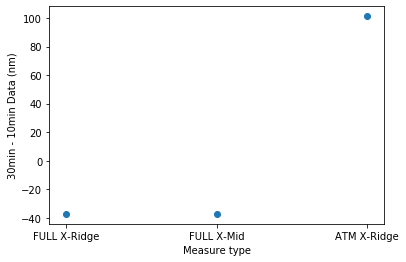

In [15]:
#Data2-Data1 here. If positive, 30min>10min
def Compare():
    
    for i in DataSet_2_FULL_RIDGE_ZX:
        DIFF_FULL_RIDGE_ZX = np.float_ (DataSet_2_FULL_RIDGE_ZX) - np.float_ (DataSet_1_FULL_RIDGE_ZX)
    for i in DataSet_2_ATM_RIDGE_ZX:
        DIFF_ATM_RIDGE_ZX = np.float_ (DataSet_2_ATM_RIDGE_ZX) - np.float_ (DataSet_1_ATM_RIDGE_ZX)
    for i in DataSet_2_H2_RIDGE_ZX:
        DIFF_H2_RIDGE_ZX = np.float_ (DataSet_2_H2_RIDGE_ZX) - np.float_ (DataSet_1_H2_RIDGE_ZX)
    for i in DataSet_2_FULL_MID_ZX:
        DIFF_FULL_MID_ZX = np.float_ (DataSet_2_FULL_MID_ZX) - np.float_ (DataSet_1_FULL_MID_ZX)
    for i in DataSet_2_ATM_MID_ZX:
        DIFF_ATM_MID_ZX = np.float_ (DataSet_2_ATM_MID_ZX) - np.float_ (DataSet_1_ATM_MID_ZX)
    for i in DataSet_2_H2_MID_ZX:
        DIFF_H2_MID_ZX = np.float_ (DataSet_2_H2_MID_ZX) - np.float_ (DataSet_1_H2_MID_ZX) 
    for i in DataSet_2_FULL_RIDGE_ZY:
        DIFF_FULL_RIDGE_ZY = np.float_ (DataSet_2_FULL_RIDGE_ZY) - np.float_ (DataSet_1_FULL_RIDGE_ZY) 
    for i in DataSet_2_ATM_RIDGE_ZY:
        DIFF_ATM_RIDGE_ZY = np.float_ (DataSet_2_ATM_RIDGE_ZY) - np.float_ (DataSet_1_ATM_RIDGE_ZY) 
    for i in DataSet_2_H2_RIDGE_ZY:
        DIFF_H2_RIDGE_ZY = np.float_ (DataSet_2_H2_RIDGE_ZY) - np.float_ (DataSet_1_H2_RIDGE_ZY) 
    for i in DataSet_2_FULL_MID_ZY:
        DIFF_FULL_MID_ZY = np.float_ (DataSet_2_FULL_MID_ZY) - np.float_ (DataSet_1_FULL_MID_ZY) 
    for i in DataSet_2_ATM_MID_ZY:
        DIFF_ATM_MID_ZY = np.float_ (DataSet_2_ATM_MID_ZY) - np.float_ (DataSet_1_ATM_MID_ZY) 
    for i in DataSet_2_H2_MID_ZY:
        DIFF_H2_MID_ZY = np.float_ (DataSet_2_H2_MID_ZY) - np.float_ (DataSet_1_H2_MID_ZY) 
    for i in DataSet_2_FULL_BASE:
        DIFF_FULL_BASE = np.float_ (DataSet_2_FULL_BASE) - np.float_ (DataSet_1_FULL_BASE) 
    for i in DataSet_2_ATM_BASE:
        DIFF_ATM_BASE = np.float_ (DataSet_2_ATM_BASE) - np.float_ (DataSet_1_ATM_BASE) 
    for i in DataSet_2_H2_BASE:
        DIFF_H2_BASE = np.float_ (DataSet_2_H2_BASE) - np.float_ (DataSet_1_H2_BASE) 
    for i in DataSet_2_FULL_VOL_RIDGE_X:
        DIFF_FULL_VOL_RIDGE_X = np.float_ (DataSet_2_FULL_VOL_RIDGE_X) - np.float_ (DataSet_1_FULL_VOL_RIDGE_X) 
    for i in DataSet_2_ATM_VOL_RIDGE_X:
        DIFF_ATM_VOL_RIDGE_X = np.float_ (DataSet_2_ATM_VOL_RIDGE_X) - np.float_ (DataSet_1_ATM_VOL_RIDGE_X) 
    for i in DataSet_2_H2_VOL_RIDGE_X:
        DIFF_H2_VOL_RIDGE_X = np.float_ (DataSet_2_H2_VOL_RIDGE_X) - np.float_ (DataSet_1_H2_VOL_RIDGE_X) 
    for i in DataSet_2_FULL_VOL_RIDGE_Y:
        DIFF_FULL_VOL_RIDGE_Y = np.float_ (DataSet_2_FULL_VOL_RIDGE_Y) - np.float_ (DataSet_1_FULL_VOL_RIDGE_Y) 
    for i in DataSet_2_ATM_VOL_RIDGE_Y:
        DIFF_ATM_VOL_RIDGE_Y = np.float_ (DataSet_2_ATM_VOL_RIDGE_Y) - np.float_ (DataSet_1_ATM_VOL_RIDGE_Y) 
    for i in DataSet_2_H2_VOL_RIDGE_Y:
        DIFF_H2_VOL_RIDGE_Y = np.float_ (DataSet_2_H2_VOL_RIDGE_Y) - np.float_ (DataSet_1_H2_VOL_RIDGE_Y) 
    for i in DataSet_2_FULL_VOL_MID_X:
        DIFF_FULL_VOL_MID_X = np.float_ (DataSet_2_FULL_VOL_MID_X) - np.float_ (DataSet_1_FULL_VOL_MID_X) 
    for i in DataSet_2_ATM_VOL_MID_X:
        DIFF_ATM_VOL_MID_X = np.float_ (DataSet_2_ATM_VOL_MID_X) - np.float_ (DataSet_1_ATM_VOL_MID_X) 
    for i in DataSet_2_H2_VOL_MID_X:
        DIFF_H2_VOL_MID_X = np.float_ (DataSet_2_H2_VOL_MID_X) - np.float_ (DataSet_1_H2_VOL_MID_X) 
    for i in DataSet_2_FULL_VOL_MID_Y:
        DIFF_FULL_VOL_MID_Y = np.float_ (DataSet_2_FULL_VOL_MID_Y) - np.float_ (DataSet_1_FULL_VOL_MID_Y) 
    for i in DataSet_2_ATM_VOL_MID_Y:
        DIFF_ATM_VOL_MID_Y = np.float_ (DataSet_2_ATM_VOL_MID_Y) - np.float_ (DataSet_1_ATM_VOL_MID_Y) 
    for i in DataSet_2_H2_VOL_MID_Y:
        DIFF_H2_VOL_MID_Y = np.float_ (DataSet_2_H2_VOL_MID_Y) - np.float_ (DataSet_1_H2_VOL_MID_Y) 
        
#============================================================PRINT=============================================================
    def calc():
        print("====================================================")
        print("Comparison of 30-minute - 10-minute")
        print("====================================================")
    
#------------------------------------------------------Average Z (X-DATA)------------------------------------------------------
        print("====================================================")
        print("Average height L-Data:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------
        print("Full growth Diff Height (Ridge):","    ",DIFF_FULL_RIDGE_ZX,"nm")
        print("Full growth Diff Height (Mid):","      ",DIFF_FULL_MID_ZX,"nm")    
#--------------------------------- ATM cooling ---------------------------------
        print("ATM growth Diff Height (Ridge):","     ",DIFF_ATM_RIDGE_ZX,"nm")
        print("ATM growth Diff Height (Mid):","       ",DIFF_ATM_MID_ZX,"nm")
#--------------------------------- H2 Cooling ---------------------------------
        print("H2 growth Diff Height (Ridge):","      ",DIFF_H2_RIDGE_ZX,"nm")
        print("H2 growth Diff Height (Mid):","        ",DIFF_H2_MID_ZX,"nm")
#------------------------------------------------------Average Z (Y-DATA)------------------------------------------------------
        print("====================================================")
        print("Average height W-Data:")
        print("====================================================")
#--------------------------------- Full Growth  ---------------------------------
        print("Full growth Diff Height (Ridge):","    ",DIFF_FULL_RIDGE_ZY,"nm")
        print("Full growth Diff Height (Mid):","      ",DIFF_FULL_MID_ZY,"nm")    
#--------------------------------- ATM cooling ---------------------------------
        print("ATM growth Diff Height (Ridge):","     ",DIFF_ATM_RIDGE_ZY,"nm")
        print("ATM growth Diff Height (Mid):","       ",DIFF_ATM_MID_ZY,"nm")  
#--------------------------------- H2 cooling ---------------------------------
        print("H2 growth Diff Height (Ridge):","      ",DIFF_H2_RIDGE_ZY,"nm")
        print("H2 growth Diff Height (Mid):","        ",DIFF_H2_MID_ZY,"nm")  
#------------------------------------------------------Base Area (X*Y)------------------------------------------------------
        print("====================================================")
        print("Average base area:")
        print("====================================================")
#Removing "nan" from list and then minusing MAX X/Y from MIN X/Y from same list to give X and Y distance for each micelle.
#--------------------------------- Full Growth ---------------------------------
        print("Full growth Diff base area (XY):","    ",DIFF_FULL_BASE,"nm^2")
#--------------------------------- ATM cooling ---------------------------------
        print("ATM growth Diff base area (XY):","     ",DIFF_ATM_BASE,"nm^2")
#--------------------------------- H2 cooling ---------------------------------
        print("H2 growth Diff base area (XY):","      ",DIFF_H2_BASE,"nm^2")
#------------------------------------------------------Volume (X*Y)*Z L-Ridge -------------------------------------------------
        print("====================================================")
        print("Average volume using L-Ridge:")
        print("====================================================")
#--------------------------------- Full growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        print("Full growth Diff volume (Ridge):","    ",DIFF_FULL_VOL_RIDGE_X,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        print("ATM growth Diff volume (Ridge):","     ",DIFF_ATM_VOL_RIDGE_X,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        print("H2 growth Diff volume (Ridge):","      ",DIFF_H2_VOL_RIDGE_X,"nm^3")
#------------------------------------------------------Volume (X*Y)*Z W-Ridge--------------------------------------------------
        print("====================================================")
        print("Average volume using W-Ridge:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        print("Full growth Diff volume (Ridge):","    ",DIFF_FULL_VOL_RIDGE_Y,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        print("ATM growth Diff volume (Ridge):","     ",DIFF_ATM_VOL_RIDGE_Y,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        print("H2 growth Diff volume (Ridge):","      ",DIFF_H2_VOL_RIDGE_Y,"nm^3")
#------------------------------------------------------Volume (X*Y)*Z L-Mid----------------------------------------------------
        print("====================================================")
        print("Average volume using L-Middle:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        print("Full growth Diff volume (Mid):","      ",DIFF_FULL_VOL_MID_X,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        print("ATM growth Diff volume (Mid):","       ",DIFF_ATM_VOL_MID_X,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        print("H2 growth Diff volume (Mid):","        ",DIFF_H2_VOL_MID_X,"nm^3")
#------------------------------------------------------Volume (X*Y)*Z W-Mid----------------------------------------------------
        print("====================================================")
        print("Average volume using W-Middle:")
        print("====================================================")
#--------------------------------- Full Growth ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height.
        print("Full growth Diff volume (Mid):","      ",DIFF_FULL_VOL_MID_Y,"nm^3")
#--------------------------------- ATM cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        print("ATM growth Diff volume (Mid):","       ",DIFF_ATM_VOL_MID_Y,"nm^3")
#--------------------------------- H2 cooling ---------------------------------  
    #Using L-Ridge for volume as it is the most consistent as a model of average height. 
        print("H2 growth Diff volume (Mid):","        ",DIFF_H2_VOL_MID_Y,"nm^3") 
        
#================================================= GRAPHING ================================================= 

    #def graphing():
        #plt.xlabel("Measure type")
        #plt.ylabel("30min - 10min Data (nm)")
        #x_values = ["FULL X-Ridge","FULL X-Mid","ATM X-Ridge"]
        #y_axis = [DIFF_FULL_RIDGE_ZX,DIFF_FULL_MID_ZX,DIFF_ATM_RIDGE_ZX]

        #plt.scatter(x_values,y_axis)








    #graphing()

          
#=================================================EXPORT TO EXCEL================================================= 
        
    ExportData= [DIFF_FULL_RIDGE_ZX,DIFF_FULL_MID_ZX,DIFF_ATM_RIDGE_ZX,DIFF_ATM_MID_ZX,DIFF_H2_RIDGE_ZX,DIFF_H2_MID_ZX,
                 DIFF_FULL_RIDGE_ZY,DIFF_FULL_MID_ZY,DIFF_ATM_RIDGE_ZY,DIFF_ATM_MID_ZY,DIFF_H2_RIDGE_ZY,DIFF_H2_MID_ZY,DIFF_FULL_BASE,
                 DIFF_ATM_BASE,DIFF_H2_BASE,DIFF_FULL_VOL_RIDGE_X,DIFF_ATM_VOL_RIDGE_X,DIFF_H2_VOL_RIDGE_X,
                 DIFF_FULL_VOL_RIDGE_Y,DIFF_ATM_VOL_RIDGE_Y,DIFF_H2_VOL_RIDGE_Y,DIFF_FULL_VOL_MID_X,DIFF_ATM_VOL_MID_X,
                 DIFF_H2_VOL_MID_X,DIFF_FULL_VOL_MID_Y,DIFF_ATM_VOL_MID_Y,DIFF_H2_VOL_MID_Y]
    Title= ['FULL X-Ridge','FULL X-Mid','ATM X-Ridge','ATM X-Mid','H2 X-Ridge','H2 X-Mid',
           'FULL Y-Ridge','FULL Y-Mid','ATM Y-Ridge','ATM Y-Mid','H2 Y-Ridge','H2 Y-Mid','FULL Base',
            'ATM Base','H2 Base','FULL Volume X-Ridge','ATM Volume X-Ridge','H2 Volume X-Ridge',
           'FULL Volume Y-Ridge','ATM Volume Y-Ridge','H2 Volume Y-Ridge','FULL Volume X-Mid','ATM Volume X-Mid',
           'H2 Volume X-Mid', 'FULL Volume Y-Mid','ATM Volume Y-Mid','H2 Volume Y-Mid']
    
    
#=================================================EXPORT PROGRAM================================================= 
    #df = pd.DataFrame({
        #'Title':Title,
        #'Data (nm)':ExportData})
    #print(df)
    #df.to_excel('C:/Users/Harry/OneDrive/Documents/University of bristol/AFM Images/Python - Micelle topography data/Exported Micelle Data/_Micelle_Data_10min_30min.xlsx')
        

    
    calc()
    
Compare()